In [1]:
# # Requerimientos de librerías:
# !pip install spacy
# !python -m spacy download es_core_news_md

# !pip install transformers
# !pip install transformers scipy ftfy accelerate

# !git clone https://github.com/JorgeSauri/COMSINT.git 

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from recomendaciones_comsint import Recomendador

c:\Users\jsaur\anaconda3\envs\ENV1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Con tamaño embeddings 128
- CNN de max 512 kernels (v4)

In [4]:
version = 4

recomendador128 = Recomendador(fuente='recetario_mexicano_small.csv',
                            nutricion = 'nutricion_mejorado.csv',
                            canasta='canasta_basica.csv')

recomendador128.CargarModelo(emb_size=128, version=version)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Modelo Modelos/Modelo_Nut_FV_DistilBERT_04_EMBED-128_CNN.h5 cargado con éxito.
Modelo Modelos/Modelo_Precios_FV_DistilBERT_04_EMBED-128_CNN.h5 cargado con éxito.


Generando 10 recetas aleatorias, esto puede tardar varios minutos...


<AxesSubplot:>

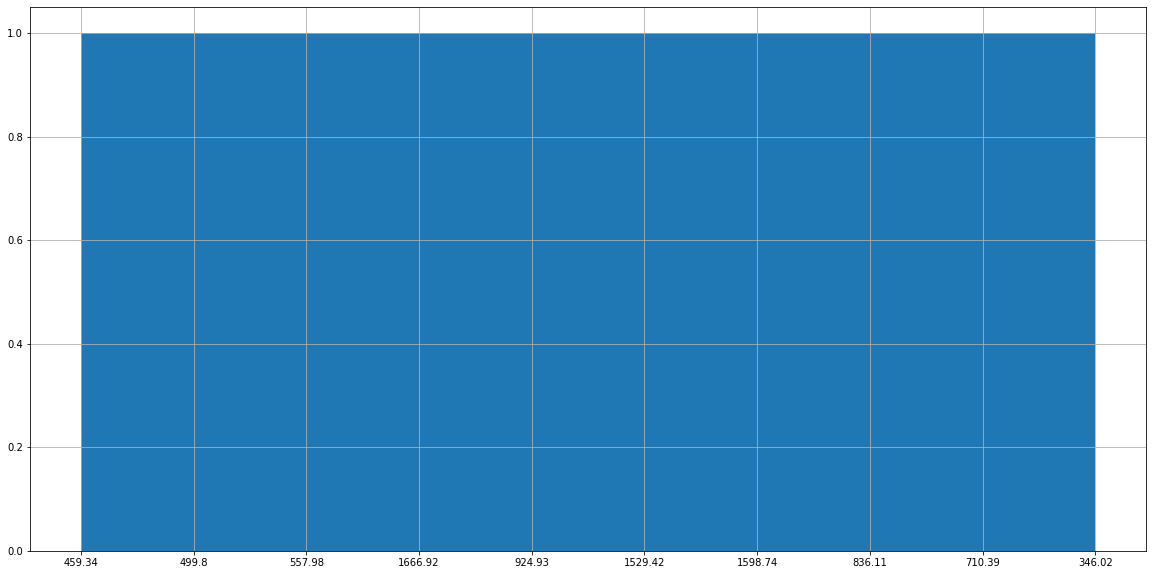

In [5]:
test = recomendador128.generar_dataset_entrenamiento_nut(df_nutricionales='nutricion_mejorado.csv', 
                                                  min_ingredientes=5, max_ingredientes=11,
                                                  min_unidades=1, max_unidades=10,
                                                  min_kcal=300, max_kcal= 1800,
                                                  numero_recetas=10, _INTENTOS=5,
                                                  )

df = pd.DataFrame(test, columns=['ingredientes', 'kcal', 'carbs', 'prot', 'grasas']) 
plt.figure(figsize=(20,10))
df['kcal'].hist()

* Entrenar información nutricional


ITERACIÓN: 1
min unidades: 1  max unidades: 10
min kcal: 300  max kcal: 800
Entrenando desde epoch 0
------------------------------------------

Error al cargar archivos NumPy.
datasets/numpy/100_recetas_random_EMBED-128_DATA_X.npy no existe o está corrupto.
datasets/numpy/100_recetas_random_EMBED-128_DATA_Y.npy no existe o está corrupto.
Generando 100 recetas aleatorias, esto puede tardar varios minutos...
Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.87it/s]


Epoch 1/12
10/10 [==============================] - 2s 173ms/step - loss: 55.8735 - mae: 55.8735 - val_loss: 54.7152 - val_mae: 54.7152
Epoch 2/12
10/10 [==============================] - 2s 150ms/step - loss: 52.1636 - mae: 52.1636 - val_loss: 53.0430 - val_mae: 53.0430
Epoch 3/12
10/10 [==============================] - 2s 171ms/step - loss: 48.9872 - mae: 48.9872 - val_loss: 51.4504 - val_mae: 51.4504
Epoch 4/12
10/10 [==============================] - 2s 183ms/step - loss: 48.5723 - mae: 48.5723 - val_loss: 51.2358 - val_mae: 51.2358
Epoch 5/12
10/10 [==============================] - 2s 187ms/step - loss: 46.2053 - mae: 46.2053 - val_loss: 51.3565 - val_mae: 51.3565
Epoch 6/12
10/10 [==============================] - 2s 185ms/step - loss: 37.7765 - mae: 37.7765 - val_loss: 51.5922 - val_mae: 51.5922
Epoch 7/12
10/10 [==============================] - 2s 183ms/step - loss: 41.4188 - mae: 41.4188 - val_loss: 50.6519 - val_mae: 50.6519
Epoch 8/12
10/10 [==============================

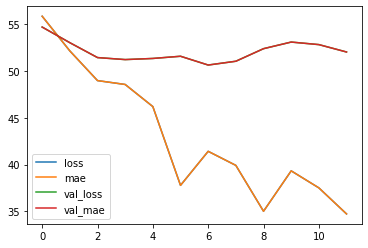

1/1 [==============================] - 0s 206ms/step - loss: 49.3261 - mae: 49.3261
[49.326114654541016, 49.326114654541016]
1/1 [==============================] - 0s 142ms/step
receta 0 kcal_true: 439.8 kcal_pred: 450.46533  precisión: 97.6 %
receta 0 carbohydrate_true: 17.11 carbohydrate_pred: 43.6629  precisión: 39.2 %
receta 0 protein_true: 37.72 protein_pred: 24.886795  precisión: 66.0 %
receta 0 total_fat_true: 24.33 total_fat_pred: 12.526574  precisión: 51.5 %
---------------------------------------------------------------------------
receta 1 kcal_true: 629.0 kcal_pred: 442.4014  precisión: 70.3 %
receta 1 carbohydrate_true: 16.44 carbohydrate_pred: 22.164906  precisión: 74.2 %
receta 1 protein_true: 43.3 protein_pred: 36.067112  precisión: 83.3 %
receta 1 total_fat_true: 43.88 total_fat_pred: 15.125976  precisión: 34.5 %
---------------------------------------------------------------------------
receta 2 kcal_true: 709.5 kcal_pred: 471.0115  precisión: 66.4 %
receta 2 carbohyd

100%|██████████| 100/100 [00:20<00:00,  4.94it/s]


Epoch 12/23
10/10 [==============================] - 2s 168ms/step - loss: 153.5724 - mae: 153.5724 - val_loss: 146.8192 - val_mae: 146.8192
Epoch 13/23
10/10 [==============================] - 2s 155ms/step - loss: 121.7129 - mae: 121.7129 - val_loss: 116.8046 - val_mae: 116.8046
Epoch 14/23
10/10 [==============================] - 2s 173ms/step - loss: 91.7854 - mae: 91.7854 - val_loss: 83.3729 - val_mae: 83.3729
Epoch 15/23
10/10 [==============================] - 2s 184ms/step - loss: 75.3234 - mae: 75.3234 - val_loss: 70.4309 - val_mae: 70.4309
Epoch 16/23
10/10 [==============================] - 2s 182ms/step - loss: 69.8600 - mae: 69.8600 - val_loss: 69.6497 - val_mae: 69.6497
Epoch 17/23
10/10 [==============================] - 2s 188ms/step - loss: 68.8223 - mae: 68.8223 - val_loss: 68.6058 - val_mae: 68.6058
Epoch 18/23
10/10 [==============================] - 2s 186ms/step - loss: 65.3066 - mae: 65.3066 - val_loss: 68.3622 - val_mae: 68.3622
Epoch 19/23
10/10 [==============

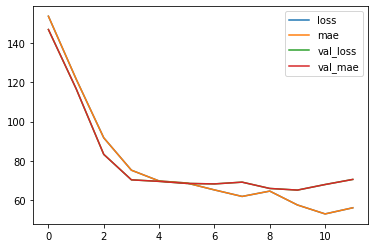

1/1 [==============================] - 0s 311ms/step - loss: 51.5096 - mae: 51.5096
[51.50963592529297, 51.50963592529297]
1/1 [==============================] - 0s 148ms/step
receta 0 kcal_true: 893.0 kcal_pred: 823.2665  precisión: 92.2 %
receta 0 carbohydrate_true: 97.4 carbohydrate_pred: 111.44981  precisión: 87.4 %
receta 0 protein_true: 59.34 protein_pred: 32.308437  precisión: 54.4 %
receta 0 total_fat_true: 28.55 total_fat_pred: 20.603004  precisión: 72.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 878.0 kcal_pred: 1011.7422  precisión: 86.8 %
receta 1 carbohydrate_true: 68.75 carbohydrate_pred: 140.46823  precisión: 48.9 %
receta 1 protein_true: 13.25 protein_pred: 36.98298  precisión: 35.8 %
receta 1 total_fat_true: 51.16 total_fat_pred: 26.842064  precisión: 52.5 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.5 kcal_pred: 960.624  precisión: 88.1 %
receta 2 carbohydra

100%|██████████| 100/100 [00:20<00:00,  4.94it/s]


Epoch 23/34
10/10 [==============================] - 2s 171ms/step - loss: 163.2910 - mae: 163.2910 - val_loss: 128.4244 - val_mae: 128.4244
Epoch 24/34
10/10 [==============================] - 2s 153ms/step - loss: 115.7503 - mae: 115.7503 - val_loss: 80.5555 - val_mae: 80.5555
Epoch 25/34
10/10 [==============================] - 2s 178ms/step - loss: 103.2093 - mae: 103.2093 - val_loss: 73.2253 - val_mae: 73.2253
Epoch 26/34
10/10 [==============================] - 2s 193ms/step - loss: 100.1431 - mae: 100.1431 - val_loss: 70.2164 - val_mae: 70.2164
Epoch 27/34
10/10 [==============================] - 2s 187ms/step - loss: 85.4129 - mae: 85.4129 - val_loss: 76.6533 - val_mae: 76.6533
Epoch 28/34
10/10 [==============================] - 2s 196ms/step - loss: 92.2366 - mae: 92.2366 - val_loss: 71.4077 - val_mae: 71.4077
Epoch 29/34
10/10 [==============================] - 2s 191ms/step - loss: 77.3046 - mae: 77.3046 - val_loss: 69.6421 - val_mae: 69.6421
Epoch 30/34
10/10 [============

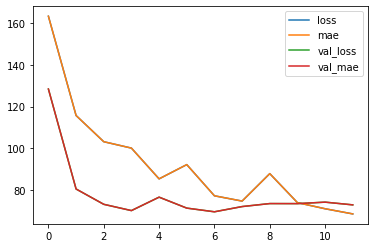

1/1 [==============================] - 0s 278ms/step - loss: 68.5056 - mae: 68.5056
[68.50556945800781, 68.50556945800781]
1/1 [==============================] - 0s 260ms/step
receta 0 kcal_true: 1230.0 kcal_pred: 1505.8795  precisión: 81.7 %
receta 0 carbohydrate_true: 175.1 carbohydrate_pred: 131.57578  precisión: 75.1 %
receta 0 protein_true: 58.06 protein_pred: 92.97555  precisión: 62.4 %
receta 0 total_fat_true: 35.1 total_fat_pred: 59.669056  precisión: 58.8 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1247.0 kcal_pred: 1372.5514  precisión: 90.9 %
receta 1 carbohydrate_true: 42.88 carbohydrate_pred: 106.56324  precisión: 40.2 %
receta 1 protein_true: 75.3 protein_pred: 99.55549  precisión: 75.6 %
receta 1 total_fat_true: 85.56 total_fat_pred: 53.643925  precisión: 62.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1340.0 kcal_pred: 1436.189  precisión: 93.3 %
receta 2 carbohy

100%|██████████| 100/100 [00:20<00:00,  4.89it/s]


Epoch 34/45
10/10 [==============================] - 2s 171ms/step - loss: 213.7028 - mae: 213.7028 - val_loss: 150.2135 - val_mae: 150.2135
Epoch 35/45
10/10 [==============================] - 2s 160ms/step - loss: 132.0883 - mae: 132.0883 - val_loss: 80.9660 - val_mae: 80.9660
Epoch 36/45
10/10 [==============================] - 2s 182ms/step - loss: 65.8835 - mae: 65.8835 - val_loss: 56.8057 - val_mae: 56.8057
Epoch 37/45
10/10 [==============================] - 2s 186ms/step - loss: 50.9941 - mae: 50.9941 - val_loss: 54.4378 - val_mae: 54.4378
Epoch 38/45
10/10 [==============================] - 2s 187ms/step - loss: 45.1020 - mae: 45.1020 - val_loss: 55.7548 - val_mae: 55.7548
Epoch 39/45
10/10 [==============================] - 2s 188ms/step - loss: 44.6399 - mae: 44.6399 - val_loss: 56.4015 - val_mae: 56.4015
Epoch 40/45
10/10 [==============================] - 2s 186ms/step - loss: 40.9572 - mae: 40.9572 - val_loss: 56.7543 - val_mae: 56.7543
Epoch 41/45
10/10 [================

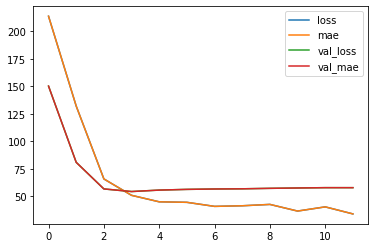

1/1 [==============================] - 0s 214ms/step - loss: 59.8751 - mae: 59.8751
[59.87510681152344, 59.87510681152344]
1/1 [==============================] - 0s 151ms/step
receta 0 kcal_true: 369.5 kcal_pred: 581.3369  precisión: 63.6 %
receta 0 carbohydrate_true: 86.6 carbohydrate_pred: 66.49067  precisión: 76.8 %
receta 0 protein_true: 8.27 protein_pred: 26.782976  precisión: 30.9 %
receta 0 total_fat_true: 1.59 total_fat_pred: 11.923478  precisión: 13.3 %
---------------------------------------------------------------------------
receta 1 kcal_true: 752.5 kcal_pred: 579.58093  precisión: 77.0 %
receta 1 carbohydrate_true: 61.6 carbohydrate_pred: 80.86317  precisión: 76.2 %
receta 1 protein_true: 43.84 protein_pred: 22.43415  precisión: 51.2 %
receta 1 total_fat_true: 37.5 total_fat_pred: 7.1365867  precisión: 19.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 581.5 kcal_pred: 518.5969  precisión: 89.2 %
receta 2 carbohydrate_tr

100%|██████████| 100/100 [00:22<00:00,  4.39it/s]


Epoch 45/56
10/10 [==============================] - 2s 172ms/step - loss: 134.1811 - mae: 134.1811 - val_loss: 130.3486 - val_mae: 130.3486
Epoch 46/56
10/10 [==============================] - 2s 158ms/step - loss: 115.6029 - mae: 115.6029 - val_loss: 100.0887 - val_mae: 100.0887
Epoch 47/56
10/10 [==============================] - 2s 191ms/step - loss: 84.5497 - mae: 84.5497 - val_loss: 69.9007 - val_mae: 69.9007
Epoch 48/56
10/10 [==============================] - 2s 206ms/step - loss: 67.8184 - mae: 67.8184 - val_loss: 59.1109 - val_mae: 59.1109
Epoch 49/56
10/10 [==============================] - 2s 185ms/step - loss: 65.4361 - mae: 65.4361 - val_loss: 60.8483 - val_mae: 60.8483
Epoch 50/56
10/10 [==============================] - 2s 191ms/step - loss: 61.7960 - mae: 61.7960 - val_loss: 62.4714 - val_mae: 62.4714
Epoch 51/56
10/10 [==============================] - 2s 200ms/step - loss: 62.3928 - mae: 62.3928 - val_loss: 61.8890 - val_mae: 61.8890
Epoch 52/56
10/10 [==============

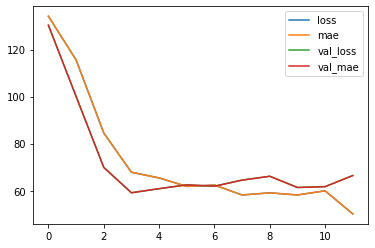

1/1 [==============================] - 0s 218ms/step - loss: 73.7265 - mae: 73.7265
[73.72645568847656, 73.72645568847656]
1/1 [==============================] - 0s 144ms/step
receta 0 kcal_true: 1190.0 kcal_pred: 903.2023  precisión: 75.9 %
receta 0 carbohydrate_true: 193.9 carbohydrate_pred: 90.63123  precisión: 46.7 %
receta 0 protein_true: 42.25 protein_pred: 54.86142  precisión: 77.0 %
receta 0 total_fat_true: 26.81 total_fat_pred: 30.282314  precisión: 88.5 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1112.0 kcal_pred: 1033.7852  precisión: 93.0 %
receta 1 carbohydrate_true: 16.45 carbohydrate_pred: 128.91461  precisión: 12.8 %
receta 1 protein_true: 121.25 protein_pred: 46.270096  precisión: 38.2 %
receta 1 total_fat_true: 59.28 total_fat_pred: 29.986057  precisión: 50.6 %
---------------------------------------------------------------------------
receta 2 kcal_true: 857.0 kcal_pred: 862.27905  precisión: 99.4 %
receta 2 carbo

100%|██████████| 100/100 [00:20<00:00,  4.88it/s]


Epoch 56/67
10/10 [==============================] - 2s 172ms/step - loss: 167.3972 - mae: 167.3972 - val_loss: 141.6030 - val_mae: 141.6030
Epoch 57/67
10/10 [==============================] - 2s 151ms/step - loss: 119.1431 - mae: 119.1431 - val_loss: 104.9638 - val_mae: 104.9638
Epoch 58/67
10/10 [==============================] - 2s 185ms/step - loss: 96.5974 - mae: 96.5974 - val_loss: 98.0678 - val_mae: 98.0678
Epoch 59/67
10/10 [==============================] - 2s 183ms/step - loss: 80.4281 - mae: 80.4281 - val_loss: 97.5004 - val_mae: 97.5004
Epoch 60/67
10/10 [==============================] - 2s 199ms/step - loss: 83.2500 - mae: 83.2500 - val_loss: 97.3100 - val_mae: 97.3100
Epoch 61/67
10/10 [==============================] - 2s 187ms/step - loss: 91.2660 - mae: 91.2660 - val_loss: 99.6924 - val_mae: 99.6924
Epoch 62/67
10/10 [==============================] - 2s 185ms/step - loss: 73.0296 - mae: 73.0296 - val_loss: 99.3145 - val_mae: 99.3145
Epoch 63/67
10/10 [==============

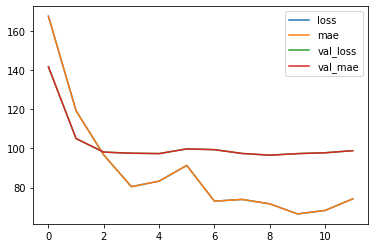

1/1 [==============================] - 0s 262ms/step - loss: 98.6130 - mae: 98.6130
[98.61299896240234, 98.61299896240234]
1/1 [==============================] - 0s 216ms/step
receta 0 kcal_true: 1628.0 kcal_pred: 1092.4226  precisión: 67.1 %
receta 0 carbohydrate_true: 26.23 carbohydrate_pred: 69.37787  precisión: 37.8 %
receta 0 protein_true: 69.4 protein_pred: 84.930115  precisión: 81.7 %
receta 0 total_fat_true: 127.5 total_fat_pred: 49.082264  precisión: 38.5 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1664.0 kcal_pred: 1303.28  precisión: 78.3 %
receta 1 carbohydrate_true: 166.6 carbohydrate_pred: 140.97855  precisión: 84.6 %
receta 1 protein_true: 158.2 protein_pred: 64.95358  precisión: 41.0 %
receta 1 total_fat_true: 39.88 total_fat_pred: 47.080822  precisión: 84.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1346.0 kcal_pred: 1323.5476  precisión: 98.3 %
receta 2 carbohy

100%|██████████| 100/100 [00:20<00:00,  4.94it/s]


Epoch 67/78
10/10 [==============================] - 2s 171ms/step - loss: 206.5195 - mae: 206.5195 - val_loss: 188.4199 - val_mae: 188.4199
Epoch 68/78
10/10 [==============================] - 2s 152ms/step - loss: 134.4677 - mae: 134.4677 - val_loss: 112.4954 - val_mae: 112.4954
Epoch 69/78
10/10 [==============================] - 2s 185ms/step - loss: 73.8768 - mae: 73.8768 - val_loss: 65.0763 - val_mae: 65.0763
Epoch 70/78
10/10 [==============================] - 2s 190ms/step - loss: 48.8651 - mae: 48.8651 - val_loss: 49.7237 - val_mae: 49.7237
Epoch 71/78
10/10 [==============================] - 2s 184ms/step - loss: 47.0444 - mae: 47.0444 - val_loss: 46.4227 - val_mae: 46.4227
Epoch 72/78
10/10 [==============================] - 2s 188ms/step - loss: 45.6561 - mae: 45.6561 - val_loss: 46.0207 - val_mae: 46.0207
Epoch 73/78
10/10 [==============================] - 2s 190ms/step - loss: 37.3509 - mae: 37.3509 - val_loss: 46.8617 - val_mae: 46.8617
Epoch 74/78
10/10 [==============

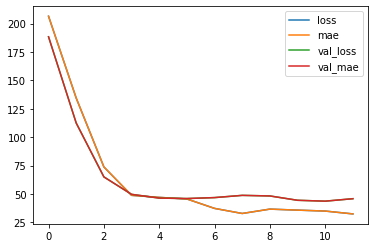

1/1 [==============================] - 0s 262ms/step - loss: 46.2292 - mae: 46.2292
[46.22919464111328, 46.22919464111328]
1/1 [==============================] - 0s 190ms/step
receta 0 kcal_true: 625.0 kcal_pred: 690.02924  precisión: 90.6 %
receta 0 carbohydrate_true: 47.2 carbohydrate_pred: 87.985115  precisión: 53.6 %
receta 0 protein_true: 20.66 protein_pred: 28.223747  precisión: 73.2 %
receta 0 total_fat_true: 40.7 total_fat_pred: 14.216941  precisión: 34.9 %
---------------------------------------------------------------------------
receta 1 kcal_true: 327.8 kcal_pred: 579.6906  precisión: 56.5 %
receta 1 carbohydrate_true: 56.62 carbohydrate_pred: 36.07988  precisión: 63.7 %
receta 1 protein_true: 13.88 protein_pred: 37.39466  precisión: 37.1 %
receta 1 total_fat_true: 6.22 total_fat_pred: 21.828932  precisión: 28.5 %
---------------------------------------------------------------------------
receta 2 kcal_true: 620.5 kcal_pred: 543.4319  precisión: 87.6 %
receta 2 carbohydrate

100%|██████████| 100/100 [00:20<00:00,  4.85it/s]


Epoch 78/89
10/10 [==============================] - 2s 172ms/step - loss: 124.6781 - mae: 124.6781 - val_loss: 116.0418 - val_mae: 116.0418
Epoch 79/89
10/10 [==============================] - 2s 182ms/step - loss: 96.6865 - mae: 96.6865 - val_loss: 86.1394 - val_mae: 86.1394
Epoch 80/89
10/10 [==============================] - 2s 188ms/step - loss: 75.6906 - mae: 75.6906 - val_loss: 60.5578 - val_mae: 60.5578
Epoch 81/89
10/10 [==============================] - 2s 185ms/step - loss: 69.0860 - mae: 69.0860 - val_loss: 56.9631 - val_mae: 56.9631
Epoch 82/89
10/10 [==============================] - 2s 207ms/step - loss: 62.5284 - mae: 62.5284 - val_loss: 54.4100 - val_mae: 54.4100
Epoch 83/89
10/10 [==============================] - 2s 200ms/step - loss: 55.9540 - mae: 55.9540 - val_loss: 53.2380 - val_mae: 53.2380
Epoch 84/89
10/10 [==============================] - 2s 208ms/step - loss: 53.1475 - mae: 53.1475 - val_loss: 52.7985 - val_mae: 52.7985
Epoch 85/89
10/10 [==================

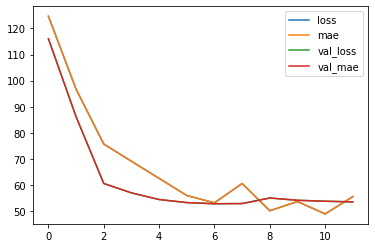

1/1 [==============================] - 0s 240ms/step - loss: 66.1127 - mae: 66.1127
[66.11271667480469, 66.11271667480469]
1/1 [==============================] - 0s 149ms/step
receta 0 kcal_true: 944.0 kcal_pred: 805.7305  precisión: 85.4 %
receta 0 carbohydrate_true: 41.3 carbohydrate_pred: 89.10964  precisión: 46.4 %
receta 0 protein_true: 114.4 protein_pred: 44.37606  precisión: 38.8 %
receta 0 total_fat_true: 34.44 total_fat_pred: 25.423721  precisión: 73.8 %
---------------------------------------------------------------------------
receta 1 kcal_true: 962.5 kcal_pred: 914.3816  precisión: 95.0 %
receta 1 carbohydrate_true: 30.92 carbohydrate_pred: 92.377075  precisión: 33.5 %
receta 1 protein_true: 102.8 protein_pred: 48.871338  precisión: 47.5 %
receta 1 total_fat_true: 46.06 total_fat_pred: 31.032076  precisión: 67.4 %
---------------------------------------------------------------------------
receta 2 kcal_true: 847.0 kcal_pred: 1039.9946  precisión: 81.4 %
receta 2 carbohydra

100%|██████████| 100/100 [00:20<00:00,  4.94it/s]


Epoch 89/100
10/10 [==============================] - 2s 173ms/step - loss: 151.7955 - mae: 151.7955 - val_loss: 129.9542 - val_mae: 129.9542
Epoch 90/100
10/10 [==============================] - 2s 159ms/step - loss: 116.4937 - mae: 116.4937 - val_loss: 87.2377 - val_mae: 87.2377
Epoch 91/100
10/10 [==============================] - 2s 188ms/step - loss: 102.3273 - mae: 102.3273 - val_loss: 73.7919 - val_mae: 73.7919
Epoch 92/100
10/10 [==============================] - 2s 187ms/step - loss: 92.7963 - mae: 92.7963 - val_loss: 74.4016 - val_mae: 74.4016
Epoch 93/100
10/10 [==============================] - 2s 186ms/step - loss: 93.7500 - mae: 93.7500 - val_loss: 79.3155 - val_mae: 79.3155
Epoch 94/100
10/10 [==============================] - 2s 199ms/step - loss: 86.6212 - mae: 86.6212 - val_loss: 78.7341 - val_mae: 78.7341
Epoch 95/100
10/10 [==============================] - 2s 190ms/step - loss: 67.9204 - mae: 67.9204 - val_loss: 75.3736 - val_mae: 75.3736
Epoch 96/100
10/10 [======

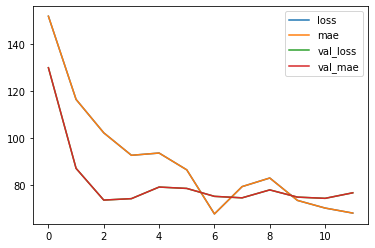

1/1 [==============================] - 0s 211ms/step - loss: 83.5107 - mae: 83.5107
[83.5107192993164, 83.5107192993164]
1/1 [==============================] - 0s 143ms/step
receta 0 kcal_true: 1488.0 kcal_pred: 1397.8601  precisión: 93.9 %
receta 0 carbohydrate_true: 266.8 carbohydrate_pred: 126.78587  precisión: 47.5 %
receta 0 protein_true: 62.4 protein_pred: 79.54591  precisión: 78.5 %
receta 0 total_fat_true: 23.3 total_fat_pred: 55.798912  precisión: 41.8 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1203.0 kcal_pred: 1461.8455  precisión: 82.3 %
receta 1 carbohydrate_true: 7.72 carbohydrate_pred: 160.86737  precisión: 4.8 %
receta 1 protein_true: 171.9 protein_pred: 74.96444  precisión: 43.6 %
receta 1 total_fat_true: 47.34 total_fat_pred: 51.430546  precisión: 92.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1221.0 kcal_pred: 1303.5203  precisión: 93.7 %
receta 2 carbohydra

100%|██████████| 100/100 [00:20<00:00,  4.97it/s]


Epoch 100/111
10/10 [==============================] - 2s 172ms/step - loss: 194.3386 - mae: 194.3386 - val_loss: 197.9054 - val_mae: 197.9054
Epoch 101/111
10/10 [==============================] - 2s 177ms/step - loss: 111.5731 - mae: 111.5731 - val_loss: 125.9935 - val_mae: 125.9935
Epoch 102/111
10/10 [==============================] - 2s 184ms/step - loss: 63.6628 - mae: 63.6628 - val_loss: 86.6705 - val_mae: 86.6705
Epoch 103/111
10/10 [==============================] - 2s 188ms/step - loss: 51.2151 - mae: 51.2151 - val_loss: 70.9667 - val_mae: 70.9667
Epoch 104/111
10/10 [==============================] - 2s 189ms/step - loss: 45.0033 - mae: 45.0033 - val_loss: 66.6635 - val_mae: 66.6635
Epoch 105/111
10/10 [==============================] - 2s 185ms/step - loss: 48.5595 - mae: 48.5595 - val_loss: 65.8506 - val_mae: 65.8506
Epoch 106/111
10/10 [==============================] - 2s 198ms/step - loss: 37.0262 - mae: 37.0262 - val_loss: 66.8696 - val_mae: 66.8696
Epoch 107/111
10/10

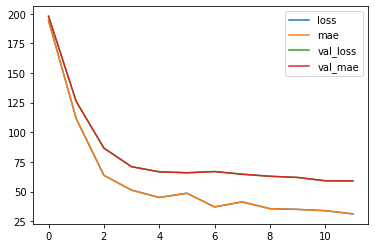

1/1 [==============================] - 0s 209ms/step - loss: 60.0340 - mae: 60.0340
[60.03400802612305, 60.03400802612305]
1/1 [==============================] - 0s 143ms/step
receta 0 kcal_true: 639.5 kcal_pred: 525.8703  precisión: 82.2 %
receta 0 carbohydrate_true: 36.88 carbohydrate_pred: 84.97268  precisión: 43.4 %
receta 0 protein_true: 90.6 protein_pred: 20.146206  precisión: 22.2 %
receta 0 total_fat_true: 13.78 total_fat_pred: 7.0033684  precisión: 50.8 %
---------------------------------------------------------------------------
receta 1 kcal_true: 470.5 kcal_pred: 529.7533  precisión: 88.8 %
receta 1 carbohydrate_true: 57.66 carbohydrate_pred: 44.791027  precisión: 77.7 %
receta 1 protein_true: 6.41 protein_pred: 33.88191  precisión: 18.9 %
receta 1 total_fat_true: 26.23 total_fat_pred: 16.757772  precisión: 63.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 474.2 kcal_pred: 670.6464  precisión: 70.7 %
receta 2 carbohydrate

100%|██████████| 100/100 [00:20<00:00,  4.90it/s]


Epoch 111/122
10/10 [==============================] - 3s 186ms/step - loss: 124.5966 - mae: 124.5966 - val_loss: 101.8852 - val_mae: 101.8852
Epoch 112/122
10/10 [==============================] - 2s 155ms/step - loss: 101.1837 - mae: 101.1837 - val_loss: 70.3651 - val_mae: 70.3651
Epoch 113/122
10/10 [==============================] - 2s 187ms/step - loss: 71.7985 - mae: 71.7985 - val_loss: 59.8869 - val_mae: 59.8869
Epoch 114/122
10/10 [==============================] - 2s 195ms/step - loss: 67.7293 - mae: 67.7293 - val_loss: 58.8911 - val_mae: 58.8911
Epoch 115/122
10/10 [==============================] - 2s 197ms/step - loss: 61.2277 - mae: 61.2277 - val_loss: 60.6527 - val_mae: 60.6527
Epoch 116/122
10/10 [==============================] - 2s 188ms/step - loss: 64.0861 - mae: 64.0861 - val_loss: 62.0690 - val_mae: 62.0690
Epoch 117/122
10/10 [==============================] - 2s 190ms/step - loss: 57.2879 - mae: 57.2879 - val_loss: 62.3616 - val_mae: 62.3616
Epoch 118/122
10/10 [

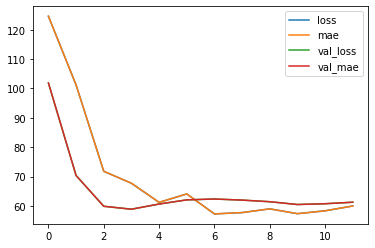

1/1 [==============================] - 0s 213ms/step - loss: 73.0009 - mae: 73.0009
[73.00093078613281, 73.00093078613281]
1/1 [==============================] - 0s 147ms/step
receta 0 kcal_true: 1163.0 kcal_pred: 912.7768  precisión: 78.5 %
receta 0 carbohydrate_true: 20.1 carbohydrate_pred: 48.093178  precisión: 41.8 %
receta 0 protein_true: 135.2 protein_pred: 75.573875  precisión: 55.9 %
receta 0 total_fat_true: 56.5 total_fat_pred: 38.076862  precisión: 67.4 %
---------------------------------------------------------------------------
receta 1 kcal_true: 910.5 kcal_pred: 1019.1312  precisión: 89.3 %
receta 1 carbohydrate_true: 120.94 carbohydrate_pred: 154.8681  precisión: 78.1 %
receta 1 protein_true: 91.06 protein_pred: 43.51873  precisión: 47.8 %
receta 1 total_fat_true: 9.87 total_fat_pred: 22.563751  precisión: 43.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1037.0 kcal_pred: 855.275  precisión: 82.5 %
receta 2 carbohydra

100%|██████████| 100/100 [00:20<00:00,  4.89it/s]


Epoch 122/133
10/10 [==============================] - 2s 172ms/step - loss: 160.2801 - mae: 160.2801 - val_loss: 134.5568 - val_mae: 134.5568
Epoch 123/133
10/10 [==============================] - 2s 164ms/step - loss: 117.9095 - mae: 117.9095 - val_loss: 82.4874 - val_mae: 82.4874
Epoch 124/133
10/10 [==============================] - 2s 190ms/step - loss: 98.5907 - mae: 98.5907 - val_loss: 86.0387 - val_mae: 86.0387
Epoch 125/133
10/10 [==============================] - 2s 191ms/step - loss: 93.0591 - mae: 93.0591 - val_loss: 83.1985 - val_mae: 83.1985
Epoch 126/133
10/10 [==============================] - 2s 192ms/step - loss: 85.3719 - mae: 85.3719 - val_loss: 83.8081 - val_mae: 83.8081
Epoch 127/133
10/10 [==============================] - 2s 190ms/step - loss: 83.6663 - mae: 83.6663 - val_loss: 84.9592 - val_mae: 84.9592
Epoch 128/133
10/10 [==============================] - 2s 192ms/step - loss: 77.6699 - mae: 77.6699 - val_loss: 84.8385 - val_mae: 84.8385
Epoch 129/133
10/10 [

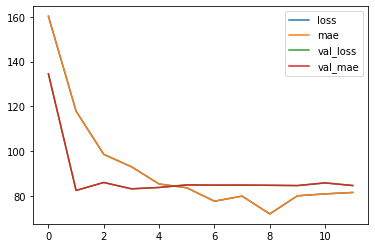

1/1 [==============================] - 0s 207ms/step - loss: 52.2461 - mae: 52.2461
[52.24613952636719, 52.24613952636719]
1/1 [==============================] - 0s 143ms/step
receta 0 kcal_true: 1475.0 kcal_pred: 1203.2046  precisión: 81.6 %
receta 0 carbohydrate_true: 151.1 carbohydrate_pred: 159.80292  precisión: 94.6 %
receta 0 protein_true: 50.2 protein_pred: 54.834503  precisión: 91.5 %
receta 0 total_fat_true: 78.9 total_fat_pred: 32.71827  precisión: 41.5 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1205.0 kcal_pred: 1307.4099  precisión: 92.2 %
receta 1 carbohydrate_true: 260.8 carbohydrate_pred: 175.6437  precisión: 67.4 %
receta 1 protein_true: 39.72 protein_pred: 68.1283  precisión: 58.3 %
receta 1 total_fat_true: 19.3 total_fat_pred: 31.810497  precisión: 60.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1202.0 kcal_pred: 1203.7488  precisión: 99.9 %
receta 2 carbohydr

100%|██████████| 100/100 [00:20<00:00,  4.93it/s]


Epoch 133/144
10/10 [==============================] - 2s 174ms/step - loss: 205.9180 - mae: 205.9180 - val_loss: 172.4251 - val_mae: 172.4251
Epoch 134/144
10/10 [==============================] - 2s 152ms/step - loss: 119.1655 - mae: 119.1655 - val_loss: 103.2852 - val_mae: 103.2852
Epoch 135/144
10/10 [==============================] - 2s 189ms/step - loss: 64.2455 - mae: 64.2455 - val_loss: 64.7839 - val_mae: 64.7839
Epoch 136/144
10/10 [==============================] - 2s 189ms/step - loss: 51.0446 - mae: 51.0446 - val_loss: 52.1139 - val_mae: 52.1139
Epoch 137/144
10/10 [==============================] - 2s 186ms/step - loss: 43.1977 - mae: 43.1977 - val_loss: 48.8763 - val_mae: 48.8763
Epoch 138/144
10/10 [==============================] - 2s 192ms/step - loss: 44.9163 - mae: 44.9163 - val_loss: 49.1532 - val_mae: 49.1532
Epoch 139/144
10/10 [==============================] - 2s 191ms/step - loss: 42.8789 - mae: 42.8789 - val_loss: 49.8516 - val_mae: 49.8516
Epoch 140/144
10/10

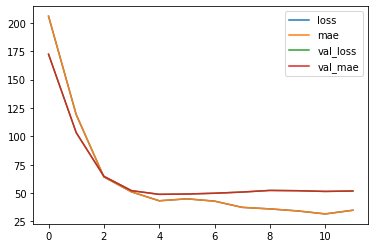

1/1 [==============================] - 0s 202ms/step - loss: 47.5382 - mae: 47.5382
[47.538246154785156, 47.538246154785156]
1/1 [==============================] - 0s 157ms/step
receta 0 kcal_true: 638.5 kcal_pred: 546.15784  precisión: 85.5 %
receta 0 carbohydrate_true: 149.8 carbohydrate_pred: 50.24379  precisión: 33.6 %
receta 0 protein_true: 13.51 protein_pred: 35.590553  precisión: 38.0 %
receta 0 total_fat_true: 5.85 total_fat_pred: 13.2702265  precisión: 44.1 %
---------------------------------------------------------------------------
receta 1 kcal_true: 618.5 kcal_pred: 593.6266  precisión: 96.0 %
receta 1 carbohydrate_true: 127.44 carbohydrate_pred: 62.349228  precisión: 48.9 %
receta 1 protein_true: 8.78 protein_pred: 31.129028  precisión: 28.2 %
receta 1 total_fat_true: 9.7 total_fat_pred: 14.17734  precisión: 68.4 %
---------------------------------------------------------------------------
receta 2 kcal_true: 694.5 kcal_pred: 541.374  precisión: 78.0 %
receta 2 carbohydra

100%|██████████| 100/100 [00:20<00:00,  4.97it/s]


Epoch 144/155
10/10 [==============================] - 2s 172ms/step - loss: 137.2316 - mae: 137.2316 - val_loss: 126.0481 - val_mae: 126.0481
Epoch 145/155
10/10 [==============================] - 2s 155ms/step - loss: 112.6699 - mae: 112.6699 - val_loss: 97.0389 - val_mae: 97.0389
Epoch 146/155
10/10 [==============================] - 2s 187ms/step - loss: 85.5897 - mae: 85.5897 - val_loss: 75.3152 - val_mae: 75.3152
Epoch 147/155
10/10 [==============================] - 2s 188ms/step - loss: 69.8312 - mae: 69.8312 - val_loss: 73.0317 - val_mae: 73.0317
Epoch 148/155
10/10 [==============================] - 2s 187ms/step - loss: 67.6632 - mae: 67.6632 - val_loss: 73.9277 - val_mae: 73.9277
Epoch 149/155
10/10 [==============================] - 2s 187ms/step - loss: 59.6851 - mae: 59.6851 - val_loss: 74.2824 - val_mae: 74.2824
Epoch 150/155
10/10 [==============================] - 2s 202ms/step - loss: 55.1787 - mae: 55.1787 - val_loss: 75.0009 - val_mae: 75.0009
Epoch 151/155
10/10 [

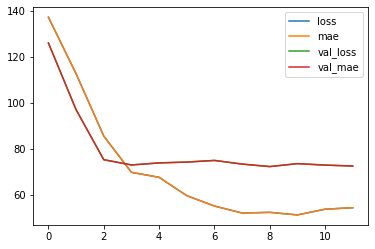

1/1 [==============================] - 0s 292ms/step - loss: 49.9291 - mae: 49.9291
[49.92912292480469, 49.92912292480469]
1/1 [==============================] - 0s 146ms/step
receta 0 kcal_true: 949.5 kcal_pred: 886.82086  precisión: 93.4 %
receta 0 carbohydrate_true: 226.5 carbohydrate_pred: 99.995995  precisión: 44.1 %
receta 0 protein_true: 10.9 protein_pred: 39.261192  precisión: 27.8 %
receta 0 total_fat_true: 3.8 total_fat_pred: 30.227184  precisión: 12.6 %
---------------------------------------------------------------------------
receta 1 kcal_true: 882.0 kcal_pred: 928.8235  precisión: 95.0 %
receta 1 carbohydrate_true: 26.97 carbohydrate_pred: 65.47334  precisión: 41.2 %
receta 1 protein_true: 139.6 protein_pred: 51.34951  precisión: 36.8 %
receta 1 total_fat_true: 23.38 total_fat_pred: 39.41692  precisión: 59.3 %
---------------------------------------------------------------------------
receta 2 kcal_true: 839.5 kcal_pred: 961.83563  precisión: 87.3 %
receta 2 carbohydrate

100%|██████████| 100/100 [00:20<00:00,  4.96it/s]


Epoch 155/166
10/10 [==============================] - 2s 173ms/step - loss: 143.5191 - mae: 143.5191 - val_loss: 147.9225 - val_mae: 147.9225
Epoch 156/166
10/10 [==============================] - 2s 165ms/step - loss: 112.2783 - mae: 112.2783 - val_loss: 107.4946 - val_mae: 107.4946
Epoch 157/166
10/10 [==============================] - 2s 201ms/step - loss: 84.4464 - mae: 84.4464 - val_loss: 88.0454 - val_mae: 88.0454
Epoch 158/166
10/10 [==============================] - 2s 189ms/step - loss: 83.6544 - mae: 83.6544 - val_loss: 92.8589 - val_mae: 92.8589
Epoch 159/166
10/10 [==============================] - 2s 190ms/step - loss: 87.0310 - mae: 87.0310 - val_loss: 101.2955 - val_mae: 101.2955
Epoch 160/166
10/10 [==============================] - 2s 189ms/step - loss: 76.2153 - mae: 76.2153 - val_loss: 92.8735 - val_mae: 92.8735
Epoch 161/166
10/10 [==============================] - 2s 188ms/step - loss: 74.8717 - mae: 74.8717 - val_loss: 94.3777 - val_mae: 94.3777
Epoch 162/166
10/

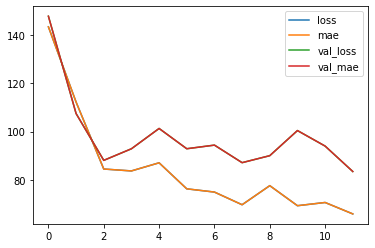

1/1 [==============================] - 0s 278ms/step - loss: 70.9998 - mae: 70.9998
[70.99983978271484, 70.99983978271484]
1/1 [==============================] - 0s 153ms/step
receta 0 kcal_true: 1334.0 kcal_pred: 1169.6925  precisión: 87.7 %
receta 0 carbohydrate_true: 246.2 carbohydrate_pred: 69.816986  precisión: 28.4 %
receta 0 protein_true: 62.66 protein_pred: 79.00035  precisión: 79.3 %
receta 0 total_fat_true: 10.36 total_fat_pred: 59.250034  precisión: 17.5 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1205.0 kcal_pred: 1299.6083  precisión: 92.7 %
receta 1 carbohydrate_true: 80.94 carbohydrate_pred: 104.21343  precisión: 77.7 %
receta 1 protein_true: 55.6 protein_pred: 83.9742  precisión: 66.2 %
receta 1 total_fat_true: 74.5 total_fat_pred: 57.25607  precisión: 76.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1220.0 kcal_pred: 1294.7211  precisión: 94.2 %
receta 2 carbohyd

100%|██████████| 100/100 [00:20<00:00,  4.99it/s]


Epoch 166/177
10/10 [==============================] - 2s 172ms/step - loss: 203.2881 - mae: 203.2881 - val_loss: 165.1480 - val_mae: 165.1480
Epoch 167/177
10/10 [==============================] - 2s 153ms/step - loss: 124.4559 - mae: 124.4559 - val_loss: 93.7377 - val_mae: 93.7377
Epoch 168/177
10/10 [==============================] - 2s 186ms/step - loss: 70.0046 - mae: 70.0046 - val_loss: 63.1535 - val_mae: 63.1535
Epoch 169/177
10/10 [==============================] - 2s 188ms/step - loss: 50.7504 - mae: 50.7504 - val_loss: 55.2274 - val_mae: 55.2274
Epoch 170/177
10/10 [==============================] - 2s 191ms/step - loss: 47.6369 - mae: 47.6369 - val_loss: 53.1787 - val_mae: 53.1787
Epoch 171/177
10/10 [==============================] - 2s 186ms/step - loss: 43.7529 - mae: 43.7529 - val_loss: 53.9483 - val_mae: 53.9483
Epoch 172/177
10/10 [==============================] - 2s 205ms/step - loss: 40.3696 - mae: 40.3696 - val_loss: 54.2709 - val_mae: 54.2709
Epoch 173/177
10/10 [

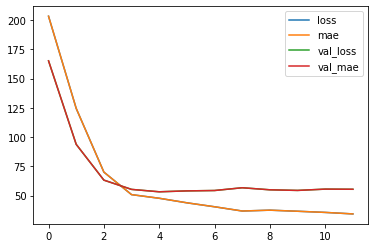

1/1 [==============================] - 0s 218ms/step - loss: 61.2855 - mae: 61.2855
[61.28553009033203, 61.28553009033203]
1/1 [==============================] - 0s 167ms/step
receta 0 kcal_true: 687.5 kcal_pred: 545.2052  precisión: 79.3 %
receta 0 carbohydrate_true: 91.6 carbohydrate_pred: 85.49544  precisión: 93.3 %
receta 0 protein_true: 36.28 protein_pred: 18.892962  precisión: 52.1 %
receta 0 total_fat_true: 21.73 total_fat_pred: 9.601395  precisión: 44.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 380.0 kcal_pred: 537.4045  precisión: 70.7 %
receta 1 carbohydrate_true: 85.8 carbohydrate_pred: 68.44719  precisión: 79.8 %
receta 1 protein_true: 1.99 protein_pred: 20.215477  precisión: 9.8 %
receta 1 total_fat_true: 2.97 total_fat_pred: 13.706349  precisión: 21.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 694.5 kcal_pred: 459.6573  precisión: 66.2 %
receta 2 carbohydrate_tru

100%|██████████| 100/100 [00:20<00:00,  4.92it/s]


Epoch 177/188
10/10 [==============================] - 2s 172ms/step - loss: 125.5841 - mae: 125.5841 - val_loss: 138.6306 - val_mae: 138.6306
Epoch 178/188
10/10 [==============================] - 2s 155ms/step - loss: 106.2151 - mae: 106.2151 - val_loss: 110.5919 - val_mae: 110.5919
Epoch 179/188
10/10 [==============================] - 2s 183ms/step - loss: 76.3019 - mae: 76.3019 - val_loss: 82.5378 - val_mae: 82.5378
Epoch 180/188
10/10 [==============================] - 2s 200ms/step - loss: 70.0042 - mae: 70.0042 - val_loss: 70.7473 - val_mae: 70.7473
Epoch 181/188
10/10 [==============================] - 2s 190ms/step - loss: 58.3322 - mae: 58.3322 - val_loss: 75.9568 - val_mae: 75.9568
Epoch 182/188
10/10 [==============================] - 2s 194ms/step - loss: 59.2980 - mae: 59.2980 - val_loss: 78.0821 - val_mae: 78.0821
Epoch 183/188
10/10 [==============================] - 2s 199ms/step - loss: 58.5094 - mae: 58.5094 - val_loss: 76.8664 - val_mae: 76.8664
Epoch 184/188
10/10

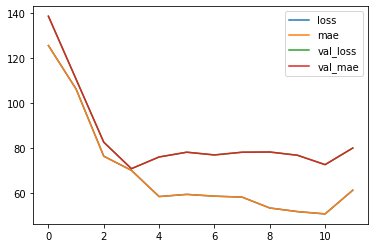

1/1 [==============================] - 0s 205ms/step - loss: 46.7690 - mae: 46.7690
[46.7690315246582, 46.7690315246582]
1/1 [==============================] - 0s 159ms/step
receta 0 kcal_true: 1080.0 kcal_pred: 778.099  precisión: 72.0 %
receta 0 carbohydrate_true: 42.03 carbohydrate_pred: 104.28014  precisión: 40.3 %
receta 0 protein_true: 45.9 protein_pred: 31.295975  precisión: 68.2 %
receta 0 total_fat_true: 81.75 total_fat_pred: 22.1411  precisión: 27.1 %
---------------------------------------------------------------------------
receta 1 kcal_true: 855.0 kcal_pred: 812.9824  precisión: 95.1 %
receta 1 carbohydrate_true: 21.8 carbohydrate_pred: 78.10873  precisión: 27.9 %
receta 1 protein_true: 39.94 protein_pred: 45.060978  precisión: 88.6 %
receta 1 total_fat_true: 75.56 total_fat_pred: 27.641228  precisión: 36.6 %
---------------------------------------------------------------------------
receta 2 kcal_true: 917.5 kcal_pred: 907.73706  precisión: 98.9 %
receta 2 carbohydrate_t

100%|██████████| 100/100 [00:20<00:00,  4.98it/s]


Epoch 188/199
10/10 [==============================] - 2s 175ms/step - loss: 178.0577 - mae: 178.0577 - val_loss: 159.7373 - val_mae: 159.7373
Epoch 189/199
10/10 [==============================] - 2s 161ms/step - loss: 133.8896 - mae: 133.8896 - val_loss: 113.3319 - val_mae: 113.3319
Epoch 190/199
10/10 [==============================] - 2s 190ms/step - loss: 99.2610 - mae: 99.2610 - val_loss: 91.0309 - val_mae: 91.0309
Epoch 191/199
10/10 [==============================] - 2s 186ms/step - loss: 98.0844 - mae: 98.0844 - val_loss: 91.6275 - val_mae: 91.6275
Epoch 192/199
10/10 [==============================] - 2s 198ms/step - loss: 84.4463 - mae: 84.4463 - val_loss: 95.9295 - val_mae: 95.9295
Epoch 193/199
10/10 [==============================] - 2s 191ms/step - loss: 81.7564 - mae: 81.7564 - val_loss: 98.9815 - val_mae: 98.9815
Epoch 194/199
10/10 [==============================] - 2s 211ms/step - loss: 85.4697 - mae: 85.4697 - val_loss: 94.3416 - val_mae: 94.3416
Epoch 195/199
10/10

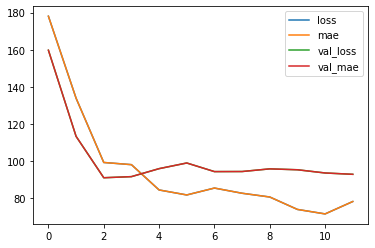

1/1 [==============================] - 0s 227ms/step - loss: 72.8397 - mae: 72.8397
[72.83967590332031, 72.83967590332031]
1/1 [==============================] - 0s 147ms/step
receta 0 kcal_true: 1453.0 kcal_pred: 1645.9742  precisión: 88.3 %
receta 0 carbohydrate_true: 213.4 carbohydrate_pred: 208.53973  precisión: 97.7 %
receta 0 protein_true: 62.06 protein_pred: 73.10545  precisión: 84.9 %
receta 0 total_fat_true: 40.78 total_fat_pred: 47.454597  precisión: 85.9 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1458.0 kcal_pred: 1284.8578  precisión: 88.1 %
receta 1 carbohydrate_true: 184.9 carbohydrate_pred: 81.1038  precisión: 43.9 %
receta 1 protein_true: 45.66 protein_pred: 96.700615  precisión: 47.2 %
receta 1 total_fat_true: 69.56 total_fat_pred: 52.234875  precisión: 75.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1481.0 kcal_pred: 1348.3878  precisión: 91.0 %
receta 2 carbo

100%|██████████| 100/100 [00:20<00:00,  4.91it/s]


Epoch 199/210
10/10 [==============================] - 2s 172ms/step - loss: 196.4895 - mae: 196.4895 - val_loss: 174.1192 - val_mae: 174.1192
Epoch 200/210
10/10 [==============================] - 2s 157ms/step - loss: 127.4508 - mae: 127.4508 - val_loss: 105.9471 - val_mae: 105.9471
Epoch 201/210
10/10 [==============================] - 2s 196ms/step - loss: 74.7207 - mae: 74.7207 - val_loss: 64.8341 - val_mae: 64.8341
Epoch 202/210
10/10 [==============================] - 2s 185ms/step - loss: 53.6986 - mae: 53.6986 - val_loss: 53.2938 - val_mae: 53.2938
Epoch 203/210
10/10 [==============================] - 2s 190ms/step - loss: 48.5443 - mae: 48.5443 - val_loss: 49.1664 - val_mae: 49.1664
Epoch 204/210
10/10 [==============================] - 2s 190ms/step - loss: 47.2882 - mae: 47.2882 - val_loss: 48.3584 - val_mae: 48.3584
Epoch 205/210
10/10 [==============================] - 2s 191ms/step - loss: 43.3784 - mae: 43.3784 - val_loss: 49.2522 - val_mae: 49.2522
Epoch 206/210
10/10

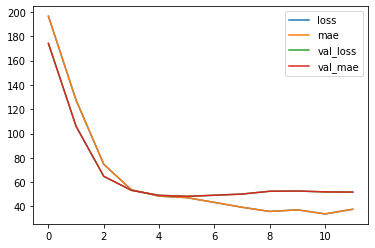

1/1 [==============================] - 0s 288ms/step - loss: 32.3996 - mae: 32.3996
[32.399627685546875, 32.399627685546875]
1/1 [==============================] - 0s 151ms/step
receta 0 kcal_true: 576.5 kcal_pred: 501.60867  precisión: 87.0 %
receta 0 carbohydrate_true: 46.44 carbohydrate_pred: 54.795956  precisión: 84.7 %
receta 0 protein_true: 51.1 protein_pred: 24.438442  precisión: 47.8 %
receta 0 total_fat_true: 20.98 total_fat_pred: 13.248726  precisión: 63.1 %
---------------------------------------------------------------------------
receta 1 kcal_true: 441.8 kcal_pred: 577.15625  precisión: 76.5 %
receta 1 carbohydrate_true: 23.67 carbohydrate_pred: 73.99224  precisión: 32.0 %
receta 1 protein_true: 24.73 protein_pred: 20.571735  precisión: 83.2 %
receta 1 total_fat_true: 28.1 total_fat_pred: 13.925103  precisión: 49.6 %
---------------------------------------------------------------------------
receta 2 kcal_true: 605.5 kcal_pred: 643.7371  precisión: 94.1 %
receta 2 carbohy

100%|██████████| 100/100 [00:20<00:00,  4.94it/s]


Epoch 210/221
10/10 [==============================] - 2s 181ms/step - loss: 133.7810 - mae: 133.7810 - val_loss: 116.3311 - val_mae: 116.3311
Epoch 211/221
10/10 [==============================] - 2s 154ms/step - loss: 105.9167 - mae: 105.9167 - val_loss: 87.3782 - val_mae: 87.3782
Epoch 212/221
10/10 [==============================] - 2s 188ms/step - loss: 76.8936 - mae: 76.8936 - val_loss: 70.0584 - val_mae: 70.0584
Epoch 213/221
10/10 [==============================] - 2s 185ms/step - loss: 70.0918 - mae: 70.0918 - val_loss: 69.5954 - val_mae: 69.5954
Epoch 214/221
10/10 [==============================] - 2s 190ms/step - loss: 63.0489 - mae: 63.0489 - val_loss: 69.4118 - val_mae: 69.4118
Epoch 215/221
10/10 [==============================] - 2s 198ms/step - loss: 67.9240 - mae: 67.9240 - val_loss: 70.1642 - val_mae: 70.1642
Epoch 216/221
10/10 [==============================] - 2s 189ms/step - loss: 59.5629 - mae: 59.5629 - val_loss: 70.5366 - val_mae: 70.5366
Epoch 217/221
10/10 [

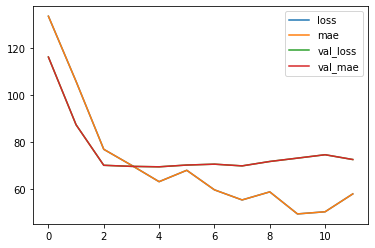

1/1 [==============================] - 0s 202ms/step - loss: 69.2544 - mae: 69.2544
[69.25443267822266, 69.25443267822266]
1/1 [==============================] - 0s 144ms/step
receta 0 kcal_true: 1181.0 kcal_pred: 901.1737  precisión: 76.3 %
receta 0 carbohydrate_true: 211.8 carbohydrate_pred: 80.085815  precisión: 37.8 %
receta 0 protein_true: 82.9 protein_pred: 54.059357  precisión: 65.2 %
receta 0 total_fat_true: 19.08 total_fat_pred: 31.460823  precisión: 60.6 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1157.0 kcal_pred: 1011.3114  precisión: 87.4 %
receta 1 carbohydrate_true: 97.25 carbohydrate_pred: 134.12843  precisión: 72.5 %
receta 1 protein_true: 90.94 protein_pred: 38.956825  precisión: 42.8 %
receta 1 total_fat_true: 45.66 total_fat_pred: 26.627277  precisión: 58.3 %
---------------------------------------------------------------------------
receta 2 kcal_true: 821.0 kcal_pred: 1034.6815  precisión: 79.3 %
receta 2 carbo

100%|██████████| 100/100 [00:20<00:00,  4.91it/s]


Epoch 221/232
10/10 [==============================] - 2s 175ms/step - loss: 155.7358 - mae: 155.7358 - val_loss: 138.8926 - val_mae: 138.8926
Epoch 222/232
10/10 [==============================] - 2s 156ms/step - loss: 99.7569 - mae: 99.7569 - val_loss: 87.9605 - val_mae: 87.9605
Epoch 223/232
10/10 [==============================] - 2s 192ms/step - loss: 89.9011 - mae: 89.9011 - val_loss: 85.7347 - val_mae: 85.7347
Epoch 224/232
10/10 [==============================] - 2s 191ms/step - loss: 73.4110 - mae: 73.4110 - val_loss: 87.3158 - val_mae: 87.3158
Epoch 225/232
10/10 [==============================] - 2s 197ms/step - loss: 80.0508 - mae: 80.0508 - val_loss: 88.6338 - val_mae: 88.6338
Epoch 226/232
10/10 [==============================] - 2s 191ms/step - loss: 74.9528 - mae: 74.9528 - val_loss: 83.3261 - val_mae: 83.3261
Epoch 227/232
10/10 [==============================] - 2s 192ms/step - loss: 72.0339 - mae: 72.0339 - val_loss: 85.6380 - val_mae: 85.6380
Epoch 228/232
10/10 [==

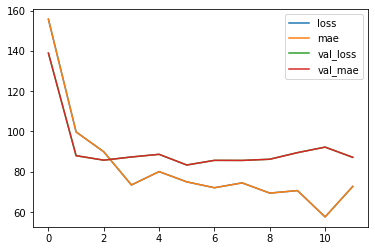

1/1 [==============================] - 0s 210ms/step - loss: 107.9827 - mae: 107.9827
[107.98268127441406, 107.98268127441406]
1/1 [==============================] - 0s 156ms/step
receta 0 kcal_true: 1681.0 kcal_pred: 1302.8135  precisión: 77.5 %
receta 0 carbohydrate_true: 139.6 carbohydrate_pred: 85.98543  precisión: 61.6 %
receta 0 protein_true: 88.06 protein_pred: 92.837326  precisión: 94.9 %
receta 0 total_fat_true: 84.7 total_fat_pred: 56.873543  precisión: 67.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1311.0 kcal_pred: 1445.7927  precisión: 90.7 %
receta 1 carbohydrate_true: 128.5 carbohydrate_pred: 90.693436  precisión: 70.6 %
receta 1 protein_true: 65.9 protein_pred: 93.09015  precisión: 70.8 %
receta 1 total_fat_true: 60.9 total_fat_pred: 64.349915  precisión: 94.6 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1240.0 kcal_pred: 1516.3218  precisión: 81.8 %
receta 2 car

100%|██████████| 100/100 [00:20<00:00,  4.95it/s]


Epoch 232/243
10/10 [==============================] - 2s 175ms/step - loss: 220.1674 - mae: 220.1674 - val_loss: 187.5880 - val_mae: 187.5880
Epoch 233/243
10/10 [==============================] - 2s 166ms/step - loss: 141.3490 - mae: 141.3490 - val_loss: 110.8282 - val_mae: 110.8282
Epoch 234/243
10/10 [==============================] - 2s 189ms/step - loss: 70.7206 - mae: 70.7206 - val_loss: 66.6716 - val_mae: 66.6716
Epoch 235/243
10/10 [==============================] - 2s 192ms/step - loss: 59.2556 - mae: 59.2556 - val_loss: 60.3464 - val_mae: 60.3464
Epoch 236/243
10/10 [==============================] - 2s 195ms/step - loss: 49.3189 - mae: 49.3189 - val_loss: 58.1308 - val_mae: 58.1308
Epoch 237/243
10/10 [==============================] - 2s 184ms/step - loss: 48.4936 - mae: 48.4936 - val_loss: 57.7530 - val_mae: 57.7530
Epoch 238/243
10/10 [==============================] - 2s 203ms/step - loss: 45.2254 - mae: 45.2254 - val_loss: 57.7345 - val_mae: 57.7345
Epoch 239/243
10/10

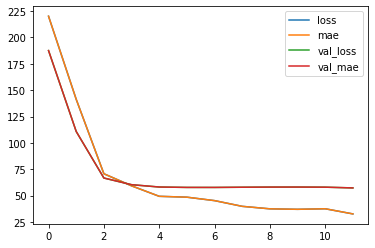

1/1 [==============================] - 0s 268ms/step - loss: 44.7382 - mae: 44.7382
[44.738243103027344, 44.738243103027344]
1/1 [==============================] - 0s 151ms/step
receta 0 kcal_true: 589.5 kcal_pred: 540.3857  precisión: 91.7 %
receta 0 carbohydrate_true: 27.31 carbohydrate_pred: 45.42666  precisión: 60.1 %
receta 0 protein_true: 57.75 protein_pred: 27.455572  precisión: 47.5 %
receta 0 total_fat_true: 28.05 total_fat_pred: 18.730597  precisión: 66.8 %
---------------------------------------------------------------------------
receta 1 kcal_true: 523.0 kcal_pred: 636.4972  precisión: 82.2 %
receta 1 carbohydrate_true: 89.4 carbohydrate_pred: 76.24647  precisión: 85.3 %
receta 1 protein_true: 29.78 protein_pred: 24.307589  precisión: 81.6 %
receta 1 total_fat_true: 7.38 total_fat_pred: 18.4035  precisión: 40.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 424.0 kcal_pred: 543.4912  precisión: 78.0 %
receta 2 carbohydrate

100%|██████████| 100/100 [00:20<00:00,  4.89it/s]


Epoch 243/254
10/10 [==============================] - 2s 175ms/step - loss: 120.2799 - mae: 120.2799 - val_loss: 117.6159 - val_mae: 117.6159
Epoch 244/254
10/10 [==============================] - 2s 170ms/step - loss: 95.4715 - mae: 95.4715 - val_loss: 89.9581 - val_mae: 89.9581
Epoch 245/254
10/10 [==============================] - 2s 190ms/step - loss: 77.1969 - mae: 77.1969 - val_loss: 67.6452 - val_mae: 67.6452
Epoch 246/254
10/10 [==============================] - 2s 189ms/step - loss: 65.0374 - mae: 65.0374 - val_loss: 58.8563 - val_mae: 58.8563
Epoch 247/254
10/10 [==============================] - 2s 197ms/step - loss: 66.5442 - mae: 66.5442 - val_loss: 60.4846 - val_mae: 60.4846
Epoch 248/254
10/10 [==============================] - 2s 191ms/step - loss: 59.2069 - mae: 59.2069 - val_loss: 64.6577 - val_mae: 64.6577
Epoch 249/254
10/10 [==============================] - 2s 190ms/step - loss: 59.0193 - mae: 59.0193 - val_loss: 65.2280 - val_mae: 65.2280
Epoch 250/254
10/10 [==

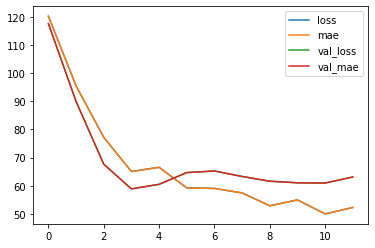

1/1 [==============================] - 0s 284ms/step - loss: 51.7925 - mae: 51.7925
[51.79252624511719, 51.79252624511719]
1/1 [==============================] - 0s 142ms/step
receta 0 kcal_true: 1044.0 kcal_pred: 1066.5052  precisión: 97.9 %
receta 0 carbohydrate_true: 120.75 carbohydrate_pred: 151.48714  precisión: 79.7 %
receta 0 protein_true: 6.86 protein_pred: 36.14471  precisión: 19.0 %
receta 0 total_fat_true: 67.3 total_fat_pred: 26.384012  precisión: 39.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1096.0 kcal_pred: 1035.4473  precisión: 94.5 %
receta 1 carbohydrate_true: 122.3 carbohydrate_pred: 108.97349  precisión: 89.1 %
receta 1 protein_true: 84.44 protein_pred: 47.91159  precisión: 56.7 %
receta 1 total_fat_true: 26.5 total_fat_pred: 31.77917  precisión: 83.4 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1182.0 kcal_pred: 910.13336  precisión: 77.0 %
receta 2 carbohy

100%|██████████| 100/100 [00:20<00:00,  4.95it/s]


Epoch 254/265
10/10 [==============================] - 2s 172ms/step - loss: 159.0936 - mae: 159.0936 - val_loss: 172.9573 - val_mae: 172.9573
Epoch 255/265
10/10 [==============================] - 2s 161ms/step - loss: 118.7516 - mae: 118.7516 - val_loss: 124.5538 - val_mae: 124.5538
Epoch 256/265
10/10 [==============================] - 2s 188ms/step - loss: 97.8113 - mae: 97.8113 - val_loss: 104.5846 - val_mae: 104.5846
Epoch 257/265
10/10 [==============================] - 2s 192ms/step - loss: 89.2221 - mae: 89.2221 - val_loss: 102.5580 - val_mae: 102.5580
Epoch 258/265
10/10 [==============================] - 2s 187ms/step - loss: 86.0500 - mae: 86.0500 - val_loss: 111.9498 - val_mae: 111.9498
Epoch 259/265
10/10 [==============================] - 2s 188ms/step - loss: 76.7870 - mae: 76.7870 - val_loss: 110.9680 - val_mae: 110.9680
Epoch 260/265
10/10 [==============================] - 2s 201ms/step - loss: 83.5697 - mae: 83.5697 - val_loss: 106.2471 - val_mae: 106.2471
Epoch 261

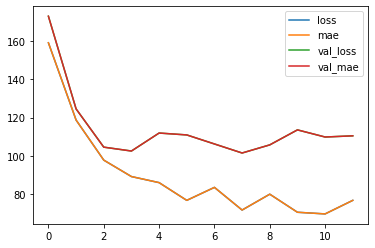

1/1 [==============================] - 0s 283ms/step - loss: 119.2483 - mae: 119.2483
[119.24827575683594, 119.24827575683594]
1/1 [==============================] - 0s 159ms/step
receta 0 kcal_true: 1232.0 kcal_pred: 1577.9297  precisión: 78.1 %
receta 0 carbohydrate_true: 94.3 carbohydrate_pred: 168.6882  precisión: 55.9 %
receta 0 protein_true: 101.4 protein_pred: 82.998405  precisión: 81.9 %
receta 0 total_fat_true: 53.62 total_fat_pred: 50.19331  precisión: 93.6 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1656.0 kcal_pred: 1228.3802  precisión: 74.2 %
receta 1 carbohydrate_true: 367.0 carbohydrate_pred: 99.59479  precisión: 27.1 %
receta 1 protein_true: 42.5 protein_pred: 79.204956  precisión: 53.7 %
receta 1 total_fat_true: 13.38 total_fat_pred: 46.291264  precisión: 28.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1692.0 kcal_pred: 1280.3928  precisión: 75.7 %
receta 2 car

100%|██████████| 100/100 [00:20<00:00,  4.94it/s]


Epoch 265/276
10/10 [==============================] - 2s 171ms/step - loss: 194.9940 - mae: 194.9940 - val_loss: 166.8789 - val_mae: 166.8789
Epoch 266/276
10/10 [==============================] - 2s 164ms/step - loss: 121.3545 - mae: 121.3545 - val_loss: 100.4179 - val_mae: 100.4179
Epoch 267/276
10/10 [==============================] - 2s 195ms/step - loss: 65.8367 - mae: 65.8367 - val_loss: 69.5355 - val_mae: 69.5355
Epoch 268/276
10/10 [==============================] - 2s 186ms/step - loss: 57.5622 - mae: 57.5622 - val_loss: 60.1627 - val_mae: 60.1627
Epoch 269/276
10/10 [==============================] - 2s 193ms/step - loss: 53.0499 - mae: 53.0499 - val_loss: 57.8531 - val_mae: 57.8531
Epoch 270/276
10/10 [==============================] - 2s 194ms/step - loss: 46.3897 - mae: 46.3897 - val_loss: 57.9074 - val_mae: 57.9074
Epoch 271/276
10/10 [==============================] - 2s 188ms/step - loss: 44.8287 - mae: 44.8287 - val_loss: 58.3103 - val_mae: 58.3103
Epoch 272/276
10/10

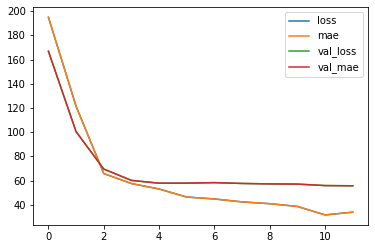

1/1 [==============================] - 0s 274ms/step - loss: 42.0886 - mae: 42.0886
[42.088645935058594, 42.088645935058594]
1/1 [==============================] - 0s 211ms/step
receta 0 kcal_true: 745.5 kcal_pred: 599.42694  precisión: 80.4 %
receta 0 carbohydrate_true: 109.06 carbohydrate_pred: 105.14032  precisión: 96.4 %
receta 0 protein_true: 42.0 protein_pred: 17.684975  precisión: 42.1 %
receta 0 total_fat_true: 15.99 total_fat_pred: 7.9904823  precisión: 50.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 593.0 kcal_pred: 610.5352  precisión: 97.1 %
receta 1 carbohydrate_true: 98.9 carbohydrate_pred: 77.86328  precisión: 78.7 %
receta 1 protein_true: 35.28 protein_pred: 24.461964  precisión: 69.3 %
receta 1 total_fat_true: 5.88 total_fat_pred: 15.047848  precisión: 39.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 543.5 kcal_pred: 673.4057  precisión: 80.7 %
receta 2 carbohyd

100%|██████████| 100/100 [00:20<00:00,  4.98it/s]


Epoch 276/287
10/10 [==============================] - 2s 174ms/step - loss: 120.4701 - mae: 120.4701 - val_loss: 113.2468 - val_mae: 113.2468
Epoch 277/287
10/10 [==============================] - 2s 169ms/step - loss: 95.3664 - mae: 95.3664 - val_loss: 85.2801 - val_mae: 85.2801
Epoch 278/287
10/10 [==============================] - 2s 188ms/step - loss: 73.8952 - mae: 73.8952 - val_loss: 65.3674 - val_mae: 65.3674
Epoch 279/287
10/10 [==============================] - 2s 188ms/step - loss: 63.3070 - mae: 63.3070 - val_loss: 62.3145 - val_mae: 62.3145
Epoch 280/287
10/10 [==============================] - 2s 187ms/step - loss: 67.8298 - mae: 67.8298 - val_loss: 62.3347 - val_mae: 62.3347
Epoch 281/287
10/10 [==============================] - 2s 187ms/step - loss: 56.8696 - mae: 56.8696 - val_loss: 62.6035 - val_mae: 62.6035
Epoch 282/287
10/10 [==============================] - 2s 191ms/step - loss: 49.1296 - mae: 49.1296 - val_loss: 64.4965 - val_mae: 64.4965
Epoch 283/287
10/10 [==

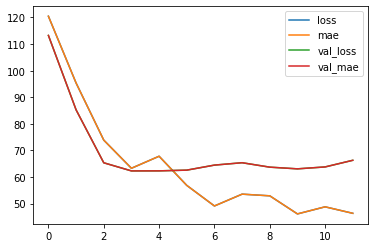

1/1 [==============================] - 0s 215ms/step - loss: 74.3200 - mae: 74.3200
[74.3200454711914, 74.3200454711914]
1/1 [==============================] - 0s 171ms/step
receta 0 kcal_true: 886.0 kcal_pred: 945.6096  precisión: 93.7 %
receta 0 carbohydrate_true: 121.75 carbohydrate_pred: 103.74914  precisión: 85.2 %
receta 0 protein_true: 16.9 protein_pred: 51.782932  precisión: 32.6 %
receta 0 total_fat_true: 39.12 total_fat_pred: 28.216948  precisión: 72.1 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1038.0 kcal_pred: 898.8025  precisión: 86.6 %
receta 1 carbohydrate_true: 111.0 carbohydrate_pred: 71.26292  precisión: 64.2 %
receta 1 protein_true: 82.0 protein_pred: 60.604736  precisión: 73.9 %
receta 1 total_fat_true: 30.06 total_fat_pred: 32.196426  precisión: 93.4 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1150.0 kcal_pred: 888.26013  precisión: 77.2 %
receta 2 carbohydr

100%|██████████| 100/100 [00:20<00:00,  4.95it/s]


Epoch 287/298
10/10 [==============================] - 2s 171ms/step - loss: 167.6019 - mae: 167.6019 - val_loss: 129.3274 - val_mae: 129.3274
Epoch 288/298
10/10 [==============================] - 2s 158ms/step - loss: 130.0976 - mae: 130.0976 - val_loss: 85.9230 - val_mae: 85.9230
Epoch 289/298
10/10 [==============================] - 2s 186ms/step - loss: 95.0090 - mae: 95.0090 - val_loss: 78.4351 - val_mae: 78.4351
Epoch 290/298
10/10 [==============================] - 2s 191ms/step - loss: 87.5220 - mae: 87.5220 - val_loss: 73.9875 - val_mae: 73.9875
Epoch 291/298
10/10 [==============================] - 2s 202ms/step - loss: 74.8662 - mae: 74.8662 - val_loss: 73.0169 - val_mae: 73.0169
Epoch 292/298
10/10 [==============================] - 2s 186ms/step - loss: 86.3364 - mae: 86.3364 - val_loss: 73.5352 - val_mae: 73.5352
Epoch 293/298
10/10 [==============================] - 2s 190ms/step - loss: 75.8396 - mae: 75.8396 - val_loss: 75.6019 - val_mae: 75.6019
Epoch 294/298
10/10 [

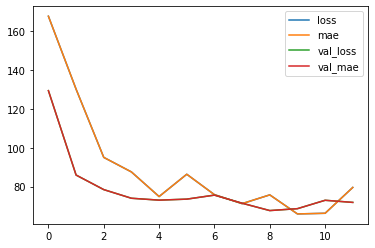

1/1 [==============================] - 0s 264ms/step - loss: 111.9160 - mae: 111.9160
[111.91596221923828, 111.91596221923828]
1/1 [==============================] - 0s 141ms/step
receta 0 kcal_true: 1690.0 kcal_pred: 1399.1368  precisión: 82.8 %
receta 0 carbohydrate_true: 388.2 carbohydrate_pred: 159.25385  precisión: 41.0 %
receta 0 protein_true: 60.97 protein_pred: 69.02356  precisión: 88.3 %
receta 0 total_fat_true: 27.8 total_fat_pred: 44.882744  precisión: 61.9 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1591.0 kcal_pred: 1219.2169  precisión: 76.6 %
receta 1 carbohydrate_true: 406.8 carbohydrate_pred: 71.03426  precisión: 17.5 %
receta 1 protein_true: 9.06 protein_pred: 85.81769  precisión: 10.6 %
receta 1 total_fat_true: 1.01 total_fat_pred: 51.15133  precisión: 2.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1301.0 kcal_pred: 1222.6412  precisión: 94.0 %
receta 2 carboh

100%|██████████| 100/100 [00:20<00:00,  4.98it/s]


Epoch 298/309
10/10 [==============================] - 2s 173ms/step - loss: 197.1191 - mae: 197.1191 - val_loss: 146.1100 - val_mae: 146.1100
Epoch 299/309
10/10 [==============================] - 2s 166ms/step - loss: 130.1655 - mae: 130.1655 - val_loss: 82.3046 - val_mae: 82.3046
Epoch 300/309
10/10 [==============================] - 2s 190ms/step - loss: 66.3055 - mae: 66.3055 - val_loss: 55.1388 - val_mae: 55.1388
Epoch 301/309
10/10 [==============================] - 2s 189ms/step - loss: 45.7745 - mae: 45.7745 - val_loss: 53.1929 - val_mae: 53.1929
Epoch 302/309
10/10 [==============================] - 2s 187ms/step - loss: 45.5127 - mae: 45.5127 - val_loss: 53.5032 - val_mae: 53.5032
Epoch 303/309
10/10 [==============================] - 2s 193ms/step - loss: 41.3379 - mae: 41.3379 - val_loss: 53.2988 - val_mae: 53.2988
Epoch 304/309
10/10 [==============================] - 2s 196ms/step - loss: 37.9199 - mae: 37.9199 - val_loss: 53.0002 - val_mae: 53.0002
Epoch 305/309
10/10 [

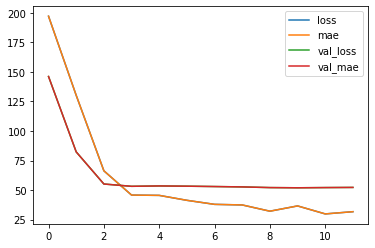

1/1 [==============================] - 0s 250ms/step - loss: 38.1880 - mae: 38.1880
[38.18799591064453, 38.18799591064453]
1/1 [==============================] - 0s 142ms/step
receta 0 kcal_true: 477.0 kcal_pred: 523.30896  precisión: 91.2 %
receta 0 carbohydrate_true: 1.15 carbohydrate_pred: 68.06461  precisión: 1.7 %
receta 0 protein_true: 34.4 protein_pred: 21.62517  precisión: 62.9 %
receta 0 total_fat_true: 36.03 total_fat_pred: 10.14975  precisión: 28.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 364.8 kcal_pred: 517.2415  precisión: 70.5 %
receta 1 carbohydrate_true: 14.41 carbohydrate_pred: 63.798344  precisión: 22.6 %
receta 1 protein_true: 34.72 protein_pred: 23.896095  precisión: 68.8 %
receta 1 total_fat_true: 20.05 total_fat_pred: 12.459002  precisión: 62.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 630.5 kcal_pred: 588.89746  precisión: 93.4 %
receta 2 carbohydrate

100%|██████████| 100/100 [00:20<00:00,  4.90it/s]


Epoch 309/320
10/10 [==============================] - 2s 178ms/step - loss: 130.1724 - mae: 130.1724 - val_loss: 120.3297 - val_mae: 120.3297
Epoch 310/320
10/10 [==============================] - 2s 158ms/step - loss: 107.4088 - mae: 107.4088 - val_loss: 91.4209 - val_mae: 91.4209
Epoch 311/320
10/10 [==============================] - 2s 189ms/step - loss: 77.7632 - mae: 77.7632 - val_loss: 64.7675 - val_mae: 64.7675
Epoch 312/320
10/10 [==============================] - 2s 195ms/step - loss: 63.2064 - mae: 63.2064 - val_loss: 60.5348 - val_mae: 60.5348
Epoch 313/320
10/10 [==============================] - 2s 197ms/step - loss: 60.8568 - mae: 60.8568 - val_loss: 60.8040 - val_mae: 60.8040
Epoch 314/320
10/10 [==============================] - 2s 202ms/step - loss: 57.3688 - mae: 57.3688 - val_loss: 60.9769 - val_mae: 60.9769
Epoch 315/320
10/10 [==============================] - 2s 192ms/step - loss: 50.2402 - mae: 50.2402 - val_loss: 61.1463 - val_mae: 61.1463
Epoch 316/320
10/10 [

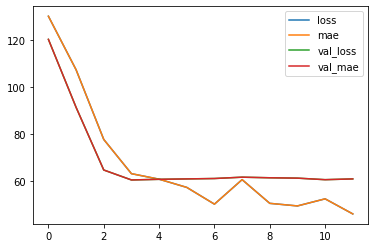

1/1 [==============================] - 0s 208ms/step - loss: 49.9451 - mae: 49.9451
[49.94511795043945, 49.94511795043945]
1/1 [==============================] - 0s 145ms/step
receta 0 kcal_true: 1056.0 kcal_pred: 884.32513  precisión: 83.7 %
receta 0 carbohydrate_true: 225.1 carbohydrate_pred: 129.24724  precisión: 57.4 %
receta 0 protein_true: 22.25 protein_pred: 32.9173  precisión: 67.6 %
receta 0 total_fat_true: 10.94 total_fat_pred: 22.66629  precisión: 48.3 %
---------------------------------------------------------------------------
receta 1 kcal_true: 850.0 kcal_pred: 909.4237  precisión: 93.5 %
receta 1 carbohydrate_true: 214.0 carbohydrate_pred: 108.14862  precisión: 50.5 %
receta 1 protein_true: 112.1 protein_pred: 39.770874  precisión: 35.5 %
receta 1 total_fat_true: 6.6 total_fat_pred: 29.757572  precisión: 22.2 %
---------------------------------------------------------------------------
receta 2 kcal_true: 900.0 kcal_pred: 924.26697  precisión: 97.4 %
receta 2 carbohydra

100%|██████████| 100/100 [00:20<00:00,  4.94it/s]


Epoch 320/331
10/10 [==============================] - 2s 172ms/step - loss: 148.9422 - mae: 148.9422 - val_loss: 131.2889 - val_mae: 131.2889
Epoch 321/331
10/10 [==============================] - 2s 167ms/step - loss: 111.7967 - mae: 111.7967 - val_loss: 90.8235 - val_mae: 90.8235
Epoch 322/331
10/10 [==============================] - 2s 192ms/step - loss: 100.6069 - mae: 100.6069 - val_loss: 85.6786 - val_mae: 85.6786
Epoch 323/331
10/10 [==============================] - 2s 189ms/step - loss: 91.3975 - mae: 91.3975 - val_loss: 89.1487 - val_mae: 89.1487
Epoch 324/331
10/10 [==============================] - 2s 191ms/step - loss: 97.0544 - mae: 97.0544 - val_loss: 92.0285 - val_mae: 92.0285
Epoch 325/331
10/10 [==============================] - 2s 193ms/step - loss: 77.9362 - mae: 77.9362 - val_loss: 88.6668 - val_mae: 88.6668
Epoch 326/331
10/10 [==============================] - 2s 202ms/step - loss: 68.0589 - mae: 68.0589 - val_loss: 83.6559 - val_mae: 83.6559
Epoch 327/331
10/10

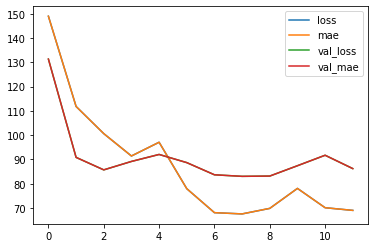

1/1 [==============================] - 0s 209ms/step - loss: 62.8868 - mae: 62.8868
[62.886844635009766, 62.886844635009766]
1/1 [==============================] - 0s 167ms/step
receta 0 kcal_true: 1474.0 kcal_pred: 1257.3566  precisión: 85.3 %
receta 0 carbohydrate_true: 123.5 carbohydrate_pred: 153.11346  precisión: 80.7 %
receta 0 protein_true: 37.47 protein_pred: 55.82489  precisión: 67.1 %
receta 0 total_fat_true: 97.56 total_fat_pred: 42.9038  precisión: 44.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1603.0 kcal_pred: 1613.3296  precisión: 99.4 %
receta 1 carbohydrate_true: 100.25 carbohydrate_pred: 113.78612  precisión: 88.1 %
receta 1 protein_true: 183.1 protein_pred: 106.65464  precisión: 58.2 %
receta 1 total_fat_true: 54.5 total_fat_pred: 68.91273  precisión: 79.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1414.0 kcal_pred: 1308.1033  precisión: 92.5 %
receta 2 carb

100%|██████████| 100/100 [00:20<00:00,  4.98it/s]


Epoch 331/342
10/10 [==============================] - 2s 173ms/step - loss: 227.9594 - mae: 227.9594 - val_loss: 165.2318 - val_mae: 165.2318
Epoch 332/342
10/10 [==============================] - 2s 166ms/step - loss: 143.6152 - mae: 143.6152 - val_loss: 89.0004 - val_mae: 89.0004
Epoch 333/342
10/10 [==============================] - 2s 184ms/step - loss: 80.4530 - mae: 80.4530 - val_loss: 51.5492 - val_mae: 51.5492
Epoch 334/342
10/10 [==============================] - 2s 192ms/step - loss: 49.0903 - mae: 49.0903 - val_loss: 46.5418 - val_mae: 46.5418
Epoch 335/342
10/10 [==============================] - 2s 187ms/step - loss: 43.5772 - mae: 43.5772 - val_loss: 46.7321 - val_mae: 46.7321
Epoch 336/342
10/10 [==============================] - 2s 192ms/step - loss: 41.4955 - mae: 41.4955 - val_loss: 47.6495 - val_mae: 47.6495
Epoch 337/342
10/10 [==============================] - 2s 197ms/step - loss: 40.5513 - mae: 40.5513 - val_loss: 47.8636 - val_mae: 47.8636
Epoch 338/342
10/10 [

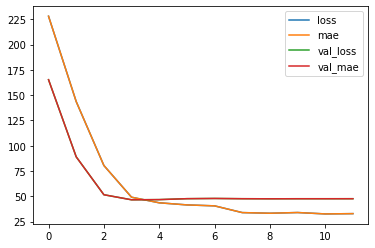

1/1 [==============================] - 0s 231ms/step - loss: 55.6953 - mae: 55.6953
[55.69530487060547, 55.69530487060547]
1/1 [==============================] - 0s 147ms/step
receta 0 kcal_true: 699.5 kcal_pred: 564.97784  precisión: 80.8 %
receta 0 carbohydrate_true: 123.75 carbohydrate_pred: 70.14529  precisión: 56.7 %
receta 0 protein_true: 17.06 protein_pred: 20.847872  precisión: 81.8 %
receta 0 total_fat_true: 13.88 total_fat_pred: 13.8458185  precisión: 99.7 %
---------------------------------------------------------------------------
receta 1 kcal_true: 676.0 kcal_pred: 495.02313  precisión: 73.2 %
receta 1 carbohydrate_true: 46.25 carbohydrate_pred: 52.656815  precisión: 87.8 %
receta 1 protein_true: 51.5 protein_pred: 22.441486  precisión: 43.6 %
receta 1 total_fat_true: 31.05 total_fat_pred: 13.497797  precisión: 43.5 %
---------------------------------------------------------------------------
receta 2 kcal_true: 739.0 kcal_pred: 469.42923  precisión: 63.5 %
receta 2 carbo

100%|██████████| 100/100 [00:20<00:00,  4.94it/s]


Epoch 342/353
10/10 [==============================] - 2s 177ms/step - loss: 131.5414 - mae: 131.5414 - val_loss: 126.5718 - val_mae: 126.5718
Epoch 343/353
10/10 [==============================] - 2s 172ms/step - loss: 97.5256 - mae: 97.5256 - val_loss: 97.4236 - val_mae: 97.4236
Epoch 344/353
10/10 [==============================] - 2s 187ms/step - loss: 77.3968 - mae: 77.3968 - val_loss: 82.9337 - val_mae: 82.9337
Epoch 345/353
10/10 [==============================] - 2s 191ms/step - loss: 67.4998 - mae: 67.4998 - val_loss: 79.0610 - val_mae: 79.0610
Epoch 346/353
10/10 [==============================] - 2s 185ms/step - loss: 60.5378 - mae: 60.5378 - val_loss: 77.2550 - val_mae: 77.2550
Epoch 347/353
10/10 [==============================] - 2s 190ms/step - loss: 56.0555 - mae: 56.0555 - val_loss: 77.1739 - val_mae: 77.1739
Epoch 348/353
10/10 [==============================] - 2s 197ms/step - loss: 56.1604 - mae: 56.1604 - val_loss: 79.1475 - val_mae: 79.1475
Epoch 349/353
10/10 [==

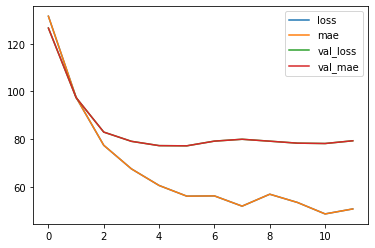

1/1 [==============================] - 0s 339ms/step - loss: 71.3709 - mae: 71.3709
[71.37085723876953, 71.37085723876953]
1/1 [==============================] - 0s 191ms/step
receta 0 kcal_true: 937.0 kcal_pred: 985.4241  precisión: 95.1 %
receta 0 carbohydrate_true: 36.78 carbohydrate_pred: 46.37456  precisión: 79.3 %
receta 0 protein_true: 132.6 protein_pred: 66.26019  precisión: 50.0 %
receta 0 total_fat_true: 25.95 total_fat_pred: 42.01276  precisión: 61.8 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1132.0 kcal_pred: 854.7588  precisión: 75.5 %
receta 1 carbohydrate_true: 23.62 carbohydrate_pred: 77.88363  precisión: 30.3 %
receta 1 protein_true: 172.2 protein_pred: 42.626358  precisión: 24.7 %
receta 1 total_fat_true: 40.8 total_fat_pred: 32.113007  precisión: 78.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 977.0 kcal_pred: 787.77136  precisión: 80.6 %
receta 2 carbohydrat

100%|██████████| 100/100 [00:20<00:00,  4.90it/s]


Epoch 353/364
10/10 [==============================] - 2s 174ms/step - loss: 165.9693 - mae: 165.9693 - val_loss: 146.1015 - val_mae: 146.1015
Epoch 354/364
10/10 [==============================] - 2s 169ms/step - loss: 116.7408 - mae: 116.7408 - val_loss: 108.4782 - val_mae: 108.4782
Epoch 355/364
10/10 [==============================] - 2s 191ms/step - loss: 96.4358 - mae: 96.4358 - val_loss: 90.3307 - val_mae: 90.3307
Epoch 356/364
10/10 [==============================] - 2s 186ms/step - loss: 87.4581 - mae: 87.4581 - val_loss: 89.4291 - val_mae: 89.4291
Epoch 357/364
10/10 [==============================] - 2s 192ms/step - loss: 82.6560 - mae: 82.6560 - val_loss: 94.6285 - val_mae: 94.6285
Epoch 358/364
10/10 [==============================] - 2s 192ms/step - loss: 69.4330 - mae: 69.4330 - val_loss: 93.2812 - val_mae: 93.2812
Epoch 359/364
10/10 [==============================] - 2s 197ms/step - loss: 80.1713 - mae: 80.1713 - val_loss: 88.5567 - val_mae: 88.5567
Epoch 360/364
10/10

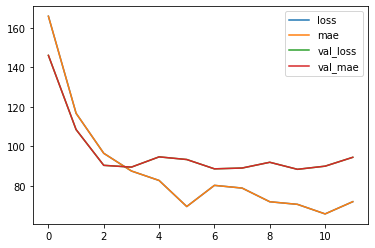

1/1 [==============================] - 0s 220ms/step - loss: 66.0021 - mae: 66.0021
[66.00205993652344, 66.00205993652344]
1/1 [==============================] - 0s 149ms/step
receta 0 kcal_true: 1396.0 kcal_pred: 1398.6726  precisión: 99.8 %
receta 0 carbohydrate_true: 60.44 carbohydrate_pred: 72.41642  precisión: 83.5 %
receta 0 protein_true: 173.0 protein_pred: 100.740814  precisión: 58.2 %
receta 0 total_fat_true: 47.16 total_fat_pred: 64.333336  precisión: 73.3 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1221.0 kcal_pred: 1289.2212  precisión: 94.7 %
receta 1 carbohydrate_true: 47.38 carbohydrate_pred: 91.44856  precisión: 51.8 %
receta 1 protein_true: 109.0 protein_pred: 82.10723  precisión: 75.3 %
receta 1 total_fat_true: 68.9 total_fat_pred: 54.222763  precisión: 78.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1408.0 kcal_pred: 1456.231  precisión: 96.7 %
receta 2 carboh

100%|██████████| 100/100 [00:20<00:00,  4.92it/s]


Epoch 364/375
10/10 [==============================] - 2s 171ms/step - loss: 187.8062 - mae: 187.8062 - val_loss: 158.5022 - val_mae: 158.5022
Epoch 365/375
10/10 [==============================] - 2s 157ms/step - loss: 115.1514 - mae: 115.1514 - val_loss: 95.2099 - val_mae: 95.2099
Epoch 366/375
10/10 [==============================] - 2s 186ms/step - loss: 71.0278 - mae: 71.0278 - val_loss: 64.0500 - val_mae: 64.0500
Epoch 367/375
10/10 [==============================] - 2s 191ms/step - loss: 52.2517 - mae: 52.2517 - val_loss: 54.5006 - val_mae: 54.5006
Epoch 368/375
10/10 [==============================] - 2s 191ms/step - loss: 47.7362 - mae: 47.7362 - val_loss: 52.1375 - val_mae: 52.1375
Epoch 369/375
10/10 [==============================] - 2s 188ms/step - loss: 46.8823 - mae: 46.8823 - val_loss: 51.6602 - val_mae: 51.6602
Epoch 370/375
10/10 [==============================] - 2s 191ms/step - loss: 41.2130 - mae: 41.2130 - val_loss: 52.1071 - val_mae: 52.1071
Epoch 371/375
10/10 [

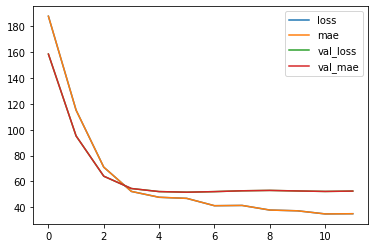

1/1 [==============================] - 0s 276ms/step - loss: 57.3818 - mae: 57.3818
[57.38175964355469, 57.38175964355469]
1/1 [==============================] - 0s 159ms/step
receta 0 kcal_true: 772.5 kcal_pred: 512.5386  precisión: 66.3 %
receta 0 carbohydrate_true: 73.2 carbohydrate_pred: 58.32084  precisión: 79.7 %
receta 0 protein_true: 34.6 protein_pred: 25.425425  precisión: 73.5 %
receta 0 total_fat_true: 36.22 total_fat_pred: 14.183799  precisión: 39.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 555.5 kcal_pred: 610.2069  precisión: 91.0 %
receta 1 carbohydrate_true: 122.7 carbohydrate_pred: 103.75901  precisión: 84.6 %
receta 1 protein_true: 13.26 protein_pred: 19.364231  precisión: 68.5 %
receta 1 total_fat_true: 5.09 total_fat_pred: 7.356994  precisión: 69.2 %
---------------------------------------------------------------------------
receta 2 kcal_true: 794.5 kcal_pred: 649.28796  precisión: 81.7 %
receta 2 carbohydrate

100%|██████████| 100/100 [00:20<00:00,  4.87it/s]


Epoch 375/386
10/10 [==============================] - 2s 183ms/step - loss: 113.0611 - mae: 113.0611 - val_loss: 114.5878 - val_mae: 114.5878
Epoch 376/386
10/10 [==============================] - 2s 161ms/step - loss: 87.2701 - mae: 87.2701 - val_loss: 84.2608 - val_mae: 84.2608
Epoch 377/386
10/10 [==============================] - 2s 191ms/step - loss: 68.3271 - mae: 68.3271 - val_loss: 62.1309 - val_mae: 62.1309
Epoch 378/386
10/10 [==============================] - 2s 188ms/step - loss: 70.3305 - mae: 70.3305 - val_loss: 58.9368 - val_mae: 58.9368
Epoch 379/386
10/10 [==============================] - 2s 191ms/step - loss: 62.5629 - mae: 62.5629 - val_loss: 65.8905 - val_mae: 65.8905
Epoch 380/386
10/10 [==============================] - 2s 191ms/step - loss: 58.4313 - mae: 58.4313 - val_loss: 67.8659 - val_mae: 67.8659
Epoch 381/386
10/10 [==============================] - 2s 201ms/step - loss: 53.4748 - mae: 53.4748 - val_loss: 63.7498 - val_mae: 63.7498
Epoch 382/386
10/10 [==

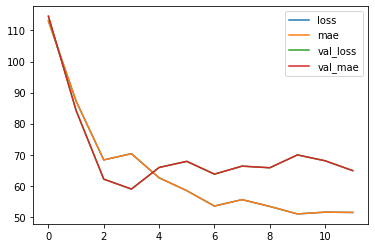

1/1 [==============================] - 0s 205ms/step - loss: 39.7200 - mae: 39.7200
[39.71997833251953, 39.71997833251953]
1/1 [==============================] - 0s 152ms/step
receta 0 kcal_true: 843.5 kcal_pred: 934.3389  precisión: 90.3 %
receta 0 carbohydrate_true: 0.22 carbohydrate_pred: 95.84276  precisión: 0.2 %
receta 0 protein_true: 131.2 protein_pred: 48.72876  precisión: 37.1 %
receta 0 total_fat_true: 31.6 total_fat_pred: 29.531569  precisión: 93.5 %
---------------------------------------------------------------------------
receta 1 kcal_true: 942.5 kcal_pred: 810.4005  precisión: 86.0 %
receta 1 carbohydrate_true: 96.1 carbohydrate_pred: 104.426575  precisión: 92.1 %
receta 1 protein_true: 48.16 protein_pred: 33.120346  precisión: 68.8 %
receta 1 total_fat_true: 6.1 total_fat_pred: 22.548365  precisión: 27.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 960.5 kcal_pred: 984.49023  precisión: 97.6 %
receta 2 carbohydrate_t

100%|██████████| 100/100 [00:20<00:00,  4.95it/s]


Epoch 386/397
10/10 [==============================] - 2s 176ms/step - loss: 169.3012 - mae: 169.3012 - val_loss: 135.9775 - val_mae: 135.9775
Epoch 387/397
10/10 [==============================] - 2s 160ms/step - loss: 110.3899 - mae: 110.3899 - val_loss: 83.3066 - val_mae: 83.3066
Epoch 388/397
10/10 [==============================] - 2s 186ms/step - loss: 92.3677 - mae: 92.3677 - val_loss: 83.3979 - val_mae: 83.3979
Epoch 389/397
10/10 [==============================] - 2s 187ms/step - loss: 97.4421 - mae: 97.4421 - val_loss: 83.6042 - val_mae: 83.6042
Epoch 390/397
10/10 [==============================] - 2s 186ms/step - loss: 84.8818 - mae: 84.8818 - val_loss: 87.7897 - val_mae: 87.7897
Epoch 391/397
10/10 [==============================] - 2s 193ms/step - loss: 80.4652 - mae: 80.4652 - val_loss: 86.8768 - val_mae: 86.8768
Epoch 392/397
10/10 [==============================] - 2s 198ms/step - loss: 75.3560 - mae: 75.3560 - val_loss: 86.8691 - val_mae: 86.8691
Epoch 393/397
10/10 [

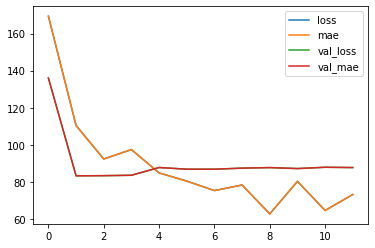

1/1 [==============================] - 0s 375ms/step - loss: 78.5737 - mae: 78.5737
[78.57373046875, 78.57373046875]
1/1 [==============================] - 0s 208ms/step
receta 0 kcal_true: 1519.0 kcal_pred: 1415.1954  precisión: 93.2 %
receta 0 carbohydrate_true: 212.8 carbohydrate_pred: 208.66592  precisión: 98.1 %
receta 0 protein_true: 82.2 protein_pred: 47.87085  precisión: 58.2 %
receta 0 total_fat_true: 42.6 total_fat_pred: 33.481586  precisión: 78.6 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1305.0 kcal_pred: 1121.8109  precisión: 86.0 %
receta 1 carbohydrate_true: 255.8 carbohydrate_pred: 133.95839  precisión: 52.4 %
receta 1 protein_true: 67.75 protein_pred: 55.752724  precisión: 82.3 %
receta 1 total_fat_true: 9.61 total_fat_pred: 32.972065  precisión: 29.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1576.0 kcal_pred: 1703.8004  precisión: 92.5 %
receta 2 carbohydrate

100%|██████████| 100/100 [00:23<00:00,  4.27it/s]


Epoch 397/408
10/10 [==============================] - 2s 173ms/step - loss: 209.4749 - mae: 209.4749 - val_loss: 202.7989 - val_mae: 202.7989
Epoch 398/408
10/10 [==============================] - 2s 169ms/step - loss: 128.8015 - mae: 128.8015 - val_loss: 130.9585 - val_mae: 130.9585
Epoch 399/408
10/10 [==============================] - 2s 187ms/step - loss: 71.6803 - mae: 71.6803 - val_loss: 80.6218 - val_mae: 80.6218
Epoch 400/408
10/10 [==============================] - 2s 191ms/step - loss: 51.2730 - mae: 51.2730 - val_loss: 55.8420 - val_mae: 55.8420
Epoch 401/408
10/10 [==============================] - 2s 193ms/step - loss: 45.2749 - mae: 45.2749 - val_loss: 48.8260 - val_mae: 48.8260
Epoch 402/408
10/10 [==============================] - 2s 186ms/step - loss: 42.9773 - mae: 42.9773 - val_loss: 47.0451 - val_mae: 47.0451
Epoch 403/408
10/10 [==============================] - 2s 192ms/step - loss: 40.0552 - mae: 40.0552 - val_loss: 49.6966 - val_mae: 49.6966
Epoch 404/408
10/10

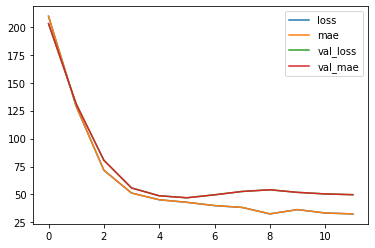

1/1 [==============================] - 0s 318ms/step - loss: 60.0038 - mae: 60.0038
[60.0037956237793, 60.0037956237793]
1/1 [==============================] - 0s 150ms/step
receta 0 kcal_true: 423.2 kcal_pred: 550.0882  precisión: 76.9 %
receta 0 carbohydrate_true: 2.7 carbohydrate_pred: 70.95451  precisión: 3.8 %
receta 0 protein_true: 54.97 protein_pred: 26.191713  precisión: 47.6 %
receta 0 total_fat_true: 19.84 total_fat_pred: 12.060444  precisión: 60.8 %
---------------------------------------------------------------------------
receta 1 kcal_true: 533.5 kcal_pred: 688.81055  precisión: 77.5 %
receta 1 carbohydrate_true: 24.42 carbohydrate_pred: 48.353176  precisión: 50.5 %
receta 1 protein_true: 57.53 protein_pred: 50.64607  precisión: 88.0 %
receta 1 total_fat_true: 21.81 total_fat_pred: 20.514917  precisión: 94.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 488.8 kcal_pred: 696.361  precisión: 70.2 %
receta 2 carbohydrate_tr

100%|██████████| 100/100 [00:20<00:00,  4.95it/s]


Epoch 408/419
10/10 [==============================] - 2s 175ms/step - loss: 114.6782 - mae: 114.6782 - val_loss: 110.9208 - val_mae: 110.9208
Epoch 409/419
10/10 [==============================] - 2s 161ms/step - loss: 96.2841 - mae: 96.2841 - val_loss: 84.1888 - val_mae: 84.1888
Epoch 410/419
10/10 [==============================] - 2s 186ms/step - loss: 70.9378 - mae: 70.9378 - val_loss: 63.0924 - val_mae: 63.0924
Epoch 411/419
10/10 [==============================] - 2s 191ms/step - loss: 61.7052 - mae: 61.7052 - val_loss: 57.0500 - val_mae: 57.0500
Epoch 412/419
10/10 [==============================] - 2s 186ms/step - loss: 63.6958 - mae: 63.6958 - val_loss: 56.3912 - val_mae: 56.3912
Epoch 413/419
10/10 [==============================] - 2s 190ms/step - loss: 55.4859 - mae: 55.4859 - val_loss: 58.6682 - val_mae: 58.6682
Epoch 414/419
10/10 [==============================] - 2s 193ms/step - loss: 54.1707 - mae: 54.1707 - val_loss: 60.8858 - val_mae: 60.8858
Epoch 415/419
10/10 [==

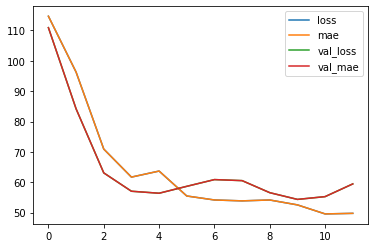

1/1 [==============================] - 0s 280ms/step - loss: 47.2795 - mae: 47.2795
[47.27946090698242, 47.27946090698242]
1/1 [==============================] - 0s 159ms/step
receta 0 kcal_true: 867.0 kcal_pred: 1042.2885  precisión: 83.2 %
receta 0 carbohydrate_true: 145.8 carbohydrate_pred: 93.61158  precisión: 64.2 %
receta 0 protein_true: 62.5 protein_pred: 54.62133  precisión: 87.4 %
receta 0 total_fat_true: 14.4 total_fat_pred: 32.601562  precisión: 44.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 883.5 kcal_pred: 853.027  precisión: 96.6 %
receta 1 carbohydrate_true: 115.9 carbohydrate_pred: 110.21309  precisión: 95.1 %
receta 1 protein_true: 26.44 protein_pred: 29.505674  precisión: 89.6 %
receta 1 total_fat_true: 39.06 total_fat_pred: 22.853382  precisión: 58.5 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1095.0 kcal_pred: 902.51843  precisión: 82.4 %
receta 2 carbohydra

100%|██████████| 100/100 [00:20<00:00,  4.93it/s]


Epoch 419/430
10/10 [==============================] - 2s 180ms/step - loss: 160.9879 - mae: 160.9879 - val_loss: 123.3639 - val_mae: 123.3639
Epoch 420/430
10/10 [==============================] - 2s 153ms/step - loss: 120.6496 - mae: 120.6496 - val_loss: 71.4876 - val_mae: 71.4876
Epoch 421/430
10/10 [==============================] - 2s 189ms/step - loss: 80.9644 - mae: 80.9644 - val_loss: 72.7376 - val_mae: 72.7376
Epoch 422/430
10/10 [==============================] - 2s 193ms/step - loss: 99.5078 - mae: 99.5078 - val_loss: 70.1092 - val_mae: 70.1092
Epoch 423/430
10/10 [==============================] - 2s 187ms/step - loss: 77.4122 - mae: 77.4122 - val_loss: 65.9158 - val_mae: 65.9158
Epoch 424/430
10/10 [==============================] - 2s 203ms/step - loss: 73.7278 - mae: 73.7278 - val_loss: 65.9631 - val_mae: 65.9631
Epoch 425/430
10/10 [==============================] - 2s 192ms/step - loss: 71.5028 - mae: 71.5028 - val_loss: 65.1517 - val_mae: 65.1517
Epoch 426/430
10/10 [

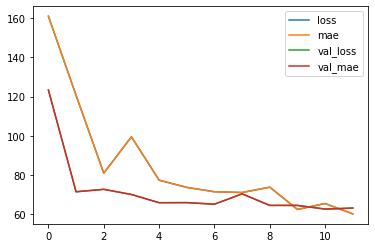

1/1 [==============================] - 0s 222ms/step - loss: 61.6815 - mae: 61.6815
[61.68150329589844, 61.68150329589844]
1/1 [==============================] - 0s 149ms/step
receta 0 kcal_true: 1554.0 kcal_pred: 1565.3682  precisión: 99.3 %
receta 0 carbohydrate_true: 344.8 carbohydrate_pred: 218.01483  precisión: 63.2 %
receta 0 protein_true: 40.47 protein_pred: 54.677074  precisión: 74.0 %
receta 0 total_fat_true: 12.49 total_fat_pred: 42.927376  precisión: 29.1 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1654.0 kcal_pred: 1354.5123  precisión: 81.9 %
receta 1 carbohydrate_true: 130.0 carbohydrate_pred: 64.9915  precisión: 50.0 %
receta 1 protein_true: 183.5 protein_pred: 99.19704  precisión: 54.1 %
receta 1 total_fat_true: 40.7 total_fat_pred: 58.379887  precisión: 69.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1332.0 kcal_pred: 1199.1405  precisión: 90.0 %
receta 2 carboh

100%|██████████| 100/100 [00:20<00:00,  4.95it/s]


Epoch 430/441
10/10 [==============================] - 2s 177ms/step - loss: 191.2173 - mae: 191.2173 - val_loss: 151.6964 - val_mae: 151.6964
Epoch 431/441
10/10 [==============================] - 2s 168ms/step - loss: 110.6631 - mae: 110.6631 - val_loss: 91.5705 - val_mae: 91.5705
Epoch 432/441
10/10 [==============================] - 2s 188ms/step - loss: 70.1523 - mae: 70.1523 - val_loss: 60.6273 - val_mae: 60.6273
Epoch 433/441
10/10 [==============================] - 2s 192ms/step - loss: 48.6507 - mae: 48.6507 - val_loss: 55.1926 - val_mae: 55.1926
Epoch 434/441
10/10 [==============================] - 2s 194ms/step - loss: 44.8684 - mae: 44.8684 - val_loss: 54.2046 - val_mae: 54.2046
Epoch 435/441
10/10 [==============================] - 2s 187ms/step - loss: 38.6625 - mae: 38.6625 - val_loss: 53.6605 - val_mae: 53.6605
Epoch 436/441
10/10 [==============================] - 2s 205ms/step - loss: 37.7917 - mae: 37.7917 - val_loss: 54.2576 - val_mae: 54.2576
Epoch 437/441
10/10 [

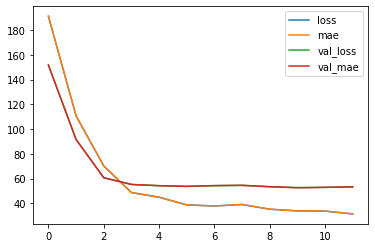

1/1 [==============================] - 0s 214ms/step - loss: 38.9261 - mae: 38.9261
[38.926116943359375, 38.926116943359375]
1/1 [==============================] - 0s 150ms/step
receta 0 kcal_true: 549.0 kcal_pred: 566.864  precisión: 96.8 %
receta 0 carbohydrate_true: 18.48 carbohydrate_pred: 93.57818  precisión: 19.8 %
receta 0 protein_true: 23.92 protein_pred: 16.385542  precisión: 68.5 %
receta 0 total_fat_true: 41.7 total_fat_pred: 7.5297465  precisión: 18.1 %
---------------------------------------------------------------------------
receta 1 kcal_true: 483.2 kcal_pred: 642.8992  precisión: 75.2 %
receta 1 carbohydrate_true: 75.94 carbohydrate_pred: 102.36645  precisión: 74.2 %
receta 1 protein_true: 29.66 protein_pred: 19.762423  precisión: 66.6 %
receta 1 total_fat_true: 5.8 total_fat_pred: 10.572335  precisión: 54.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 651.5 kcal_pred: 531.6365  precisión: 81.6 %
receta 2 carbohydrat

100%|██████████| 100/100 [00:20<00:00,  4.91it/s]


Epoch 441/452
10/10 [==============================] - 2s 174ms/step - loss: 127.7818 - mae: 127.7818 - val_loss: 92.7323 - val_mae: 92.7323
Epoch 442/452
10/10 [==============================] - 2s 156ms/step - loss: 102.9606 - mae: 102.9606 - val_loss: 69.2254 - val_mae: 69.2254
Epoch 443/452
10/10 [==============================] - 2s 202ms/step - loss: 71.7479 - mae: 71.7479 - val_loss: 64.7836 - val_mae: 64.7836
Epoch 444/452
10/10 [==============================] - 2s 189ms/step - loss: 67.1922 - mae: 67.1922 - val_loss: 68.3029 - val_mae: 68.3029
Epoch 445/452
10/10 [==============================] - 2s 191ms/step - loss: 54.6378 - mae: 54.6378 - val_loss: 65.0891 - val_mae: 65.0891
Epoch 446/452
10/10 [==============================] - 2s 192ms/step - loss: 51.9833 - mae: 51.9833 - val_loss: 63.9269 - val_mae: 63.9269
Epoch 447/452
10/10 [==============================] - 2s 188ms/step - loss: 50.7660 - mae: 50.7660 - val_loss: 64.5038 - val_mae: 64.5038
Epoch 448/452
10/10 [==

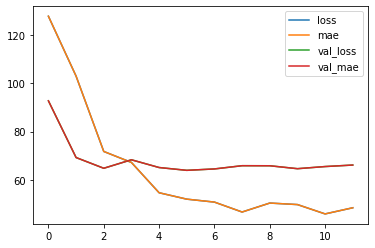

1/1 [==============================] - 0s 311ms/step - loss: 45.0456 - mae: 45.0456
[45.04564666748047, 45.04564666748047]
1/1 [==============================] - 0s 157ms/step
receta 0 kcal_true: 1038.0 kcal_pred: 1007.8545  precisión: 97.1 %
receta 0 carbohydrate_true: 222.2 carbohydrate_pred: 138.44395  precisión: 62.3 %
receta 0 protein_true: 38.84 protein_pred: 41.078846  precisión: 94.6 %
receta 0 total_fat_true: 11.03 total_fat_pred: 22.577826  precisión: 48.9 %
---------------------------------------------------------------------------
receta 1 kcal_true: 982.0 kcal_pred: 1030.0161  precisión: 95.3 %
receta 1 carbohydrate_true: 109.0 carbohydrate_pred: 155.06653  precisión: 70.3 %
receta 1 protein_true: 59.16 protein_pred: 37.20506  precisión: 62.9 %
receta 1 total_fat_true: 36.4 total_fat_pred: 18.233212  precisión: 50.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 822.5 kcal_pred: 1093.1705  precisión: 75.2 %
receta 2 carboh

100%|██████████| 100/100 [00:20<00:00,  4.94it/s]


Epoch 452/463
10/10 [==============================] - 2s 176ms/step - loss: 146.2908 - mae: 146.2908 - val_loss: 139.9988 - val_mae: 139.9988
Epoch 453/463
10/10 [==============================] - 2s 168ms/step - loss: 102.4135 - mae: 102.4135 - val_loss: 90.5160 - val_mae: 90.5160
Epoch 454/463
10/10 [==============================] - 2s 188ms/step - loss: 79.0789 - mae: 79.0789 - val_loss: 69.6750 - val_mae: 69.6750
Epoch 455/463
10/10 [==============================] - 2s 195ms/step - loss: 77.9684 - mae: 77.9684 - val_loss: 72.5995 - val_mae: 72.5995
Epoch 456/463
10/10 [==============================] - 2s 187ms/step - loss: 76.8913 - mae: 76.8913 - val_loss: 77.7316 - val_mae: 77.7316
Epoch 457/463
10/10 [==============================] - 2s 190ms/step - loss: 73.6204 - mae: 73.6204 - val_loss: 85.6919 - val_mae: 85.6919
Epoch 458/463
10/10 [==============================] - 2s 203ms/step - loss: 76.9293 - mae: 76.9293 - val_loss: 87.5326 - val_mae: 87.5326
Epoch 459/463
10/10 [

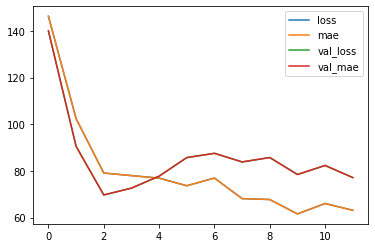

1/1 [==============================] - 0s 271ms/step - loss: 45.1317 - mae: 45.1317
[45.13172912597656, 45.13172912597656]
1/1 [==============================] - 0s 192ms/step
receta 0 kcal_true: 1488.0 kcal_pred: 1522.3451  precisión: 97.7 %
receta 0 carbohydrate_true: 177.1 carbohydrate_pred: 109.6237  precisión: 61.9 %
receta 0 protein_true: 77.3 protein_pred: 94.64169  precisión: 81.7 %
receta 0 total_fat_true: 53.22 total_fat_pred: 69.114395  precisión: 77.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1202.0 kcal_pred: 1404.8235  precisión: 85.6 %
receta 1 carbohydrate_true: 150.4 carbohydrate_pred: 149.9198  precisión: 99.7 %
receta 1 protein_true: 65.0 protein_pred: 66.15676  precisión: 98.3 %
receta 1 total_fat_true: 39.06 total_fat_pred: 55.059715  precisión: 70.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1514.0 kcal_pred: 1485.5424  precisión: 98.1 %
receta 2 carbohyd

100%|██████████| 100/100 [00:20<00:00,  4.92it/s]


Epoch 463/474
10/10 [==============================] - 2s 173ms/step - loss: 203.2814 - mae: 203.2814 - val_loss: 166.0848 - val_mae: 166.0848
Epoch 464/474
10/10 [==============================] - 2s 170ms/step - loss: 129.9314 - mae: 129.9314 - val_loss: 100.2241 - val_mae: 100.2241
Epoch 465/474
10/10 [==============================] - 2s 191ms/step - loss: 75.7812 - mae: 75.7812 - val_loss: 61.4468 - val_mae: 61.4468
Epoch 466/474
10/10 [==============================] - 2s 188ms/step - loss: 53.9126 - mae: 53.9126 - val_loss: 52.4162 - val_mae: 52.4162
Epoch 467/474
10/10 [==============================] - 2s 193ms/step - loss: 44.7693 - mae: 44.7693 - val_loss: 52.6859 - val_mae: 52.6859
Epoch 468/474
10/10 [==============================] - 2s 185ms/step - loss: 38.5619 - mae: 38.5619 - val_loss: 52.8136 - val_mae: 52.8136
Epoch 469/474
10/10 [==============================] - 2s 190ms/step - loss: 39.0578 - mae: 39.0578 - val_loss: 53.1184 - val_mae: 53.1184
Epoch 470/474
10/10

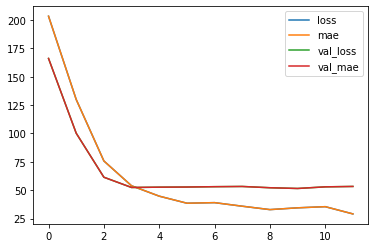

1/1 [==============================] - 0s 215ms/step - loss: 48.2749 - mae: 48.2749
[48.27490234375, 48.27490234375]
1/1 [==============================] - 0s 145ms/step
receta 0 kcal_true: 427.5 kcal_pred: 435.0238  precisión: 98.3 %
receta 0 carbohydrate_true: 87.8 carbohydrate_pred: 64.96826  precisión: 74.0 %
receta 0 protein_true: 10.78 protein_pred: 15.105785  precisión: 71.4 %
receta 0 total_fat_true: 4.17 total_fat_pred: 8.968097  precisión: 46.5 %
---------------------------------------------------------------------------
receta 1 kcal_true: 782.5 kcal_pred: 487.74536  precisión: 62.3 %
receta 1 carbohydrate_true: 65.8 carbohydrate_pred: 80.29869  precisión: 82.0 %
receta 1 protein_true: 52.84 protein_pred: 15.599644  precisión: 29.5 %
receta 1 total_fat_true: 37.38 total_fat_pred: 8.321989  precisión: 22.3 %
---------------------------------------------------------------------------
receta 2 kcal_true: 422.5 kcal_pred: 564.14655  precisión: 74.9 %
receta 2 carbohydrate_true: 

100%|██████████| 100/100 [00:20<00:00,  4.98it/s]


Epoch 474/485
10/10 [==============================] - 3s 187ms/step - loss: 132.8620 - mae: 132.8620 - val_loss: 117.0920 - val_mae: 117.0920
Epoch 475/485
10/10 [==============================] - 2s 159ms/step - loss: 105.6988 - mae: 105.6988 - val_loss: 82.5412 - val_mae: 82.5412
Epoch 476/485
10/10 [==============================] - 2s 193ms/step - loss: 74.1427 - mae: 74.1427 - val_loss: 63.1832 - val_mae: 63.1832
Epoch 477/485
10/10 [==============================] - 2s 187ms/step - loss: 68.8430 - mae: 68.8430 - val_loss: 60.3816 - val_mae: 60.3816
Epoch 478/485
10/10 [==============================] - 2s 190ms/step - loss: 65.3151 - mae: 65.3151 - val_loss: 62.7790 - val_mae: 62.7790
Epoch 479/485
10/10 [==============================] - 2s 202ms/step - loss: 62.0294 - mae: 62.0294 - val_loss: 63.2519 - val_mae: 63.2519
Epoch 480/485
10/10 [==============================] - 2s 189ms/step - loss: 57.7766 - mae: 57.7766 - val_loss: 61.7326 - val_mae: 61.7326
Epoch 481/485
10/10 [

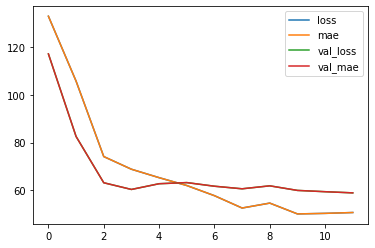

1/1 [==============================] - 0s 284ms/step - loss: 73.0753 - mae: 73.0753
[73.0752944946289, 73.0752944946289]
1/1 [==============================] - 0s 196ms/step
receta 0 kcal_true: 924.5 kcal_pred: 925.547  precisión: 99.9 %
receta 0 carbohydrate_true: 46.88 carbohydrate_pred: 49.80871  precisión: 94.1 %
receta 0 protein_true: 54.22 protein_pred: 69.3372  precisión: 78.2 %
receta 0 total_fat_true: 58.88 total_fat_pred: 41.5428  precisión: 70.6 %
---------------------------------------------------------------------------
receta 1 kcal_true: 955.5 kcal_pred: 739.9062  precisión: 77.4 %
receta 1 carbohydrate_true: 1.78 carbohydrate_pred: 71.97355  precisión: 2.5 %
receta 1 protein_true: 0.56 protein_pred: 39.622223  precisión: 1.4 %
receta 1 total_fat_true: 0.97 total_fat_pred: 27.38306  precisión: 3.5 %
---------------------------------------------------------------------------
receta 2 kcal_true: 840.0 kcal_pred: 821.83514  precisión: 97.8 %
receta 2 carbohydrate_true: 82.5

100%|██████████| 100/100 [00:20<00:00,  4.91it/s]


Epoch 485/496
10/10 [==============================] - 2s 173ms/step - loss: 166.4251 - mae: 166.4251 - val_loss: 151.0819 - val_mae: 151.0819
Epoch 486/496
10/10 [==============================] - 2s 163ms/step - loss: 122.1543 - mae: 122.1543 - val_loss: 104.2679 - val_mae: 104.2679
Epoch 487/496
10/10 [==============================] - 2s 186ms/step - loss: 97.0039 - mae: 97.0039 - val_loss: 90.4645 - val_mae: 90.4645
Epoch 488/496
10/10 [==============================] - 2s 188ms/step - loss: 89.1119 - mae: 89.1119 - val_loss: 89.9185 - val_mae: 89.9185
Epoch 489/496
10/10 [==============================] - 2s 193ms/step - loss: 84.0316 - mae: 84.0316 - val_loss: 94.2867 - val_mae: 94.2867
Epoch 490/496
10/10 [==============================] - 2s 185ms/step - loss: 76.3158 - mae: 76.3158 - val_loss: 91.9181 - val_mae: 91.9181
Epoch 491/496
10/10 [==============================] - 2s 191ms/step - loss: 71.4866 - mae: 71.4866 - val_loss: 93.2454 - val_mae: 93.2454
Epoch 492/496
10/10

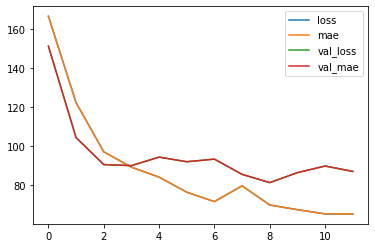

1/1 [==============================] - 0s 230ms/step - loss: 73.7134 - mae: 73.7134
[73.71336364746094, 73.71336364746094]
1/1 [==============================] - 0s 145ms/step
receta 0 kcal_true: 1410.0 kcal_pred: 1355.2092  precisión: 96.1 %
receta 0 carbohydrate_true: 3.84 carbohydrate_pred: 172.18285  precisión: 2.2 %
receta 0 protein_true: 211.5 protein_pred: 67.74435  precisión: 32.0 %
receta 0 total_fat_true: 61.47 total_fat_pred: 32.754826  precisión: 53.3 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1599.0 kcal_pred: 1486.9769  precisión: 93.0 %
receta 1 carbohydrate_true: 38.62 carbohydrate_pred: 67.71631  precisión: 57.0 %
receta 1 protein_true: 256.0 protein_pred: 121.22218  precisión: 47.4 %
receta 1 total_fat_true: 41.44 total_fat_pred: 62.48576  precisión: 66.3 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1266.0 kcal_pred: 1393.5276  precisión: 90.8 %
receta 2 carbohy

100%|██████████| 100/100 [00:20<00:00,  4.91it/s]


Epoch 496/507
10/10 [==============================] - 2s 173ms/step - loss: 195.4019 - mae: 195.4019 - val_loss: 177.9256 - val_mae: 177.9256
Epoch 497/507
10/10 [==============================] - 2s 161ms/step - loss: 133.9146 - mae: 133.9146 - val_loss: 108.8021 - val_mae: 108.8021
Epoch 498/507
10/10 [==============================] - 2s 188ms/step - loss: 80.5153 - mae: 80.5153 - val_loss: 63.5434 - val_mae: 63.5434
Epoch 499/507
10/10 [==============================] - 2s 202ms/step - loss: 49.3076 - mae: 49.3076 - val_loss: 46.7691 - val_mae: 46.7691
Epoch 500/507
10/10 [==============================] - 2s 192ms/step - loss: 42.2658 - mae: 42.2658 - val_loss: 42.6889 - val_mae: 42.6889
Epoch 501/507
10/10 [==============================] - 2s 187ms/step - loss: 37.4462 - mae: 37.4462 - val_loss: 42.3045 - val_mae: 42.3045
Epoch 502/507
10/10 [==============================] - 2s 189ms/step - loss: 35.0696 - mae: 35.0696 - val_loss: 42.5543 - val_mae: 42.5543
Epoch 503/507
10/10

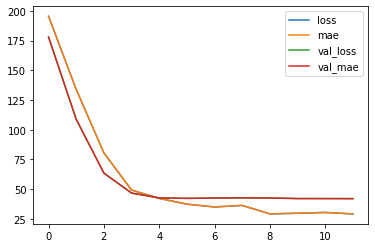

1/1 [==============================] - 0s 232ms/step - loss: 65.8334 - mae: 65.8334
[65.83341979980469, 65.83341979980469]
1/1 [==============================] - 0s 151ms/step
receta 0 kcal_true: 429.8 kcal_pred: 639.85803  precisión: 67.2 %
receta 0 carbohydrate_true: 33.44 carbohydrate_pred: 74.25802  precisión: 45.0 %
receta 0 protein_true: 24.94 protein_pred: 29.190735  precisión: 85.4 %
receta 0 total_fat_true: 21.4 total_fat_pred: 13.980874  precisión: 65.3 %
---------------------------------------------------------------------------
receta 1 kcal_true: 399.2 kcal_pred: 595.308  precisión: 67.1 %
receta 1 carbohydrate_true: 1.44 carbohydrate_pred: 57.18762  precisión: 2.5 %
receta 1 protein_true: 98.8 protein_pred: 28.18023  precisión: 28.5 %
receta 1 total_fat_true: 0.86 total_fat_pred: 16.244106  precisión: 5.3 %
---------------------------------------------------------------------------
receta 2 kcal_true: 336.8 kcal_pred: 535.4663  precisión: 62.9 %
receta 2 carbohydrate_true

100%|██████████| 100/100 [00:20<00:00,  4.89it/s]


Epoch 507/518
10/10 [==============================] - 2s 171ms/step - loss: 127.5010 - mae: 127.5010 - val_loss: 121.7234 - val_mae: 121.7234
Epoch 508/518
10/10 [==============================] - 2s 175ms/step - loss: 99.5166 - mae: 99.5166 - val_loss: 92.5814 - val_mae: 92.5814
Epoch 509/518
10/10 [==============================] - 2s 188ms/step - loss: 69.4774 - mae: 69.4774 - val_loss: 62.1689 - val_mae: 62.1689
Epoch 510/518
10/10 [==============================] - 2s 190ms/step - loss: 63.3041 - mae: 63.3041 - val_loss: 53.5444 - val_mae: 53.5444
Epoch 511/518
10/10 [==============================] - 2s 191ms/step - loss: 62.8384 - mae: 62.8384 - val_loss: 57.1268 - val_mae: 57.1268
Epoch 512/518
10/10 [==============================] - 2s 189ms/step - loss: 56.6496 - mae: 56.6496 - val_loss: 61.6539 - val_mae: 61.6539
Epoch 513/518
10/10 [==============================] - 2s 205ms/step - loss: 48.9362 - mae: 48.9362 - val_loss: 65.0802 - val_mae: 65.0802
Epoch 514/518
10/10 [==

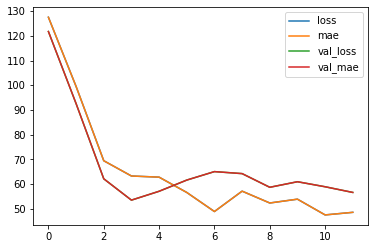

1/1 [==============================] - 0s 294ms/step - loss: 76.3208 - mae: 76.3208
[76.32080078125, 76.32080078125]
1/1 [==============================] - 0s 201ms/step
receta 0 kcal_true: 925.0 kcal_pred: 851.1255  precisión: 92.0 %
receta 0 carbohydrate_true: 19.38 carbohydrate_pred: 37.93426  precisión: 51.1 %
receta 0 protein_true: 52.8 protein_pred: 68.067116  precisión: 77.6 %
receta 0 total_fat_true: 69.9 total_fat_pred: 34.656555  precisión: 49.6 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1029.0 kcal_pred: 796.21295  precisión: 77.4 %
receta 1 carbohydrate_true: 252.0 carbohydrate_pred: 44.993862  precisión: 17.9 %
receta 1 protein_true: 0.58 protein_pred: 53.752644  precisión: 1.1 %
receta 1 total_fat_true: 2.04 total_fat_pred: 30.624487  precisión: 6.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 901.0 kcal_pred: 960.89435  precisión: 93.8 %
receta 2 carbohydrate_true:

100%|██████████| 100/100 [00:20<00:00,  4.95it/s]


Epoch 518/529
10/10 [==============================] - 2s 174ms/step - loss: 170.4948 - mae: 170.4948 - val_loss: 116.6520 - val_mae: 116.6520
Epoch 519/529
10/10 [==============================] - 2s 161ms/step - loss: 113.5768 - mae: 113.5768 - val_loss: 69.2145 - val_mae: 69.2145
Epoch 520/529
10/10 [==============================] - 2s 190ms/step - loss: 89.3246 - mae: 89.3246 - val_loss: 76.4974 - val_mae: 76.4974
Epoch 521/529
10/10 [==============================] - 2s 186ms/step - loss: 89.8831 - mae: 89.8831 - val_loss: 69.4283 - val_mae: 69.4283
Epoch 522/529
10/10 [==============================] - 2s 191ms/step - loss: 80.0803 - mae: 80.0803 - val_loss: 70.2610 - val_mae: 70.2610
Epoch 523/529
10/10 [==============================] - 2s 186ms/step - loss: 72.9338 - mae: 72.9338 - val_loss: 70.1309 - val_mae: 70.1309
Epoch 524/529
10/10 [==============================] - 2s 200ms/step - loss: 75.8139 - mae: 75.8139 - val_loss: 71.1788 - val_mae: 71.1788
Epoch 525/529
10/10 [

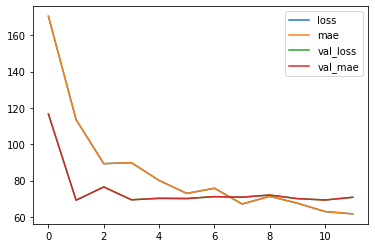

1/1 [==============================] - 0s 296ms/step - loss: 97.4298 - mae: 97.4298
[97.42981719970703, 97.42981719970703]
1/1 [==============================] - 0s 184ms/step
receta 0 kcal_true: 1425.0 kcal_pred: 1678.2169  precisión: 84.9 %
receta 0 carbohydrate_true: 153.9 carbohydrate_pred: 127.36045  precisión: 82.8 %
receta 0 protein_true: 84.75 protein_pred: 108.94674  precisión: 77.8 %
receta 0 total_fat_true: 54.12 total_fat_pred: 71.05572  precisión: 76.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1302.0 kcal_pred: 1058.7466  precisión: 81.3 %
receta 1 carbohydrate_true: 3.34 carbohydrate_pred: 132.60031  precisión: 2.5 %
receta 1 protein_true: 0.79 protein_pred: 55.156338  precisión: 1.4 %
receta 1 total_fat_true: 143.2 total_fat_pred: 32.813873  precisión: 22.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1607.0 kcal_pred: 1332.997  precisión: 82.9 %
receta 2 carbohyd

100%|██████████| 100/100 [00:20<00:00,  4.96it/s]


Epoch 529/540
10/10 [==============================] - 2s 176ms/step - loss: 220.0981 - mae: 220.0981 - val_loss: 175.8973 - val_mae: 175.8973
Epoch 530/540
10/10 [==============================] - 2s 153ms/step - loss: 130.0007 - mae: 130.0007 - val_loss: 93.9411 - val_mae: 93.9411
Epoch 531/540
10/10 [==============================] - 2s 191ms/step - loss: 69.8613 - mae: 69.8613 - val_loss: 62.9710 - val_mae: 62.9710
Epoch 532/540
10/10 [==============================] - 2s 193ms/step - loss: 47.7077 - mae: 47.7077 - val_loss: 59.0366 - val_mae: 59.0366
Epoch 533/540
10/10 [==============================] - 2s 186ms/step - loss: 46.5498 - mae: 46.5498 - val_loss: 59.3416 - val_mae: 59.3416
Epoch 534/540
10/10 [==============================] - 2s 191ms/step - loss: 42.7018 - mae: 42.7018 - val_loss: 59.7637 - val_mae: 59.7637
Epoch 535/540
10/10 [==============================] - 2s 196ms/step - loss: 42.1340 - mae: 42.1340 - val_loss: 59.9682 - val_mae: 59.9682
Epoch 536/540
10/10 [

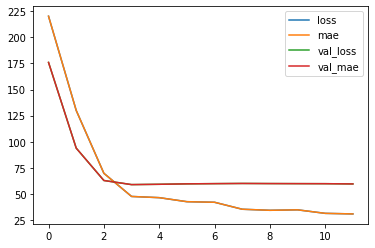

1/1 [==============================] - 0s 214ms/step - loss: 69.0675 - mae: 69.0675
[69.06749725341797, 69.06749725341797]
1/1 [==============================] - 0s 148ms/step
receta 0 kcal_true: 641.0 kcal_pred: 417.8033  precisión: 65.2 %
receta 0 carbohydrate_true: 13.38 carbohydrate_pred: 39.265182  precisión: 34.1 %
receta 0 protein_true: 5.01 protein_pred: 25.044533  precisión: 20.0 %
receta 0 total_fat_true: 64.3 total_fat_pred: 10.966811  precisión: 17.1 %
---------------------------------------------------------------------------
receta 1 kcal_true: 360.8 kcal_pred: 514.62665  precisión: 70.1 %
receta 1 carbohydrate_true: 81.75 carbohydrate_pred: 44.20687  precisión: 54.1 %
receta 1 protein_true: 8.49 protein_pred: 30.804195  precisión: 27.6 %
receta 1 total_fat_true: 1.22 total_fat_pred: 13.932006  precisión: 8.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 338.5 kcal_pred: 607.86304  precisión: 55.7 %
receta 2 carbohydrate

100%|██████████| 100/100 [00:20<00:00,  4.97it/s]


Epoch 540/551
10/10 [==============================] - 2s 183ms/step - loss: 129.7013 - mae: 129.7013 - val_loss: 86.1946 - val_mae: 86.1946
Epoch 541/551
10/10 [==============================] - 2s 155ms/step - loss: 103.6794 - mae: 103.6794 - val_loss: 57.7327 - val_mae: 57.7327
Epoch 542/551
10/10 [==============================] - 2s 189ms/step - loss: 74.1889 - mae: 74.1889 - val_loss: 43.4832 - val_mae: 43.4832
Epoch 543/551
10/10 [==============================] - 2s 187ms/step - loss: 62.9247 - mae: 62.9247 - val_loss: 53.8281 - val_mae: 53.8281
Epoch 544/551
10/10 [==============================] - 2s 192ms/step - loss: 61.9225 - mae: 61.9225 - val_loss: 51.5071 - val_mae: 51.5071
Epoch 545/551
10/10 [==============================] - 2s 187ms/step - loss: 52.4638 - mae: 52.4638 - val_loss: 43.8521 - val_mae: 43.8521
Epoch 546/551
10/10 [==============================] - 2s 200ms/step - loss: 52.5142 - mae: 52.5142 - val_loss: 44.9382 - val_mae: 44.9382
Epoch 547/551
10/10 [==

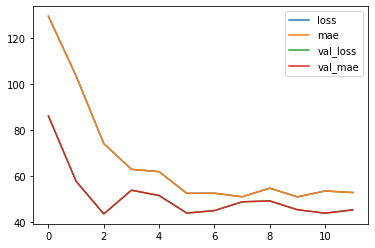

1/1 [==============================] - 0s 227ms/step - loss: 44.6406 - mae: 44.6406
[44.64064025878906, 44.64064025878906]
1/1 [==============================] - 0s 148ms/step
receta 0 kcal_true: 890.0 kcal_pred: 899.3243  precisión: 99.0 %
receta 0 carbohydrate_true: 69.25 carbohydrate_pred: 30.56894  precisión: 44.1 %
receta 0 protein_true: 42.28 protein_pred: 71.8543  precisión: 58.8 %
receta 0 total_fat_true: 50.6 total_fat_pred: 42.981617  precisión: 85.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 830.0 kcal_pred: 879.35693  precisión: 94.4 %
receta 1 carbohydrate_true: 149.0 carbohydrate_pred: 62.475544  precisión: 41.9 %
receta 1 protein_true: 29.7 protein_pred: 51.952988  precisión: 57.2 %
receta 1 total_fat_true: 15.89 total_fat_pred: 35.748955  precisión: 44.5 %
---------------------------------------------------------------------------
receta 2 kcal_true: 850.0 kcal_pred: 1031.1683  precisión: 82.4 %
receta 2 carbohydrat

100%|██████████| 100/100 [00:20<00:00,  4.95it/s]


Epoch 551/562
10/10 [==============================] - 2s 175ms/step - loss: 145.4194 - mae: 145.4194 - val_loss: 128.7079 - val_mae: 128.7079
Epoch 552/562
10/10 [==============================] - 2s 165ms/step - loss: 102.9077 - mae: 102.9077 - val_loss: 81.8272 - val_mae: 81.8272
Epoch 553/562
10/10 [==============================] - 2s 194ms/step - loss: 84.2761 - mae: 84.2761 - val_loss: 72.8496 - val_mae: 72.8496
Epoch 554/562
10/10 [==============================] - 2s 195ms/step - loss: 84.3171 - mae: 84.3171 - val_loss: 71.2315 - val_mae: 71.2315
Epoch 555/562
10/10 [==============================] - 2s 205ms/step - loss: 79.5170 - mae: 79.5170 - val_loss: 75.8046 - val_mae: 75.8046
Epoch 556/562
10/10 [==============================] - 2s 200ms/step - loss: 65.1199 - mae: 65.1199 - val_loss: 77.9081 - val_mae: 77.9081
Epoch 557/562
10/10 [==============================] - 2s 203ms/step - loss: 68.5764 - mae: 68.5764 - val_loss: 81.3735 - val_mae: 81.3735
Epoch 558/562
10/10 [

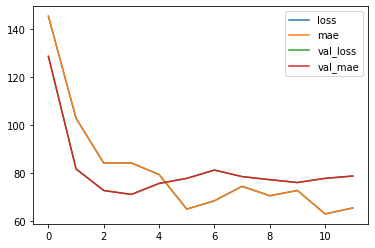

1/1 [==============================] - 0s 228ms/step - loss: 107.7324 - mae: 107.7324
[107.7323989868164, 107.7323989868164]
1/1 [==============================] - 0s 156ms/step
receta 0 kcal_true: 1667.0 kcal_pred: 1220.8235  precisión: 73.2 %
receta 0 carbohydrate_true: 261.8 carbohydrate_pred: 103.77781  precisión: 39.6 %
receta 0 protein_true: 113.56 protein_pred: 74.38483  precisión: 65.5 %
receta 0 total_fat_true: 20.28 total_fat_pred: 51.79347  precisión: 39.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1332.0 kcal_pred: 1478.8662  precisión: 90.1 %
receta 1 carbohydrate_true: 250.8 carbohydrate_pred: 138.0865  precisión: 55.1 %
receta 1 protein_true: 46.97 protein_pred: 80.44959  precisión: 58.4 %
receta 1 total_fat_true: 24.1 total_fat_pred: 60.435406  precisión: 39.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1420.0 kcal_pred: 1356.5662  precisión: 95.5 %
receta 2 carb

100%|██████████| 100/100 [00:20<00:00,  4.96it/s]


Epoch 562/573
10/10 [==============================] - 2s 176ms/step - loss: 183.3542 - mae: 183.3542 - val_loss: 159.9402 - val_mae: 159.9402
Epoch 563/573
10/10 [==============================] - 2s 157ms/step - loss: 118.7031 - mae: 118.7031 - val_loss: 98.1287 - val_mae: 98.1287
Epoch 564/573
10/10 [==============================] - 2s 200ms/step - loss: 74.3531 - mae: 74.3531 - val_loss: 64.5406 - val_mae: 64.5406
Epoch 565/573
10/10 [==============================] - 2s 189ms/step - loss: 58.5746 - mae: 58.5746 - val_loss: 53.4318 - val_mae: 53.4318
Epoch 566/573
10/10 [==============================] - 2s 193ms/step - loss: 49.9506 - mae: 49.9506 - val_loss: 50.9318 - val_mae: 50.9318
Epoch 567/573
10/10 [==============================] - 2s 193ms/step - loss: 41.5375 - mae: 41.5375 - val_loss: 51.7738 - val_mae: 51.7738
Epoch 568/573
10/10 [==============================] - 2s 193ms/step - loss: 40.9992 - mae: 40.9992 - val_loss: 52.0466 - val_mae: 52.0466
Epoch 569/573
10/10 [

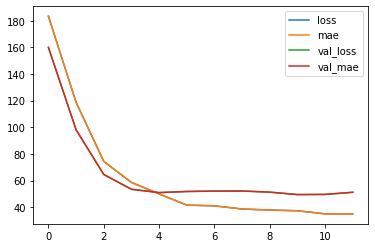

1/1 [==============================] - 0s 280ms/step - loss: 35.2571 - mae: 35.2571
[35.25714111328125, 35.25714111328125]
1/1 [==============================] - 0s 176ms/step
receta 0 kcal_true: 678.5 kcal_pred: 675.50323  precisión: 99.6 %
receta 0 carbohydrate_true: 66.75 carbohydrate_pred: 43.63694  precisión: 65.4 %
receta 0 protein_true: 39.5 protein_pred: 44.001717  precisión: 89.8 %
receta 0 total_fat_true: 28.69 total_fat_pred: 23.219845  precisión: 80.9 %
---------------------------------------------------------------------------
receta 1 kcal_true: 560.0 kcal_pred: 535.45746  precisión: 95.6 %
receta 1 carbohydrate_true: 26.5 carbohydrate_pred: 62.751015  precisión: 42.2 %
receta 1 protein_true: 63.75 protein_pred: 23.907074  precisión: 37.5 %
receta 1 total_fat_true: 22.44 total_fat_pred: 12.519322  precisión: 55.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 324.0 kcal_pred: 528.9695  precisión: 61.3 %
receta 2 carbohydr

100%|██████████| 100/100 [00:20<00:00,  4.90it/s]


Epoch 573/584
10/10 [==============================] - 2s 176ms/step - loss: 112.0544 - mae: 112.0544 - val_loss: 96.2039 - val_mae: 96.2039
Epoch 574/584
10/10 [==============================] - 2s 180ms/step - loss: 86.7251 - mae: 86.7251 - val_loss: 68.9490 - val_mae: 68.9490
Epoch 575/584
10/10 [==============================] - 2s 186ms/step - loss: 59.5386 - mae: 59.5386 - val_loss: 53.8316 - val_mae: 53.8316
Epoch 576/584
10/10 [==============================] - 2s 197ms/step - loss: 60.7888 - mae: 60.7888 - val_loss: 52.8546 - val_mae: 52.8546
Epoch 577/584
10/10 [==============================] - 2s 189ms/step - loss: 58.3770 - mae: 58.3770 - val_loss: 53.9005 - val_mae: 53.9005
Epoch 578/584
10/10 [==============================] - 2s 187ms/step - loss: 51.7813 - mae: 51.7813 - val_loss: 55.5289 - val_mae: 55.5289
Epoch 579/584
10/10 [==============================] - 2s 199ms/step - loss: 55.6080 - mae: 55.6080 - val_loss: 52.8576 - val_mae: 52.8576
Epoch 580/584
10/10 [====

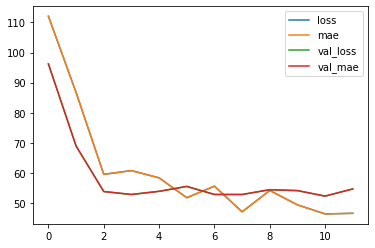

1/1 [==============================] - 0s 290ms/step - loss: 72.9224 - mae: 72.9224
[72.92239379882812, 72.92239379882812]
1/1 [==============================] - 0s 161ms/step
receta 0 kcal_true: 862.0 kcal_pred: 984.01965  precisión: 87.6 %
receta 0 carbohydrate_true: 92.9 carbohydrate_pred: 146.1188  precisión: 63.6 %
receta 0 protein_true: 35.12 protein_pred: 36.854847  precisión: 95.3 %
receta 0 total_fat_true: 41.53 total_fat_pred: 17.120642  precisión: 41.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1014.0 kcal_pred: 796.14465  precisión: 78.5 %
receta 1 carbohydrate_true: 183.2 carbohydrate_pred: 82.90855  precisión: 45.2 %
receta 1 protein_true: 29.62 protein_pred: 40.44071  precisión: 73.3 %
receta 1 total_fat_true: 20.6 total_fat_pred: 22.684027  precisión: 90.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 829.0 kcal_pred: 1220.6466  precisión: 67.9 %
receta 2 carbohydr

100%|██████████| 100/100 [00:20<00:00,  4.95it/s]


Epoch 584/595
10/10 [==============================] - 2s 174ms/step - loss: 162.9850 - mae: 162.9850 - val_loss: 154.8917 - val_mae: 154.8917
Epoch 585/595
10/10 [==============================] - 2s 170ms/step - loss: 107.8736 - mae: 107.8736 - val_loss: 104.2695 - val_mae: 104.2695
Epoch 586/595
10/10 [==============================] - 2s 199ms/step - loss: 86.0309 - mae: 86.0309 - val_loss: 81.3966 - val_mae: 81.3966
Epoch 587/595
10/10 [==============================] - 2s 191ms/step - loss: 83.0204 - mae: 83.0204 - val_loss: 87.7409 - val_mae: 87.7409
Epoch 588/595
10/10 [==============================] - 2s 193ms/step - loss: 74.1679 - mae: 74.1679 - val_loss: 89.8400 - val_mae: 89.8400
Epoch 589/595
10/10 [==============================] - 2s 188ms/step - loss: 66.5778 - mae: 66.5778 - val_loss: 85.6746 - val_mae: 85.6746
Epoch 590/595
10/10 [==============================] - 2s 195ms/step - loss: 71.3442 - mae: 71.3442 - val_loss: 85.7883 - val_mae: 85.7883
Epoch 591/595
10/10

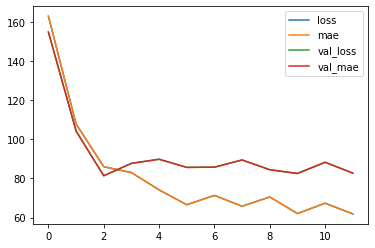

1/1 [==============================] - 0s 239ms/step - loss: 89.4720 - mae: 89.4720
[89.47199249267578, 89.47199249267578]
1/1 [==============================] - 0s 146ms/step
receta 0 kcal_true: 1666.0 kcal_pred: 1236.7455  precisión: 74.2 %
receta 0 carbohydrate_true: 307.5 carbohydrate_pred: 121.83961  precisión: 39.6 %
receta 0 protein_true: 74.6 protein_pred: 63.097424  precisión: 84.6 %
receta 0 total_fat_true: 15.41 total_fat_pred: 42.43685  precisión: 36.3 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1316.0 kcal_pred: 1191.2191  precisión: 90.5 %
receta 1 carbohydrate_true: 92.8 carbohydrate_pred: 143.02213  precisión: 64.9 %
receta 1 protein_true: 87.06 protein_pred: 62.808437  precisión: 72.1 %
receta 1 total_fat_true: 67.75 total_fat_pred: 33.467896  precisión: 49.4 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1225.0 kcal_pred: 1177.5272  precisión: 96.1 %
receta 2 carbo

100%|██████████| 100/100 [00:20<00:00,  4.96it/s]


Epoch 595/606
10/10 [==============================] - 2s 193ms/step - loss: 191.7917 - mae: 191.7917 - val_loss: 168.0281 - val_mae: 168.0281
Epoch 596/606
10/10 [==============================] - 2s 183ms/step - loss: 135.4448 - mae: 135.4448 - val_loss: 106.7772 - val_mae: 106.7772
Epoch 597/606
10/10 [==============================] - 2s 203ms/step - loss: 71.6381 - mae: 71.6381 - val_loss: 69.6783 - val_mae: 69.6783
Epoch 598/606
10/10 [==============================] - 2s 190ms/step - loss: 48.7552 - mae: 48.7552 - val_loss: 58.0059 - val_mae: 58.0059
Epoch 599/606
10/10 [==============================] - 2s 192ms/step - loss: 44.5170 - mae: 44.5170 - val_loss: 52.3759 - val_mae: 52.3759
Epoch 600/606
10/10 [==============================] - 2s 189ms/step - loss: 40.7578 - mae: 40.7578 - val_loss: 51.4357 - val_mae: 51.4357
Epoch 601/606
10/10 [==============================] - 2s 193ms/step - loss: 39.2311 - mae: 39.2311 - val_loss: 51.6244 - val_mae: 51.6244
Epoch 602/606
10/10

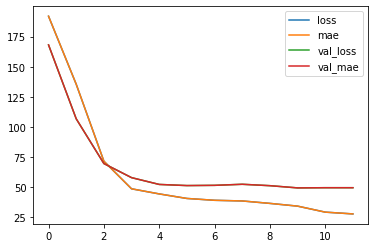

1/1 [==============================] - 0s 284ms/step - loss: 28.9486 - mae: 28.9486
[28.948591232299805, 28.948591232299805]
1/1 [==============================] - 0s 209ms/step
receta 0 kcal_true: 434.5 kcal_pred: 518.3013  precisión: 83.8 %
receta 0 carbohydrate_true: 35.03 carbohydrate_pred: 19.42269  precisión: 55.4 %
receta 0 protein_true: 48.75 protein_pred: 41.033394  precisión: 84.2 %
receta 0 total_fat_true: 9.63 total_fat_pred: 22.248774  precisión: 43.3 %
---------------------------------------------------------------------------
receta 1 kcal_true: 427.5 kcal_pred: 557.8803  precisión: 76.6 %
receta 1 carbohydrate_true: 42.0 carbohydrate_pred: 20.58979  precisión: 49.0 %
receta 1 protein_true: 22.27 protein_pred: 46.43744  precisión: 47.9 %
receta 1 total_fat_true: 21.19 total_fat_pred: 24.007214  precisión: 88.3 %
---------------------------------------------------------------------------
receta 2 kcal_true: 474.8 kcal_pred: 432.03387  precisión: 91.0 %
receta 2 carbohydra

100%|██████████| 100/100 [00:20<00:00,  4.94it/s]


Epoch 606/617
10/10 [==============================] - 2s 172ms/step - loss: 136.5064 - mae: 136.5064 - val_loss: 112.4862 - val_mae: 112.4862
Epoch 607/617
10/10 [==============================] - 2s 167ms/step - loss: 115.7765 - mae: 115.7765 - val_loss: 82.7558 - val_mae: 82.7558
Epoch 608/617
10/10 [==============================] - 2s 200ms/step - loss: 79.9953 - mae: 79.9953 - val_loss: 56.5880 - val_mae: 56.5880
Epoch 609/617
10/10 [==============================] - 2s 187ms/step - loss: 61.3582 - mae: 61.3582 - val_loss: 60.9567 - val_mae: 60.9567
Epoch 610/617
10/10 [==============================] - 2s 192ms/step - loss: 64.7643 - mae: 64.7643 - val_loss: 59.4276 - val_mae: 59.4276
Epoch 611/617
10/10 [==============================] - 2s 192ms/step - loss: 56.9123 - mae: 56.9123 - val_loss: 55.9736 - val_mae: 55.9736
Epoch 612/617
10/10 [==============================] - 2s 190ms/step - loss: 58.5228 - mae: 58.5228 - val_loss: 54.9877 - val_mae: 54.9877
Epoch 613/617
10/10 [

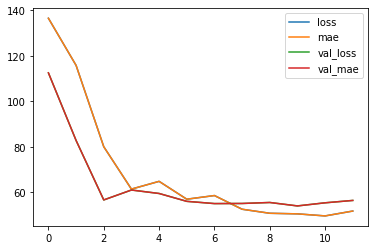

1/1 [==============================] - 0s 229ms/step - loss: 41.1909 - mae: 41.1909
[41.19086456298828, 41.19086456298828]
1/1 [==============================] - 0s 146ms/step
receta 0 kcal_true: 1019.0 kcal_pred: 881.8271  precisión: 86.5 %
receta 0 carbohydrate_true: 92.06 carbohydrate_pred: 111.39678  precisión: 82.6 %
receta 0 protein_true: 19.98 protein_pred: 40.30117  precisión: 49.6 %
receta 0 total_fat_true: 66.25 total_fat_pred: 22.677958  precisión: 34.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 900.5 kcal_pred: 874.58545  precisión: 97.1 %
receta 1 carbohydrate_true: 161.5 carbohydrate_pred: 71.621  precisión: 44.3 %
receta 1 protein_true: 46.62 protein_pred: 54.591644  precisión: 85.4 %
receta 1 total_fat_true: 12.22 total_fat_pred: 32.909714  precisión: 37.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 983.0 kcal_pred: 895.21844  precisión: 91.1 %
receta 2 carbohydr

100%|██████████| 100/100 [00:20<00:00,  4.93it/s]


Epoch 617/628
10/10 [==============================] - 2s 175ms/step - loss: 158.2259 - mae: 158.2259 - val_loss: 137.2126 - val_mae: 137.2126
Epoch 618/628
10/10 [==============================] - 2s 164ms/step - loss: 115.2895 - mae: 115.2895 - val_loss: 99.7451 - val_mae: 99.7451
Epoch 619/628
10/10 [==============================] - 2s 202ms/step - loss: 98.7676 - mae: 98.7676 - val_loss: 89.1308 - val_mae: 89.1308
Epoch 620/628
10/10 [==============================] - 2s 190ms/step - loss: 81.7772 - mae: 81.7772 - val_loss: 88.2029 - val_mae: 88.2029
Epoch 621/628
10/10 [==============================] - 2s 190ms/step - loss: 78.6807 - mae: 78.6807 - val_loss: 87.5819 - val_mae: 87.5819
Epoch 622/628
10/10 [==============================] - 2s 192ms/step - loss: 74.5164 - mae: 74.5164 - val_loss: 85.6686 - val_mae: 85.6686
Epoch 623/628
10/10 [==============================] - 2s 192ms/step - loss: 74.5532 - mae: 74.5532 - val_loss: 85.8098 - val_mae: 85.8098
Epoch 624/628
10/10 [

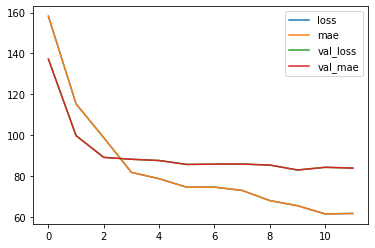

1/1 [==============================] - 0s 242ms/step - loss: 85.5525 - mae: 85.5525
[85.55252075195312, 85.55252075195312]
1/1 [==============================] - 0s 158ms/step
receta 0 kcal_true: 1658.0 kcal_pred: 1401.9346  precisión: 84.6 %
receta 0 carbohydrate_true: 374.5 carbohydrate_pred: 198.89383  precisión: 53.1 %
receta 0 protein_true: 30.16 protein_pred: 67.73185  precisión: 44.5 %
receta 0 total_fat_true: 18.45 total_fat_pred: 35.360157  precisión: 52.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1341.0 kcal_pred: 1363.2521  precisión: 98.4 %
receta 1 carbohydrate_true: 7.6 carbohydrate_pred: 128.01819  precisión: 5.9 %
receta 1 protein_true: 139.1 protein_pred: 82.54216  precisión: 59.3 %
receta 1 total_fat_true: 82.56 total_fat_pred: 48.961452  precisión: 59.3 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1589.0 kcal_pred: 1516.011  precisión: 95.4 %
receta 2 carbohyd

100%|██████████| 100/100 [00:20<00:00,  4.93it/s]


Epoch 628/639
10/10 [==============================] - 2s 178ms/step - loss: 203.5717 - mae: 203.5717 - val_loss: 163.2068 - val_mae: 163.2068
Epoch 629/639
10/10 [==============================] - 2s 161ms/step - loss: 128.2921 - mae: 128.2921 - val_loss: 93.5613 - val_mae: 93.5613
Epoch 630/639
10/10 [==============================] - 2s 198ms/step - loss: 68.9756 - mae: 68.9756 - val_loss: 57.7817 - val_mae: 57.7817
Epoch 631/639
10/10 [==============================] - 2s 192ms/step - loss: 55.3120 - mae: 55.3120 - val_loss: 49.5777 - val_mae: 49.5777
Epoch 632/639
10/10 [==============================] - 2s 190ms/step - loss: 50.5289 - mae: 50.5289 - val_loss: 49.3318 - val_mae: 49.3318
Epoch 633/639
10/10 [==============================] - 2s 191ms/step - loss: 46.1958 - mae: 46.1958 - val_loss: 49.3007 - val_mae: 49.3007
Epoch 634/639
10/10 [==============================] - 2s 196ms/step - loss: 44.4781 - mae: 44.4781 - val_loss: 48.6240 - val_mae: 48.6240
Epoch 635/639
10/10 [

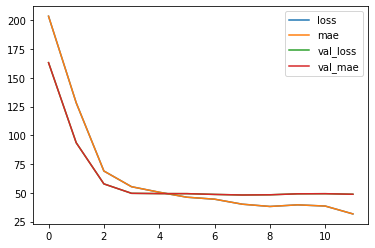

1/1 [==============================] - 0s 193ms/step - loss: 47.0920 - mae: 47.0920
[47.092037200927734, 47.092037200927734]
1/1 [==============================] - 0s 157ms/step
receta 0 kcal_true: 426.0 kcal_pred: 548.1951  precisión: 77.7 %
receta 0 carbohydrate_true: 52.66 carbohydrate_pred: 69.64665  precisión: 75.6 %
receta 0 protein_true: 36.84 protein_pred: 24.744808  precisión: 67.2 %
receta 0 total_fat_true: 8.67 total_fat_pred: 11.7227745  precisión: 74.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 545.5 kcal_pred: 390.5987  precisión: 71.6 %
receta 1 carbohydrate_true: 18.9 carbohydrate_pred: 18.464193  precisión: 97.7 %
receta 1 protein_true: 26.48 protein_pred: 32.85202  precisión: 80.6 %
receta 1 total_fat_true: 33.9 total_fat_pred: 16.4555  precisión: 48.5 %
---------------------------------------------------------------------------
receta 2 kcal_true: 490.5 kcal_pred: 268.3542  precisión: 54.7 %
receta 2 carbohydrate

100%|██████████| 100/100 [00:20<00:00,  4.92it/s]


Epoch 639/650
10/10 [==============================] - 2s 177ms/step - loss: 119.1621 - mae: 119.1621 - val_loss: 105.3879 - val_mae: 105.3879
Epoch 640/650
10/10 [==============================] - 2s 159ms/step - loss: 91.3622 - mae: 91.3622 - val_loss: 78.5584 - val_mae: 78.5584
Epoch 641/650
10/10 [==============================] - 2s 188ms/step - loss: 66.6729 - mae: 66.6729 - val_loss: 57.8162 - val_mae: 57.8162
Epoch 642/650
10/10 [==============================] - 2s 192ms/step - loss: 65.5702 - mae: 65.5702 - val_loss: 51.9925 - val_mae: 51.9925
Epoch 643/650
10/10 [==============================] - 2s 188ms/step - loss: 57.3140 - mae: 57.3140 - val_loss: 59.3956 - val_mae: 59.3956
Epoch 644/650
10/10 [==============================] - 2s 190ms/step - loss: 50.9849 - mae: 50.9849 - val_loss: 62.7958 - val_mae: 62.7958
Epoch 645/650
10/10 [==============================] - 2s 204ms/step - loss: 49.8819 - mae: 49.8819 - val_loss: 59.2974 - val_mae: 59.2974
Epoch 646/650
10/10 [==

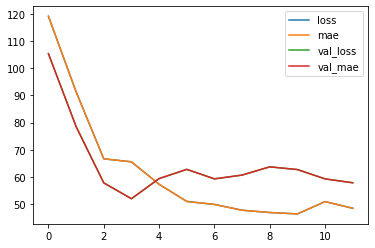

1/1 [==============================] - 0s 221ms/step - loss: 46.4113 - mae: 46.4113
[46.41133117675781, 46.41133117675781]
1/1 [==============================] - 0s 165ms/step
receta 0 kcal_true: 929.5 kcal_pred: 847.95667  precisión: 91.2 %
receta 0 carbohydrate_true: 36.1 carbohydrate_pred: 101.84625  precisión: 35.4 %
receta 0 protein_true: 31.88 protein_pred: 44.063805  precisión: 72.3 %
receta 0 total_fat_true: 80.0 total_fat_pred: 22.884394  precisión: 28.6 %
---------------------------------------------------------------------------
receta 1 kcal_true: 858.0 kcal_pred: 843.15955  precisión: 98.3 %
receta 1 carbohydrate_true: 193.8 carbohydrate_pred: 96.04997  precisión: 49.6 %
receta 1 protein_true: 15.29 protein_pred: 48.260353  precisión: 31.7 %
receta 1 total_fat_true: 10.87 total_fat_pred: 21.772528  precisión: 49.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 903.0 kcal_pred: 1140.1201  precisión: 79.2 %
receta 2 carbohyd

100%|██████████| 100/100 [00:20<00:00,  4.90it/s]


Epoch 650/661
10/10 [==============================] - 2s 179ms/step - loss: 160.9324 - mae: 160.9324 - val_loss: 144.5155 - val_mae: 144.5155
Epoch 651/661
10/10 [==============================] - 2s 169ms/step - loss: 110.9734 - mae: 110.9734 - val_loss: 87.4185 - val_mae: 87.4185
Epoch 652/661
10/10 [==============================] - 2s 193ms/step - loss: 96.1942 - mae: 96.1942 - val_loss: 77.5801 - val_mae: 77.5801
Epoch 653/661
10/10 [==============================] - 2s 186ms/step - loss: 81.6071 - mae: 81.6071 - val_loss: 79.0764 - val_mae: 79.0764
Epoch 654/661
10/10 [==============================] - 2s 189ms/step - loss: 79.2296 - mae: 79.2296 - val_loss: 86.3191 - val_mae: 86.3191
Epoch 655/661
10/10 [==============================] - 2s 191ms/step - loss: 75.6133 - mae: 75.6133 - val_loss: 83.5496 - val_mae: 83.5496
Epoch 656/661
10/10 [==============================] - 2s 187ms/step - loss: 66.8130 - mae: 66.8130 - val_loss: 76.0853 - val_mae: 76.0853
Epoch 657/661
10/10 [

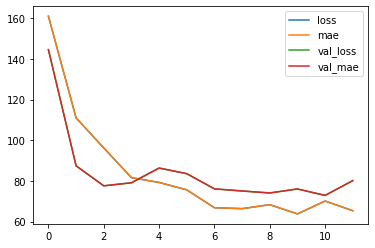

1/1 [==============================] - 0s 225ms/step - loss: 110.4757 - mae: 110.4757
[110.4757308959961, 110.4757308959961]
1/1 [==============================] - 0s 151ms/step
receta 0 kcal_true: 1589.0 kcal_pred: 1256.1425  precisión: 79.1 %
receta 0 carbohydrate_true: 215.5 carbohydrate_pred: 64.348145  precisión: 29.9 %
receta 0 protein_true: 75.3 protein_pred: 100.4283  precisión: 75.0 %
receta 0 total_fat_true: 48.84 total_fat_pred: 54.382763  precisión: 89.8 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1462.0 kcal_pred: 1285.7869  precisión: 87.9 %
receta 1 carbohydrate_true: 319.8 carbohydrate_pred: 111.24596  precisión: 34.8 %
receta 1 protein_true: 29.02 protein_pred: 76.472244  precisión: 37.9 %
receta 1 total_fat_true: 2.81 total_fat_pred: 46.635197  precisión: 6.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1308.0 kcal_pred: 1606.9795  precisión: 81.4 %
receta 2 carb

100%|██████████| 100/100 [00:20<00:00,  4.93it/s]


Epoch 661/672
10/10 [==============================] - 2s 176ms/step - loss: 181.4521 - mae: 181.4521 - val_loss: 146.4917 - val_mae: 146.4917
Epoch 662/672
10/10 [==============================] - 2s 181ms/step - loss: 102.9502 - mae: 102.9502 - val_loss: 93.3001 - val_mae: 93.3001
Epoch 663/672
10/10 [==============================] - 2s 192ms/step - loss: 68.2759 - mae: 68.2759 - val_loss: 62.6155 - val_mae: 62.6155
Epoch 664/672
10/10 [==============================] - 2s 189ms/step - loss: 57.5913 - mae: 57.5913 - val_loss: 59.5757 - val_mae: 59.5757
Epoch 665/672
10/10 [==============================] - 2s 192ms/step - loss: 47.5214 - mae: 47.5214 - val_loss: 62.8244 - val_mae: 62.8244
Epoch 666/672
10/10 [==============================] - 2s 195ms/step - loss: 46.4183 - mae: 46.4183 - val_loss: 64.1673 - val_mae: 64.1673
Epoch 667/672
10/10 [==============================] - 2s 203ms/step - loss: 41.4167 - mae: 41.4167 - val_loss: 62.2748 - val_mae: 62.2748
Epoch 668/672
10/10 [

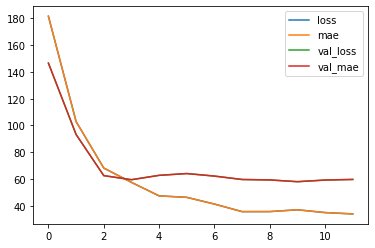

1/1 [==============================] - 0s 314ms/step - loss: 36.8308 - mae: 36.8308
[36.83082580566406, 36.83082580566406]
1/1 [==============================] - 0s 158ms/step
receta 0 kcal_true: 789.0 kcal_pred: 754.80835  precisión: 95.7 %
receta 0 carbohydrate_true: 67.06 carbohydrate_pred: 125.13015  precisión: 53.6 %
receta 0 protein_true: 76.25 protein_pred: 20.748907  precisión: 27.2 %
receta 0 total_fat_true: 25.62 total_fat_pred: 10.227993  precisión: 39.9 %
---------------------------------------------------------------------------
receta 1 kcal_true: 418.5 kcal_pred: 565.9121  precisión: 74.0 %
receta 1 carbohydrate_true: 44.34 carbohydrate_pred: 30.195131  precisión: 68.1 %
receta 1 protein_true: 26.16 protein_pred: 39.64929  precisión: 66.0 %
receta 1 total_fat_true: 14.72 total_fat_pred: 20.81706  precisión: 70.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 647.5 kcal_pred: 585.4614  precisión: 90.4 %
receta 2 carbohydr

100%|██████████| 100/100 [00:20<00:00,  4.91it/s]


Epoch 672/683
10/10 [==============================] - 2s 176ms/step - loss: 139.8324 - mae: 139.8324 - val_loss: 115.6555 - val_mae: 115.6555
Epoch 673/683
10/10 [==============================] - 2s 174ms/step - loss: 115.0093 - mae: 115.0093 - val_loss: 89.0868 - val_mae: 89.0868
Epoch 674/683
10/10 [==============================] - 2s 192ms/step - loss: 85.8784 - mae: 85.8784 - val_loss: 70.1391 - val_mae: 70.1391
Epoch 675/683
10/10 [==============================] - 2s 194ms/step - loss: 71.8910 - mae: 71.8910 - val_loss: 68.0176 - val_mae: 68.0176
Epoch 676/683
10/10 [==============================] - 2s 194ms/step - loss: 72.1327 - mae: 72.1327 - val_loss: 68.1873 - val_mae: 68.1873
Epoch 677/683
10/10 [==============================] - 2s 191ms/step - loss: 64.2815 - mae: 64.2815 - val_loss: 62.5501 - val_mae: 62.5501
Epoch 678/683
10/10 [==============================] - 2s 199ms/step - loss: 60.6865 - mae: 60.6865 - val_loss: 59.0774 - val_mae: 59.0774
Epoch 679/683
10/10 [

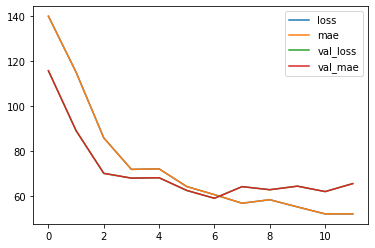

1/1 [==============================] - 0s 217ms/step - loss: 58.5629 - mae: 58.5629
[58.56288146972656, 58.56288146972656]
1/1 [==============================] - 0s 159ms/step
receta 0 kcal_true: 955.0 kcal_pred: 847.0259  precisión: 88.7 %
receta 0 carbohydrate_true: 54.56 carbohydrate_pred: 22.153675  precisión: 40.6 %
receta 0 protein_true: 106.8 protein_pred: 79.75104  precisión: 74.7 %
receta 0 total_fat_true: 40.53 total_fat_pred: 42.144726  precisión: 96.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1055.0 kcal_pred: 975.0233  precisión: 92.4 %
receta 1 carbohydrate_true: 105.6 carbohydrate_pred: 146.42287  precisión: 72.1 %
receta 1 protein_true: 7.55 protein_pred: 40.597965  precisión: 18.6 %
receta 1 total_fat_true: 70.56 total_fat_pred: 23.048412  precisión: 32.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 870.5 kcal_pred: 562.0781  precisión: 64.6 %
receta 2 carbohydr

100%|██████████| 100/100 [00:20<00:00,  4.96it/s]


Epoch 683/694
10/10 [==============================] - 2s 177ms/step - loss: 152.6195 - mae: 152.6195 - val_loss: 155.0857 - val_mae: 155.0857
Epoch 684/694
10/10 [==============================] - 2s 165ms/step - loss: 108.3180 - mae: 108.3180 - val_loss: 93.6852 - val_mae: 93.6852
Epoch 685/694
10/10 [==============================] - 2s 196ms/step - loss: 86.7111 - mae: 86.7111 - val_loss: 80.9239 - val_mae: 80.9239
Epoch 686/694
10/10 [==============================] - 2s 201ms/step - loss: 83.6482 - mae: 83.6482 - val_loss: 82.3514 - val_mae: 82.3514
Epoch 687/694
10/10 [==============================] - 2s 196ms/step - loss: 73.5819 - mae: 73.5819 - val_loss: 91.0557 - val_mae: 91.0557
Epoch 688/694
10/10 [==============================] - 2s 196ms/step - loss: 72.9564 - mae: 72.9564 - val_loss: 89.0797 - val_mae: 89.0797
Epoch 689/694
10/10 [==============================] - 2s 207ms/step - loss: 69.0225 - mae: 69.0225 - val_loss: 78.3209 - val_mae: 78.3209
Epoch 690/694
10/10 [

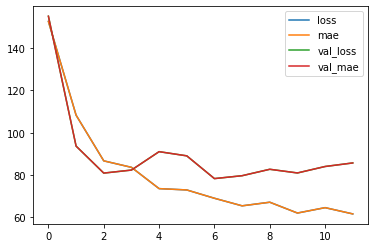

1/1 [==============================] - 0s 219ms/step - loss: 91.1180 - mae: 91.1180
[91.11798095703125, 91.11798095703125]
1/1 [==============================] - 0s 147ms/step
receta 0 kcal_true: 1422.0 kcal_pred: 1240.1293  precisión: 87.2 %
receta 0 carbohydrate_true: 22.2 carbohydrate_pred: 141.02924  precisión: 15.7 %
receta 0 protein_true: 203.4 protein_pred: 64.54628  precisión: 31.7 %
receta 0 total_fat_true: 55.06 total_fat_pred: 41.707027  precisión: 75.7 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1433.0 kcal_pred: 1390.3337  precisión: 97.0 %
receta 1 carbohydrate_true: 244.0 carbohydrate_pred: 270.4036  precisión: 90.2 %
receta 1 protein_true: 59.78 protein_pred: 34.417168  precisión: 57.6 %
receta 1 total_fat_true: 22.92 total_fat_pred: 24.164762  precisión: 94.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1289.0 kcal_pred: 1229.779  precisión: 95.4 %
receta 2 carboh

100%|██████████| 100/100 [00:20<00:00,  4.95it/s]


Epoch 694/705
10/10 [==============================] - 2s 183ms/step - loss: 194.1338 - mae: 194.1338 - val_loss: 152.5515 - val_mae: 152.5515
Epoch 695/705
10/10 [==============================] - 2s 194ms/step - loss: 115.1367 - mae: 115.1367 - val_loss: 95.3799 - val_mae: 95.3799
Epoch 696/705
10/10 [==============================] - 2s 207ms/step - loss: 68.7028 - mae: 68.7028 - val_loss: 72.7401 - val_mae: 72.7401
Epoch 697/705
10/10 [==============================] - 2s 196ms/step - loss: 49.6119 - mae: 49.6119 - val_loss: 63.2621 - val_mae: 63.2621
Epoch 698/705
10/10 [==============================] - 2s 191ms/step - loss: 49.3501 - mae: 49.3501 - val_loss: 59.6043 - val_mae: 59.6043
Epoch 699/705
10/10 [==============================] - 2s 200ms/step - loss: 43.1307 - mae: 43.1307 - val_loss: 59.0545 - val_mae: 59.0545
Epoch 700/705
10/10 [==============================] - 2s 200ms/step - loss: 40.2886 - mae: 40.2886 - val_loss: 58.7629 - val_mae: 58.7629
Epoch 701/705
10/10 [

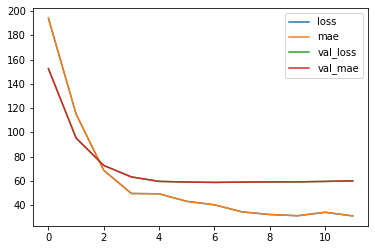

1/1 [==============================] - 0s 323ms/step - loss: 70.8275 - mae: 70.8275
[70.82752990722656, 70.82752990722656]
1/1 [==============================] - 0s 145ms/step
receta 0 kcal_true: 467.5 kcal_pred: 607.87573  precisión: 76.9 %
receta 0 carbohydrate_true: 95.5 carbohydrate_pred: 23.75786  precisión: 24.9 %
receta 0 protein_true: 46.12 protein_pred: 31.75027  precisión: 68.8 %
receta 0 total_fat_true: 8.28 total_fat_pred: 29.560135  precisión: 28.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 303.8 kcal_pred: 625.01575  precisión: 48.6 %
receta 1 carbohydrate_true: 3.69 carbohydrate_pred: 61.355293  precisión: 6.0 %
receta 1 protein_true: 20.27 protein_pred: 27.23222  precisión: 74.4 %
receta 1 total_fat_true: 22.34 total_fat_pred: 19.107025  precisión: 85.5 %
---------------------------------------------------------------------------
receta 2 kcal_true: 708.0 kcal_pred: 609.3979  precisión: 86.1 %
receta 2 carbohydrate_

100%|██████████| 100/100 [00:20<00:00,  4.91it/s]


Epoch 705/716
10/10 [==============================] - 2s 177ms/step - loss: 113.9711 - mae: 113.9711 - val_loss: 100.5646 - val_mae: 100.5646
Epoch 706/716
10/10 [==============================] - 2s 164ms/step - loss: 89.7972 - mae: 89.7972 - val_loss: 73.3624 - val_mae: 73.3624
Epoch 707/716
10/10 [==============================] - 2s 195ms/step - loss: 69.8612 - mae: 69.8612 - val_loss: 58.5879 - val_mae: 58.5879
Epoch 708/716
10/10 [==============================] - 2s 196ms/step - loss: 61.2072 - mae: 61.2072 - val_loss: 58.6569 - val_mae: 58.6569
Epoch 709/716
10/10 [==============================] - 2s 191ms/step - loss: 58.1062 - mae: 58.1062 - val_loss: 57.7616 - val_mae: 57.7616
Epoch 710/716
10/10 [==============================] - 2s 194ms/step - loss: 48.8241 - mae: 48.8241 - val_loss: 56.6333 - val_mae: 56.6333
Epoch 711/716
10/10 [==============================] - 2s 206ms/step - loss: 48.1784 - mae: 48.1784 - val_loss: 55.5100 - val_mae: 55.5100
Epoch 712/716
10/10 [==

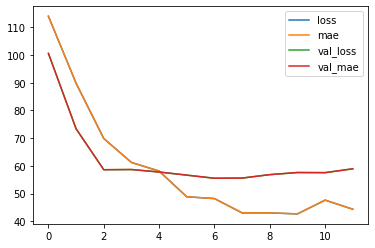

1/1 [==============================] - 0s 223ms/step - loss: 52.6312 - mae: 52.6312
[52.63120651245117, 52.63120651245117]
1/1 [==============================] - 0s 151ms/step
receta 0 kcal_true: 1146.0 kcal_pred: 991.7923  precisión: 86.5 %
receta 0 carbohydrate_true: 126.7 carbohydrate_pred: 150.12619  precisión: 84.4 %
receta 0 protein_true: 99.9 protein_pred: 44.231934  precisión: 44.3 %
receta 0 total_fat_true: 24.73 total_fat_pred: 20.673832  precisión: 83.6 %
---------------------------------------------------------------------------
receta 1 kcal_true: 883.5 kcal_pred: 889.8731  precisión: 99.3 %
receta 1 carbohydrate_true: 105.9 carbohydrate_pred: 116.15711  precisión: 91.1 %
receta 1 protein_true: 15.09 protein_pred: 44.618397  precisión: 33.8 %
receta 1 total_fat_true: 4.05 total_fat_pred: 22.759745  precisión: 17.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1003.0 kcal_pred: 822.24384  precisión: 82.0 %
receta 2 carbohy

100%|██████████| 100/100 [00:20<00:00,  4.91it/s]


Epoch 716/727
10/10 [==============================] - 2s 182ms/step - loss: 138.6246 - mae: 138.6246 - val_loss: 132.8486 - val_mae: 132.8486
Epoch 717/727
10/10 [==============================] - 2s 195ms/step - loss: 92.8884 - mae: 92.8884 - val_loss: 85.8015 - val_mae: 85.8015
Epoch 718/727
10/10 [==============================] - 2s 197ms/step - loss: 90.3194 - mae: 90.3194 - val_loss: 80.1321 - val_mae: 80.1321
Epoch 719/727
10/10 [==============================] - 2s 228ms/step - loss: 87.5732 - mae: 87.5732 - val_loss: 84.4217 - val_mae: 84.4217
Epoch 720/727
10/10 [==============================] - 2s 231ms/step - loss: 71.8242 - mae: 71.8242 - val_loss: 82.6329 - val_mae: 82.6329
Epoch 721/727
10/10 [==============================] - 2s 242ms/step - loss: 69.2155 - mae: 69.2155 - val_loss: 79.7561 - val_mae: 79.7561
Epoch 722/727
10/10 [==============================] - 2s 237ms/step - loss: 69.5452 - mae: 69.5452 - val_loss: 77.1848 - val_mae: 77.1848
Epoch 723/727
10/10 [==

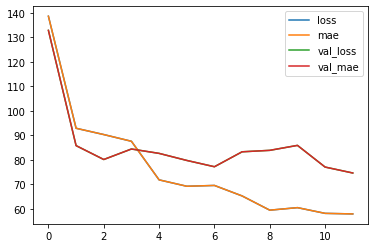

1/1 [==============================] - 0s 221ms/step - loss: 94.8609 - mae: 94.8609
[94.86088562011719, 94.86088562011719]
1/1 [==============================] - 0s 160ms/step
receta 0 kcal_true: 1441.0 kcal_pred: 1681.4386  precisión: 85.7 %
receta 0 carbohydrate_true: 274.0 carbohydrate_pred: 259.6262  precisión: 94.8 %
receta 0 protein_true: 71.7 protein_pred: 63.310555  precisión: 88.3 %
receta 0 total_fat_true: 66.3 total_fat_pred: 34.046772  precisión: 51.3 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1470.0 kcal_pred: 1257.7305  precisión: 85.6 %
receta 1 carbohydrate_true: 93.9 carbohydrate_pred: 163.85095  precisión: 57.3 %
receta 1 protein_true: 35.28 protein_pred: 60.244606  precisión: 58.6 %
receta 1 total_fat_true: 108.3 total_fat_pred: 32.260654  precisión: 29.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1327.0 kcal_pred: 1351.5303  precisión: 98.2 %
receta 2 carboh

100%|██████████| 100/100 [00:20<00:00,  4.90it/s]


Epoch 727/738
10/10 [==============================] - 2s 179ms/step - loss: 193.8521 - mae: 193.8521 - val_loss: 203.8905 - val_mae: 203.8905
Epoch 728/738
10/10 [==============================] - 2s 156ms/step - loss: 117.4162 - mae: 117.4162 - val_loss: 128.2397 - val_mae: 128.2397
Epoch 729/738
10/10 [==============================] - 2s 207ms/step - loss: 61.5644 - mae: 61.5644 - val_loss: 80.9903 - val_mae: 80.9903
Epoch 730/738
10/10 [==============================] - 2s 195ms/step - loss: 49.4887 - mae: 49.4887 - val_loss: 64.8517 - val_mae: 64.8517
Epoch 731/738
10/10 [==============================] - 2s 194ms/step - loss: 42.3962 - mae: 42.3962 - val_loss: 56.5226 - val_mae: 56.5226
Epoch 732/738
10/10 [==============================] - 2s 194ms/step - loss: 38.6418 - mae: 38.6418 - val_loss: 53.1671 - val_mae: 53.1671
Epoch 733/738
10/10 [==============================] - 2s 196ms/step - loss: 38.3866 - mae: 38.3866 - val_loss: 53.3039 - val_mae: 53.3039
Epoch 734/738
10/10

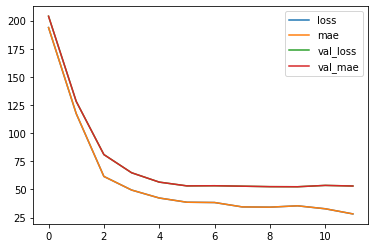

1/1 [==============================] - 0s 222ms/step - loss: 55.2801 - mae: 55.2801
[55.28014373779297, 55.28014373779297]
1/1 [==============================] - 0s 153ms/step
receta 0 kcal_true: 318.8 kcal_pred: 491.8881  precisión: 64.8 %
receta 0 carbohydrate_true: 19.75 carbohydrate_pred: 67.49342  precisión: 29.3 %
receta 0 protein_true: 16.17 protein_pred: 19.05989  precisión: 84.8 %
receta 0 total_fat_true: 19.3 total_fat_pred: 11.122193  precisión: 57.6 %
---------------------------------------------------------------------------
receta 1 kcal_true: 318.0 kcal_pred: 725.217  precisión: 43.8 %
receta 1 carbohydrate_true: 28.4 carbohydrate_pred: 31.686619  precisión: 89.6 %
receta 1 protein_true: 38.53 protein_pred: 56.743847  precisión: 67.9 %
receta 1 total_fat_true: 6.13 total_fat_pred: 27.934832  precisión: 21.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 325.8 kcal_pred: 419.23236  precisión: 77.7 %
receta 2 carbohydrate_

100%|██████████| 100/100 [00:20<00:00,  4.87it/s]


Epoch 738/749
10/10 [==============================] - 2s 177ms/step - loss: 121.1026 - mae: 121.1026 - val_loss: 122.6832 - val_mae: 122.6832
Epoch 739/749
10/10 [==============================] - 2s 160ms/step - loss: 95.8682 - mae: 95.8682 - val_loss: 100.0645 - val_mae: 100.0645
Epoch 740/749
10/10 [==============================] - 2s 191ms/step - loss: 71.8159 - mae: 71.8159 - val_loss: 82.8637 - val_mae: 82.8637
Epoch 741/749
10/10 [==============================] - 2s 194ms/step - loss: 62.7116 - mae: 62.7116 - val_loss: 79.6158 - val_mae: 79.6158
Epoch 742/749
10/10 [==============================] - 2s 199ms/step - loss: 58.5705 - mae: 58.5705 - val_loss: 79.1357 - val_mae: 79.1357
Epoch 743/749
10/10 [==============================] - 2s 196ms/step - loss: 54.4554 - mae: 54.4554 - val_loss: 79.3955 - val_mae: 79.3955
Epoch 744/749
10/10 [==============================] - 2s 192ms/step - loss: 53.3630 - mae: 53.3630 - val_loss: 78.1551 - val_mae: 78.1551
Epoch 745/749
10/10 [

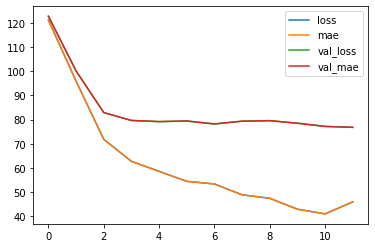

1/1 [==============================] - 0s 228ms/step - loss: 55.4783 - mae: 55.4783
[55.478302001953125, 55.478302001953125]
1/1 [==============================] - 0s 163ms/step
receta 0 kcal_true: 852.5 kcal_pred: 978.4809  precisión: 87.1 %
receta 0 carbohydrate_true: 202.4 carbohydrate_pred: 181.03256  precisión: 89.5 %
receta 0 protein_true: 9.77 protein_pred: 26.524427  precisión: 36.8 %
receta 0 total_fat_true: 3.25 total_fat_pred: 14.015244  precisión: 23.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 858.0 kcal_pred: 1033.0841  precisión: 83.1 %
receta 1 carbohydrate_true: 7.13 carbohydrate_pred: 125.53042  precisión: 5.7 %
receta 1 protein_true: 59.78 protein_pred: 46.657642  precisión: 78.0 %
receta 1 total_fat_true: 66.3 total_fat_pred: 26.57928  precisión: 40.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 934.5 kcal_pred: 940.621  precisión: 99.3 %
receta 2 carbohydrate

100%|██████████| 100/100 [00:20<00:00,  4.93it/s]


Epoch 749/760
10/10 [==============================] - 2s 180ms/step - loss: 147.7590 - mae: 147.7590 - val_loss: 142.7797 - val_mae: 142.7797
Epoch 750/760
10/10 [==============================] - 2s 189ms/step - loss: 107.9063 - mae: 107.9063 - val_loss: 92.9435 - val_mae: 92.9435
Epoch 751/760
10/10 [==============================] - 2s 201ms/step - loss: 81.3186 - mae: 81.3186 - val_loss: 71.3057 - val_mae: 71.3057
Epoch 752/760
10/10 [==============================] - 2s 224ms/step - loss: 77.7052 - mae: 77.7052 - val_loss: 81.9915 - val_mae: 81.9915
Epoch 753/760
10/10 [==============================] - 2s 218ms/step - loss: 73.3460 - mae: 73.3460 - val_loss: 85.2050 - val_mae: 85.2050
Epoch 754/760
10/10 [==============================] - 2s 219ms/step - loss: 67.3995 - mae: 67.3995 - val_loss: 79.8923 - val_mae: 79.8923
Epoch 755/760
10/10 [==============================] - 2s 220ms/step - loss: 65.2315 - mae: 65.2315 - val_loss: 80.6425 - val_mae: 80.6425
Epoch 756/760
10/10 [

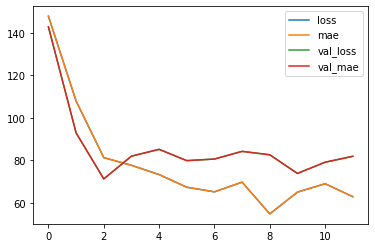

1/1 [==============================] - 0s 226ms/step - loss: 75.6071 - mae: 75.6071
[75.60709381103516, 75.60709381103516]
1/1 [==============================] - 0s 147ms/step
receta 0 kcal_true: 1681.0 kcal_pred: 1628.456  precisión: 96.9 %
receta 0 carbohydrate_true: 20.89 carbohydrate_pred: 53.909275  precisión: 38.8 %
receta 0 protein_true: 210.6 protein_pred: 143.84564  precisión: 68.3 %
receta 0 total_fat_true: 83.8 total_fat_pred: 80.34596  precisión: 95.9 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1333.0 kcal_pred: 1339.1011  precisión: 99.5 %
receta 1 carbohydrate_true: 107.6 carbohydrate_pred: 196.04846  precisión: 54.9 %
receta 1 protein_true: 40.6 protein_pred: 58.160507  precisión: 69.8 %
receta 1 total_fat_true: 81.7 total_fat_pred: 33.082382  precisión: 40.5 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1491.0 kcal_pred: 1121.4819  precisión: 75.2 %
receta 2 carbohy

100%|██████████| 100/100 [00:20<00:00,  4.84it/s]


Epoch 760/771
10/10 [==============================] - 2s 180ms/step - loss: 197.5782 - mae: 197.5782 - val_loss: 163.3061 - val_mae: 163.3061
Epoch 761/771
10/10 [==============================] - 2s 160ms/step - loss: 123.0492 - mae: 123.0492 - val_loss: 100.5854 - val_mae: 100.5854
Epoch 762/771
10/10 [==============================] - 2s 203ms/step - loss: 70.3293 - mae: 70.3293 - val_loss: 68.7052 - val_mae: 68.7052
Epoch 763/771
10/10 [==============================] - 2s 196ms/step - loss: 48.1485 - mae: 48.1485 - val_loss: 53.2466 - val_mae: 53.2466
Epoch 764/771
10/10 [==============================] - 2s 194ms/step - loss: 46.8117 - mae: 46.8117 - val_loss: 49.3866 - val_mae: 49.3866
Epoch 765/771
10/10 [==============================] - 2s 191ms/step - loss: 42.1113 - mae: 42.1113 - val_loss: 49.3831 - val_mae: 49.3831
Epoch 766/771
10/10 [==============================] - 2s 194ms/step - loss: 41.0304 - mae: 41.0304 - val_loss: 49.6670 - val_mae: 49.6670
Epoch 767/771
10/10

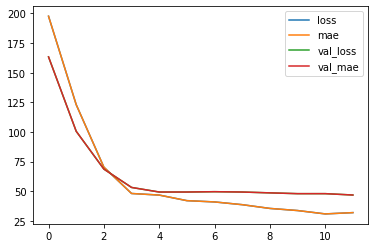

1/1 [==============================] - 0s 273ms/step - loss: 40.0098 - mae: 40.0098
[40.009765625, 40.009765625]
1/1 [==============================] - 0s 153ms/step
receta 0 kcal_true: 522.0 kcal_pred: 534.8324  precisión: 97.6 %
receta 0 carbohydrate_true: 48.75 carbohydrate_pred: 18.641071  precisión: 38.2 %
receta 0 protein_true: 63.38 protein_pred: 49.044937  precisión: 77.4 %
receta 0 total_fat_true: 13.99 total_fat_pred: 19.668926  precisión: 71.1 %
---------------------------------------------------------------------------
receta 1 kcal_true: 403.8 kcal_pred: 415.80576  precisión: 97.1 %
receta 1 carbohydrate_true: 74.5 carbohydrate_pred: 55.329994  precisión: 74.3 %
receta 1 protein_true: 32.1 protein_pred: 18.086842  precisión: 56.4 %
receta 1 total_fat_true: 6.5 total_fat_pred: 8.414958  precisión: 77.2 %
---------------------------------------------------------------------------
receta 2 kcal_true: 333.2 kcal_pred: 568.92944  precisión: 58.6 %
receta 2 carbohydrate_true: 86

100%|██████████| 100/100 [00:20<00:00,  4.86it/s]


Epoch 771/782
10/10 [==============================] - 2s 176ms/step - loss: 129.0578 - mae: 129.0578 - val_loss: 118.5381 - val_mae: 118.5381
Epoch 772/782
10/10 [==============================] - 2s 163ms/step - loss: 109.0143 - mae: 109.0143 - val_loss: 91.5027 - val_mae: 91.5027
Epoch 773/782
10/10 [==============================] - 2s 205ms/step - loss: 73.8341 - mae: 73.8341 - val_loss: 62.0909 - val_mae: 62.0909
Epoch 774/782
10/10 [==============================] - 2s 192ms/step - loss: 59.3428 - mae: 59.3428 - val_loss: 48.2453 - val_mae: 48.2453
Epoch 775/782
10/10 [==============================] - 2s 196ms/step - loss: 50.5144 - mae: 50.5144 - val_loss: 49.8167 - val_mae: 49.8167
Epoch 776/782
10/10 [==============================] - 2s 194ms/step - loss: 46.4867 - mae: 46.4867 - val_loss: 54.9520 - val_mae: 54.9520
Epoch 777/782
10/10 [==============================] - 2s 194ms/step - loss: 46.7693 - mae: 46.7693 - val_loss: 52.4502 - val_mae: 52.4502
Epoch 778/782
10/10 [

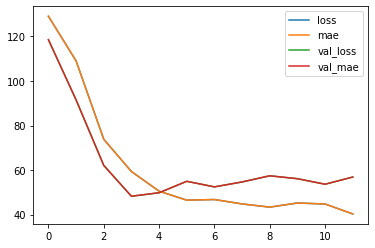

1/1 [==============================] - 0s 294ms/step - loss: 42.9291 - mae: 42.9291
[42.92909240722656, 42.92909240722656]
1/1 [==============================] - 0s 162ms/step
receta 0 kcal_true: 1058.0 kcal_pred: 1025.8763  precisión: 97.0 %
receta 0 carbohydrate_true: 115.3 carbohydrate_pred: 108.39693  precisión: 94.0 %
receta 0 protein_true: 28.88 protein_pred: 64.48731  precisión: 44.8 %
receta 0 total_fat_true: 57.72 total_fat_pred: 30.256123  precisión: 52.4 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1119.0 kcal_pred: 998.8067  precisión: 89.3 %
receta 1 carbohydrate_true: 149.2 carbohydrate_pred: 134.56493  precisión: 90.2 %
receta 1 protein_true: 22.31 protein_pred: 45.12303  precisión: 49.4 %
receta 1 total_fat_true: 48.47 total_fat_pred: 25.760284  precisión: 53.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 979.5 kcal_pred: 975.2384  precisión: 99.6 %
receta 2 carbohy

100%|██████████| 100/100 [00:20<00:00,  4.79it/s]


Epoch 782/793
10/10 [==============================] - 2s 185ms/step - loss: 168.2683 - mae: 168.2683 - val_loss: 123.8941 - val_mae: 123.8941
Epoch 783/793
10/10 [==============================] - 2s 171ms/step - loss: 132.4493 - mae: 132.4493 - val_loss: 85.7486 - val_mae: 85.7486
Epoch 784/793
10/10 [==============================] - 2s 208ms/step - loss: 95.3673 - mae: 95.3673 - val_loss: 76.3674 - val_mae: 76.3674
Epoch 785/793
10/10 [==============================] - 2s 195ms/step - loss: 86.6093 - mae: 86.6093 - val_loss: 76.3079 - val_mae: 76.3079
Epoch 786/793
10/10 [==============================] - 2s 196ms/step - loss: 73.0607 - mae: 73.0607 - val_loss: 78.3922 - val_mae: 78.3922
Epoch 787/793
10/10 [==============================] - 2s 196ms/step - loss: 74.8140 - mae: 74.8140 - val_loss: 78.1789 - val_mae: 78.1789
Epoch 788/793
10/10 [==============================] - 2s 199ms/step - loss: 69.0813 - mae: 69.0813 - val_loss: 75.0186 - val_mae: 75.0186
Epoch 789/793
10/10 [

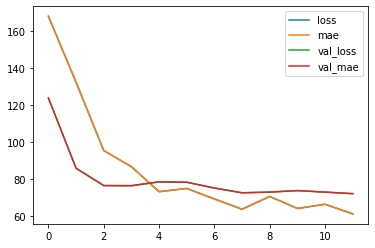

1/1 [==============================] - 0s 245ms/step - loss: 94.8859 - mae: 94.8859
[94.88591003417969, 94.88591003417969]
1/1 [==============================] - 0s 152ms/step
receta 0 kcal_true: 1541.0 kcal_pred: 1397.4255  precisión: 90.7 %
receta 0 carbohydrate_true: 0.54 carbohydrate_pred: 142.3617  precisión: 0.4 %
receta 0 protein_true: 189.0 protein_pred: 80.24577  precisión: 42.5 %
receta 0 total_fat_true: 82.25 total_fat_pred: 47.453117  precisión: 57.7 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1268.0 kcal_pred: 1399.605  precisión: 90.6 %
receta 1 carbohydrate_true: 120.0 carbohydrate_pred: 125.07787  precisión: 95.9 %
receta 1 protein_true: 71.4 protein_pred: 83.82483  precisión: 85.1 %
receta 1 total_fat_true: 57.38 total_fat_pred: 49.662876  precisión: 86.6 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1672.0 kcal_pred: 1263.3308  precisión: 75.6 %
receta 2 carbohydr

100%|██████████| 100/100 [00:20<00:00,  4.85it/s]


Epoch 793/804
10/10 [==============================] - 2s 185ms/step - loss: 197.4445 - mae: 197.4445 - val_loss: 161.0423 - val_mae: 161.0423
Epoch 794/804
10/10 [==============================] - 2s 180ms/step - loss: 130.0131 - mae: 130.0131 - val_loss: 95.4089 - val_mae: 95.4089
Epoch 795/804
10/10 [==============================] - 2s 227ms/step - loss: 79.1135 - mae: 79.1135 - val_loss: 54.5550 - val_mae: 54.5550
Epoch 796/804
10/10 [==============================] - 2s 219ms/step - loss: 55.6627 - mae: 55.6627 - val_loss: 41.2484 - val_mae: 41.2484
Epoch 797/804
10/10 [==============================] - 2s 204ms/step - loss: 48.3916 - mae: 48.3916 - val_loss: 38.4505 - val_mae: 38.4505
Epoch 798/804
10/10 [==============================] - 2s 209ms/step - loss: 44.4118 - mae: 44.4118 - val_loss: 38.2019 - val_mae: 38.2019
Epoch 799/804
10/10 [==============================] - 2s 209ms/step - loss: 40.8402 - mae: 40.8402 - val_loss: 38.1421 - val_mae: 38.1421
Epoch 800/804
10/10 [

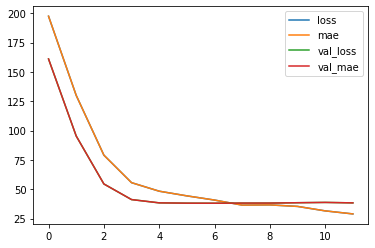

1/1 [==============================] - 0s 216ms/step - loss: 61.5643 - mae: 61.5643
[61.5643196105957, 61.5643196105957]
1/1 [==============================] - 0s 158ms/step
receta 0 kcal_true: 401.0 kcal_pred: 560.24225  precisión: 71.6 %
receta 0 carbohydrate_true: 108.44 carbohydrate_pred: 49.211422  precisión: 45.4 %
receta 0 protein_true: 0.08 protein_pred: 29.206226  precisión: 0.3 %
receta 0 total_fat_true: 0.32 total_fat_pred: 17.453417  precisión: 1.8 %
---------------------------------------------------------------------------
receta 1 kcal_true: 800.0 kcal_pred: 597.9069  precisión: 74.7 %
receta 1 carbohydrate_true: 200.8 carbohydrate_pred: 83.098  precisión: 41.4 %
receta 1 protein_true: 2.64 protein_pred: 18.840973  precisión: 14.0 %
receta 1 total_fat_true: 1.31 total_fat_pred: 11.441818  precisión: 11.4 %
---------------------------------------------------------------------------
receta 2 kcal_true: 603.5 kcal_pred: 542.3919  precisión: 89.9 %
receta 2 carbohydrate_true

100%|██████████| 100/100 [00:20<00:00,  4.85it/s]


Epoch 804/815
10/10 [==============================] - 3s 216ms/step - loss: 117.2080 - mae: 117.2080 - val_loss: 124.6045 - val_mae: 124.6045
Epoch 805/815
10/10 [==============================] - 2s 202ms/step - loss: 97.7120 - mae: 97.7120 - val_loss: 101.7985 - val_mae: 101.7985
Epoch 806/815
10/10 [==============================] - 2s 223ms/step - loss: 70.8302 - mae: 70.8302 - val_loss: 83.8775 - val_mae: 83.8775
Epoch 807/815
10/10 [==============================] - 2s 225ms/step - loss: 57.4428 - mae: 57.4428 - val_loss: 77.0292 - val_mae: 77.0292
Epoch 808/815
10/10 [==============================] - 2s 229ms/step - loss: 56.7885 - mae: 56.7885 - val_loss: 77.1387 - val_mae: 77.1387
Epoch 809/815
10/10 [==============================] - 2s 219ms/step - loss: 47.8155 - mae: 47.8155 - val_loss: 77.8854 - val_mae: 77.8854
Epoch 810/815
10/10 [==============================] - 2s 221ms/step - loss: 47.4399 - mae: 47.4399 - val_loss: 76.4337 - val_mae: 76.4337
Epoch 811/815
10/10 [

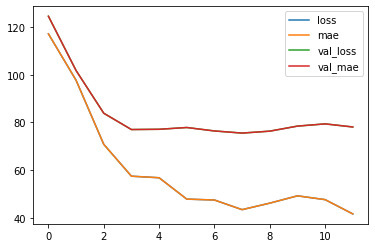

1/1 [==============================] - 0s 338ms/step - loss: 62.5717 - mae: 62.5717
[62.571746826171875, 62.571746826171875]
1/1 [==============================] - 0s 239ms/step
receta 0 kcal_true: 856.0 kcal_pred: 999.28076  precisión: 85.7 %
receta 0 carbohydrate_true: 85.0 carbohydrate_pred: 124.68609  precisión: 68.2 %
receta 0 protein_true: 28.05 protein_pred: 38.172447  precisión: 73.5 %
receta 0 total_fat_true: 51.3 total_fat_pred: 27.412453  precisión: 53.4 %
---------------------------------------------------------------------------
receta 1 kcal_true: 921.5 kcal_pred: 942.6413  precisión: 97.8 %
receta 1 carbohydrate_true: 204.1 carbohydrate_pred: 138.90138  precisión: 68.0 %
receta 1 protein_true: 16.08 protein_pred: 30.444914  precisión: 52.8 %
receta 1 total_fat_true: 4.63 total_fat_pred: 20.88408  precisión: 22.2 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1073.0 kcal_pred: 855.71844  precisión: 79.8 %
receta 2 carbohy

100%|██████████| 100/100 [00:20<00:00,  4.85it/s]


Epoch 815/826
10/10 [==============================] - 3s 177ms/step - loss: 168.1031 - mae: 168.1031 - val_loss: 134.1917 - val_mae: 134.1917
Epoch 816/826
10/10 [==============================] - 2s 164ms/step - loss: 120.6674 - mae: 120.6674 - val_loss: 86.9959 - val_mae: 86.9959
Epoch 817/826
10/10 [==============================] - 2s 194ms/step - loss: 101.0225 - mae: 101.0225 - val_loss: 76.2297 - val_mae: 76.2297
Epoch 818/826
10/10 [==============================] - 2s 198ms/step - loss: 86.8966 - mae: 86.8966 - val_loss: 77.0100 - val_mae: 77.0100
Epoch 819/826
10/10 [==============================] - 2s 195ms/step - loss: 74.3745 - mae: 74.3745 - val_loss: 77.6175 - val_mae: 77.6175
Epoch 820/826
10/10 [==============================] - 2s 208ms/step - loss: 77.1567 - mae: 77.1567 - val_loss: 76.5586 - val_mae: 76.5586
Epoch 821/826
10/10 [==============================] - 2s 196ms/step - loss: 69.7458 - mae: 69.7458 - val_loss: 76.1557 - val_mae: 76.1557
Epoch 822/826
10/10

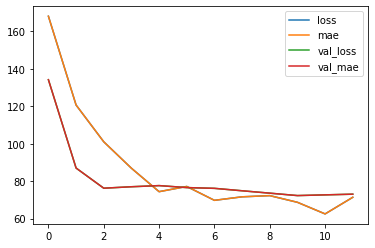

1/1 [==============================] - 0s 239ms/step - loss: 52.8585 - mae: 52.8585
[52.85853576660156, 52.85853576660156]
1/1 [==============================] - 0s 151ms/step
receta 0 kcal_true: 1362.0 kcal_pred: 1260.2002  precisión: 92.5 %
receta 0 carbohydrate_true: 102.6 carbohydrate_pred: 67.13541  precisión: 65.4 %
receta 0 protein_true: 68.25 protein_pred: 90.68457  precisión: 75.3 %
receta 0 total_fat_true: 78.94 total_fat_pred: 53.983566  precisión: 68.4 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1242.0 kcal_pred: 1227.6147  precisión: 98.8 %
receta 1 carbohydrate_true: 22.36 carbohydrate_pred: 39.0  precisión: 57.3 %
receta 1 protein_true: 147.5 protein_pred: 104.25953  precisión: 70.7 %
receta 1 total_fat_true: 65.4 total_fat_pred: 56.67385  precisión: 86.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1276.0 kcal_pred: 1324.3546  precisión: 96.3 %
receta 2 carbohydrat

100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


Epoch 826/837
10/10 [==============================] - 2s 179ms/step - loss: 183.2512 - mae: 183.2512 - val_loss: 148.8058 - val_mae: 148.8058
Epoch 827/837
10/10 [==============================] - 2s 158ms/step - loss: 119.9723 - mae: 119.9723 - val_loss: 89.0613 - val_mae: 89.0613
Epoch 828/837
10/10 [==============================] - 2s 204ms/step - loss: 70.1933 - mae: 70.1933 - val_loss: 53.6545 - val_mae: 53.6545
Epoch 829/837
10/10 [==============================] - 2s 199ms/step - loss: 57.5262 - mae: 57.5262 - val_loss: 45.5896 - val_mae: 45.5896
Epoch 830/837
10/10 [==============================] - 2s 196ms/step - loss: 48.7081 - mae: 48.7081 - val_loss: 46.2746 - val_mae: 46.2746
Epoch 831/837
10/10 [==============================] - 2s 189ms/step - loss: 43.0923 - mae: 43.0923 - val_loss: 47.3952 - val_mae: 47.3952
Epoch 832/837
10/10 [==============================] - 2s 197ms/step - loss: 37.0784 - mae: 37.0784 - val_loss: 47.7975 - val_mae: 47.7975
Epoch 833/837
10/10 [

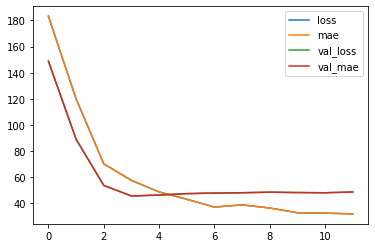

1/1 [==============================] - 0s 238ms/step - loss: 30.4722 - mae: 30.4722
[30.472246170043945, 30.472246170043945]
1/1 [==============================] - 0s 150ms/step
receta 0 kcal_true: 678.5 kcal_pred: 604.99524  precisión: 89.2 %
receta 0 carbohydrate_true: 31.4 carbohydrate_pred: 93.889984  precisión: 33.5 %
receta 0 protein_true: 86.44 protein_pred: 18.557247  precisión: 21.5 %
receta 0 total_fat_true: 20.34 total_fat_pred: 8.297066  precisión: 40.8 %
---------------------------------------------------------------------------
receta 1 kcal_true: 714.5 kcal_pred: 732.9973  precisión: 97.5 %
receta 1 carbohydrate_true: 166.9 carbohydrate_pred: 107.41333  precisión: 64.4 %
receta 1 protein_true: 10.7 protein_pred: 22.985954  precisión: 46.6 %
receta 1 total_fat_true: 6.8 total_fat_pred: 10.580275  precisión: 64.3 %
---------------------------------------------------------------------------
receta 2 kcal_true: 453.5 kcal_pred: 529.9637  precisión: 85.6 %
receta 2 carbohydra

100%|██████████| 100/100 [00:20<00:00,  4.82it/s]


Epoch 837/848
10/10 [==============================] - 2s 181ms/step - loss: 115.9655 - mae: 115.9655 - val_loss: 118.3228 - val_mae: 118.3228
Epoch 838/848
10/10 [==============================] - 2s 168ms/step - loss: 85.0794 - mae: 85.0794 - val_loss: 86.9886 - val_mae: 86.9886
Epoch 839/848
10/10 [==============================] - 2s 204ms/step - loss: 61.9939 - mae: 61.9939 - val_loss: 66.1604 - val_mae: 66.1604
Epoch 840/848
10/10 [==============================] - 2s 193ms/step - loss: 63.5865 - mae: 63.5865 - val_loss: 62.4631 - val_mae: 62.4631
Epoch 841/848
10/10 [==============================] - 2s 193ms/step - loss: 57.5534 - mae: 57.5534 - val_loss: 63.3976 - val_mae: 63.3976
Epoch 842/848
10/10 [==============================] - 2s 195ms/step - loss: 50.8614 - mae: 50.8614 - val_loss: 63.4649 - val_mae: 63.4649
Epoch 843/848
10/10 [==============================] - 2s 206ms/step - loss: 48.1390 - mae: 48.1390 - val_loss: 64.4428 - val_mae: 64.4428
Epoch 844/848
10/10 [==

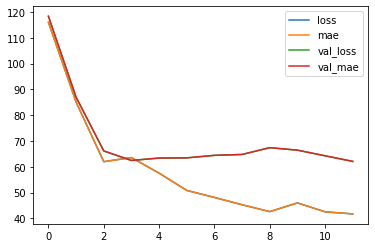

1/1 [==============================] - 0s 231ms/step - loss: 71.7617 - mae: 71.7617
[71.76171112060547, 71.76171112060547]
1/1 [==============================] - 0s 154ms/step
receta 0 kcal_true: 1003.5 kcal_pred: 910.0034  precisión: 90.7 %
receta 0 carbohydrate_true: 5.89 carbohydrate_pred: 52.181305  precisión: 11.3 %
receta 0 protein_true: 160.8 protein_pred: 69.69323  precisión: 43.4 %
receta 0 total_fat_true: 32.34 total_fat_pred: 35.52418  precisión: 91.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 895.5 kcal_pred: 832.5724  precisión: 93.0 %
receta 1 carbohydrate_true: 103.1 carbohydrate_pred: 149.87753  precisión: 68.8 %
receta 1 protein_true: 34.94 protein_pred: 22.432156  precisión: 64.2 %
receta 1 total_fat_true: 39.22 total_fat_pred: 12.538051  precisión: 32.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 963.5 kcal_pred: 856.18823  precisión: 88.9 %
receta 2 carbohydr

100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


Epoch 848/859
10/10 [==============================] - 2s 184ms/step - loss: 155.1861 - mae: 155.1861 - val_loss: 126.7226 - val_mae: 126.7226
Epoch 849/859
10/10 [==============================] - 2s 170ms/step - loss: 113.3381 - mae: 113.3381 - val_loss: 81.9464 - val_mae: 81.9464
Epoch 850/859
10/10 [==============================] - 2s 210ms/step - loss: 84.8389 - mae: 84.8389 - val_loss: 80.3190 - val_mae: 80.3190
Epoch 851/859
10/10 [==============================] - 2s 205ms/step - loss: 78.2999 - mae: 78.2999 - val_loss: 73.8050 - val_mae: 73.8050
Epoch 852/859
10/10 [==============================] - 2s 222ms/step - loss: 73.6813 - mae: 73.6813 - val_loss: 79.3971 - val_mae: 79.3971
Epoch 853/859
10/10 [==============================] - 2s 206ms/step - loss: 61.0068 - mae: 61.0068 - val_loss: 76.7960 - val_mae: 76.7960
Epoch 854/859
10/10 [==============================] - 2s 196ms/step - loss: 65.4773 - mae: 65.4773 - val_loss: 72.2675 - val_mae: 72.2675
Epoch 855/859
10/10 [

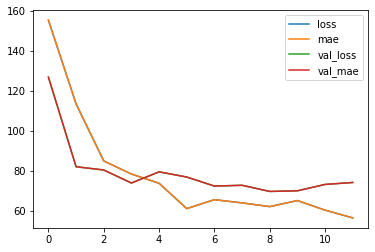

1/1 [==============================] - 0s 311ms/step - loss: 104.7876 - mae: 104.7876
[104.7875747680664, 104.7875747680664]
1/1 [==============================] - 0s 173ms/step
receta 0 kcal_true: 1697.0 kcal_pred: 1301.748  precisión: 76.7 %
receta 0 carbohydrate_true: 34.78 carbohydrate_pred: 85.09564  precisión: 40.9 %
receta 0 protein_true: 181.1 protein_pred: 89.877335  precisión: 49.6 %
receta 0 total_fat_true: 88.1 total_fat_pred: 56.621185  precisión: 64.3 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1443.0 kcal_pred: 1171.6375  precisión: 81.2 %
receta 1 carbohydrate_true: 128.4 carbohydrate_pred: 152.23022  precisión: 84.3 %
receta 1 protein_true: 31.92 protein_pred: 46.78341  precisión: 68.2 %
receta 1 total_fat_true: 97.94 total_fat_pred: 35.84161  precisión: 36.6 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1601.0 kcal_pred: 1354.9832  precisión: 84.6 %
receta 2 carbo

100%|██████████| 100/100 [00:20<00:00,  4.83it/s]


Epoch 859/870
10/10 [==============================] - 2s 183ms/step - loss: 189.8275 - mae: 189.8275 - val_loss: 171.8711 - val_mae: 171.8711
Epoch 860/870
10/10 [==============================] - 2s 179ms/step - loss: 119.9287 - mae: 119.9287 - val_loss: 107.4560 - val_mae: 107.4560
Epoch 861/870
10/10 [==============================] - 2s 214ms/step - loss: 66.8338 - mae: 66.8338 - val_loss: 71.3203 - val_mae: 71.3203
Epoch 862/870
10/10 [==============================] - 2s 203ms/step - loss: 50.3548 - mae: 50.3548 - val_loss: 57.3594 - val_mae: 57.3594
Epoch 863/870
10/10 [==============================] - 2s 195ms/step - loss: 47.3261 - mae: 47.3261 - val_loss: 53.8760 - val_mae: 53.8760
Epoch 864/870
10/10 [==============================] - 2s 197ms/step - loss: 41.6058 - mae: 41.6058 - val_loss: 52.7156 - val_mae: 52.7156
Epoch 865/870
10/10 [==============================] - 2s 214ms/step - loss: 38.6350 - mae: 38.6350 - val_loss: 52.3529 - val_mae: 52.3529
Epoch 866/870
10/10

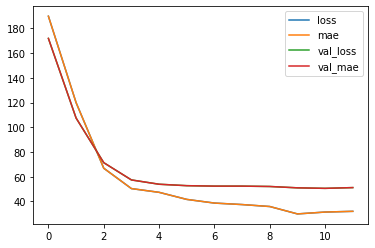

1/1 [==============================] - 0s 276ms/step - loss: 42.4549 - mae: 42.4549
[42.454856872558594, 42.454856872558594]
1/1 [==============================] - 0s 162ms/step
receta 0 kcal_true: 749.0 kcal_pred: 722.1045  precisión: 96.4 %
receta 0 carbohydrate_true: 154.1 carbohydrate_pred: 109.27942  precisión: 70.9 %
receta 0 protein_true: 17.92 protein_pred: 21.52999  precisión: 83.2 %
receta 0 total_fat_true: 9.03 total_fat_pred: 10.913778  precisión: 82.8 %
---------------------------------------------------------------------------
receta 1 kcal_true: 438.0 kcal_pred: 544.4115  precisión: 80.5 %
receta 1 carbohydrate_true: 33.03 carbohydrate_pred: 88.540054  precisión: 37.3 %
receta 1 protein_true: 42.88 protein_pred: 16.98299  precisión: 39.6 %
receta 1 total_fat_true: 15.81 total_fat_pred: 7.7196436  precisión: 48.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 676.0 kcal_pred: 466.72662  precisión: 69.0 %
receta 2 carbohyd

100%|██████████| 100/100 [00:20<00:00,  4.84it/s]


Epoch 870/881
10/10 [==============================] - 2s 186ms/step - loss: 115.4724 - mae: 115.4724 - val_loss: 136.3625 - val_mae: 136.3625
Epoch 871/881
10/10 [==============================] - 2s 178ms/step - loss: 90.8556 - mae: 90.8556 - val_loss: 107.1663 - val_mae: 107.1663
Epoch 872/881
10/10 [==============================] - 2s 201ms/step - loss: 61.4099 - mae: 61.4099 - val_loss: 77.7752 - val_mae: 77.7752
Epoch 873/881
10/10 [==============================] - 2s 203ms/step - loss: 55.1359 - mae: 55.1359 - val_loss: 68.5156 - val_mae: 68.5156
Epoch 874/881
10/10 [==============================] - 2s 207ms/step - loss: 51.8465 - mae: 51.8465 - val_loss: 72.6815 - val_mae: 72.6815
Epoch 875/881
10/10 [==============================] - 2s 202ms/step - loss: 54.4050 - mae: 54.4050 - val_loss: 77.5900 - val_mae: 77.5900
Epoch 876/881
10/10 [==============================] - 2s 202ms/step - loss: 49.5173 - mae: 49.5173 - val_loss: 77.7162 - val_mae: 77.7162
Epoch 877/881
10/10 [

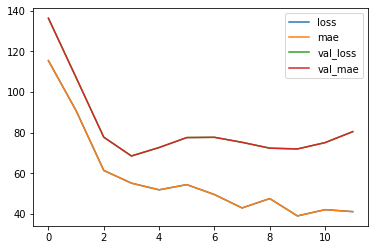

1/1 [==============================] - 0s 293ms/step - loss: 65.6148 - mae: 65.6148
[65.61479949951172, 65.61479949951172]
1/1 [==============================] - 0s 214ms/step
receta 0 kcal_true: 1067.0 kcal_pred: 871.1816  precisión: 81.6 %
receta 0 carbohydrate_true: 113.7 carbohydrate_pred: 126.16079  precisión: 90.1 %
receta 0 protein_true: 80.6 protein_pred: 34.937553  precisión: 43.3 %
receta 0 total_fat_true: 28.31 total_fat_pred: 20.39822  precisión: 72.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1131.0 kcal_pred: 968.7438  precisión: 85.7 %
receta 1 carbohydrate_true: 188.9 carbohydrate_pred: 123.98636  precisión: 65.6 %
receta 1 protein_true: 43.03 protein_pred: 45.4069  precisión: 94.8 %
receta 1 total_fat_true: 29.5 total_fat_pred: 25.392323  precisión: 86.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1065.0 kcal_pred: 959.00806  precisión: 90.0 %
receta 2 carbohydr

100%|██████████| 100/100 [00:20<00:00,  4.83it/s]


Epoch 881/892
10/10 [==============================] - 2s 183ms/step - loss: 171.2297 - mae: 171.2297 - val_loss: 161.6701 - val_mae: 161.6701
Epoch 882/892
10/10 [==============================] - 2s 162ms/step - loss: 118.8453 - mae: 118.8453 - val_loss: 112.1057 - val_mae: 112.1057
Epoch 883/892
10/10 [==============================] - 2s 219ms/step - loss: 91.0999 - mae: 91.0999 - val_loss: 87.8312 - val_mae: 87.8312
Epoch 884/892
10/10 [==============================] - 2s 201ms/step - loss: 83.5315 - mae: 83.5315 - val_loss: 93.8658 - val_mae: 93.8658
Epoch 885/892
10/10 [==============================] - 2s 211ms/step - loss: 66.3602 - mae: 66.3602 - val_loss: 100.0303 - val_mae: 100.0303
Epoch 886/892
10/10 [==============================] - 2s 207ms/step - loss: 69.9273 - mae: 69.9273 - val_loss: 102.7265 - val_mae: 102.7265
Epoch 887/892
10/10 [==============================] - 2s 207ms/step - loss: 61.9238 - mae: 61.9238 - val_loss: 94.8766 - val_mae: 94.8766
Epoch 888/892
1

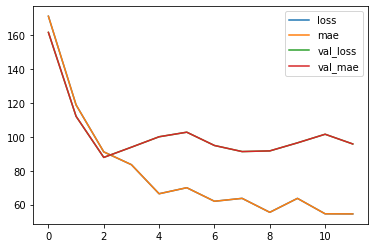

1/1 [==============================] - 0s 281ms/step - loss: 103.3323 - mae: 103.3323
[103.3322525024414, 103.3322525024414]
1/1 [==============================] - 0s 166ms/step
receta 0 kcal_true: 1559.0 kcal_pred: 1181.0192  precisión: 75.8 %
receta 0 carbohydrate_true: 349.5 carbohydrate_pred: 156.17538  precisión: 44.7 %
receta 0 protein_true: 51.6 protein_pred: 56.16528  precisión: 91.9 %
receta 0 total_fat_true: 8.74 total_fat_pred: 37.987293  precisión: 23.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1432.0 kcal_pred: 1116.8911  precisión: 78.0 %
receta 1 carbohydrate_true: 275.0 carbohydrate_pred: 134.36372  precisión: 48.9 %
receta 1 protein_true: 53.16 protein_pred: 55.37793  precisión: 96.0 %
receta 1 total_fat_true: 15.87 total_fat_pred: 37.670692  precisión: 42.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1440.0 kcal_pred: 1404.2631  precisión: 97.5 %
receta 2 carb

100%|██████████| 100/100 [00:20<00:00,  4.79it/s]


Epoch 892/903
10/10 [==============================] - 2s 185ms/step - loss: 202.5853 - mae: 202.5853 - val_loss: 172.4223 - val_mae: 172.4223
Epoch 893/903
10/10 [==============================] - 2s 168ms/step - loss: 132.2390 - mae: 132.2390 - val_loss: 106.9317 - val_mae: 106.9317
Epoch 894/903
10/10 [==============================] - 2s 192ms/step - loss: 75.2741 - mae: 75.2741 - val_loss: 61.2677 - val_mae: 61.2677
Epoch 895/903
10/10 [==============================] - 2s 202ms/step - loss: 54.4243 - mae: 54.4243 - val_loss: 45.1205 - val_mae: 45.1205
Epoch 896/903
10/10 [==============================] - 2s 205ms/step - loss: 47.3328 - mae: 47.3328 - val_loss: 42.5382 - val_mae: 42.5382
Epoch 897/903
10/10 [==============================] - 2s 202ms/step - loss: 44.7862 - mae: 44.7862 - val_loss: 41.9088 - val_mae: 41.9088
Epoch 898/903
10/10 [==============================] - 2s 214ms/step - loss: 44.1332 - mae: 44.1332 - val_loss: 42.1406 - val_mae: 42.1406
Epoch 899/903
10/10

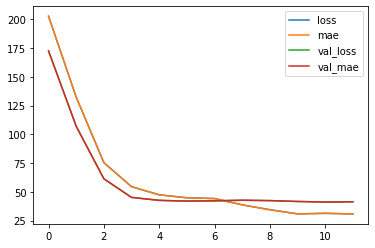

1/1 [==============================] - 0s 268ms/step - loss: 22.9597 - mae: 22.9597
[22.95970916748047, 22.95970916748047]
1/1 [==============================] - 0s 184ms/step
receta 0 kcal_true: 537.5 kcal_pred: 534.86786  precisión: 99.5 %
receta 0 carbohydrate_true: 4.95 carbohydrate_pred: 7.700197  precisión: 64.3 %
receta 0 protein_true: 44.0 protein_pred: 49.41632  precisión: 89.0 %
receta 0 total_fat_true: 37.12 total_fat_pred: 24.520466  precisión: 66.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 452.8 kcal_pred: 538.8347  precisión: 84.0 %
receta 1 carbohydrate_true: 0.73 carbohydrate_pred: 46.746933  precisión: 1.6 %
receta 1 protein_true: 94.5 protein_pred: 29.882763  precisión: 31.6 %
receta 1 total_fat_true: 8.1 total_fat_pred: 16.61713  precisión: 48.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 614.5 kcal_pred: 668.4783  precisión: 91.9 %
receta 2 carbohydrate_true

100%|██████████| 100/100 [00:20<00:00,  4.83it/s]


Epoch 903/914
10/10 [==============================] - 2s 186ms/step - loss: 121.3544 - mae: 121.3544 - val_loss: 107.9021 - val_mae: 107.9021
Epoch 904/914
10/10 [==============================] - 2s 193ms/step - loss: 93.7576 - mae: 93.7576 - val_loss: 81.2142 - val_mae: 81.2142
Epoch 905/914
10/10 [==============================] - 2s 195ms/step - loss: 62.2300 - mae: 62.2300 - val_loss: 64.7150 - val_mae: 64.7150
Epoch 906/914
10/10 [==============================] - 2s 199ms/step - loss: 58.2213 - mae: 58.2213 - val_loss: 60.3069 - val_mae: 60.3069
Epoch 907/914
10/10 [==============================] - 2s 201ms/step - loss: 49.8435 - mae: 49.8435 - val_loss: 63.2719 - val_mae: 63.2719
Epoch 908/914
10/10 [==============================] - 2s 203ms/step - loss: 48.2261 - mae: 48.2261 - val_loss: 65.9665 - val_mae: 65.9665
Epoch 909/914
10/10 [==============================] - 2s 205ms/step - loss: 46.8796 - mae: 46.8796 - val_loss: 64.6716 - val_mae: 64.6716
Epoch 910/914
10/10 [==

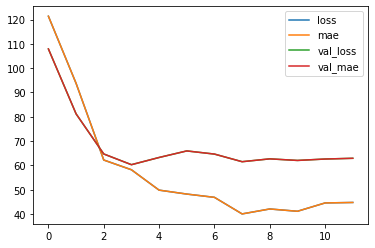

1/1 [==============================] - 0s 213ms/step - loss: 62.2126 - mae: 62.2126
[62.21260070800781, 62.21260070800781]
1/1 [==============================] - 0s 193ms/step
receta 0 kcal_true: 1171.0 kcal_pred: 983.0612  precisión: 84.0 %
receta 0 carbohydrate_true: 67.8 carbohydrate_pred: 145.21399  precisión: 46.7 %
receta 0 protein_true: 167.5 protein_pred: 36.57406  precisión: 21.8 %
receta 0 total_fat_true: 26.31 total_fat_pred: 22.75157  precisión: 86.5 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1174.0 kcal_pred: 973.5288  precisión: 82.9 %
receta 1 carbohydrate_true: 20.77 carbohydrate_pred: 41.698853  precisión: 49.8 %
receta 1 protein_true: 88.75 protein_pred: 74.8802  precisión: 84.4 %
receta 1 total_fat_true: 81.06 total_fat_pred: 45.88829  precisión: 56.6 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1167.0 kcal_pred: 1035.8232  precisión: 88.8 %
receta 2 carbohydra

100%|██████████| 100/100 [00:20<00:00,  4.81it/s]


Epoch 914/925
10/10 [==============================] - 2s 182ms/step - loss: 160.9189 - mae: 160.9189 - val_loss: 137.4835 - val_mae: 137.4835
Epoch 915/925
10/10 [==============================] - 2s 170ms/step - loss: 114.2256 - mae: 114.2256 - val_loss: 80.1001 - val_mae: 80.1001
Epoch 916/925
10/10 [==============================] - 2s 217ms/step - loss: 90.0527 - mae: 90.0527 - val_loss: 74.0371 - val_mae: 74.0371
Epoch 917/925
10/10 [==============================] - 2s 199ms/step - loss: 80.0073 - mae: 80.0073 - val_loss: 73.1597 - val_mae: 73.1597
Epoch 918/925
10/10 [==============================] - 2s 204ms/step - loss: 75.4411 - mae: 75.4411 - val_loss: 73.7885 - val_mae: 73.7885
Epoch 919/925
10/10 [==============================] - 2s 208ms/step - loss: 70.1265 - mae: 70.1265 - val_loss: 71.9205 - val_mae: 71.9205
Epoch 920/925
10/10 [==============================] - 2s 215ms/step - loss: 61.9226 - mae: 61.9226 - val_loss: 70.9790 - val_mae: 70.9790
Epoch 921/925
10/10 [

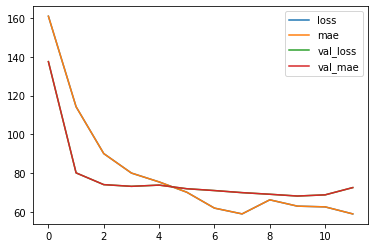

1/1 [==============================] - 0s 308ms/step - loss: 102.6435 - mae: 102.6435
[102.64352416992188, 102.64352416992188]
1/1 [==============================] - 0s 185ms/step
receta 0 kcal_true: 1549.0 kcal_pred: 1121.1993  precisión: 72.4 %
receta 0 carbohydrate_true: 263.5 carbohydrate_pred: 130.77101  precisión: 49.6 %
receta 0 protein_true: 69.75 protein_pred: 55.5714  precisión: 79.7 %
receta 0 total_fat_true: 27.97 total_fat_pred: 36.44828  precisión: 76.7 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1269.0 kcal_pred: 1351.9304  precisión: 93.9 %
receta 1 carbohydrate_true: 29.95 carbohydrate_pred: 174.41658  precisión: 17.2 %
receta 1 protein_true: 153.6 protein_pred: 64.45686  precisión: 42.0 %
receta 1 total_fat_true: 56.38 total_fat_pred: 39.899796  precisión: 70.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1584.0 kcal_pred: 1243.6046  precisión: 78.5 %
receta 2 ca

100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


Epoch 925/936
10/10 [==============================] - 2s 192ms/step - loss: 194.3094 - mae: 194.3094 - val_loss: 146.6420 - val_mae: 146.6420
Epoch 926/936
10/10 [==============================] - 2s 162ms/step - loss: 115.5658 - mae: 115.5658 - val_loss: 84.7166 - val_mae: 84.7166
Epoch 927/936
10/10 [==============================] - 2s 189ms/step - loss: 64.5190 - mae: 64.5190 - val_loss: 60.8639 - val_mae: 60.8639
Epoch 928/936
10/10 [==============================] - 2s 201ms/step - loss: 43.1547 - mae: 43.1547 - val_loss: 59.1359 - val_mae: 59.1359
Epoch 929/936
10/10 [==============================] - 2s 206ms/step - loss: 40.6411 - mae: 40.6411 - val_loss: 58.7644 - val_mae: 58.7644
Epoch 930/936
10/10 [==============================] - 2s 200ms/step - loss: 40.0086 - mae: 40.0086 - val_loss: 58.9351 - val_mae: 58.9351
Epoch 931/936
10/10 [==============================] - 2s 205ms/step - loss: 39.5765 - mae: 39.5765 - val_loss: 58.6841 - val_mae: 58.6841
Epoch 932/936
10/10 [

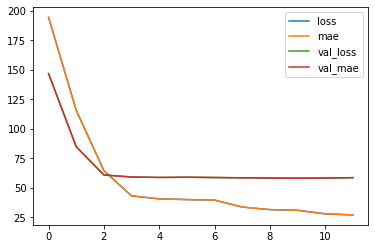

1/1 [==============================] - 0s 338ms/step - loss: 54.3102 - mae: 54.3102
[54.31022644042969, 54.31022644042969]
1/1 [==============================] - 0s 168ms/step
receta 0 kcal_true: 533.5 kcal_pred: 579.3089  precisión: 92.1 %
receta 0 carbohydrate_true: 31.22 carbohydrate_pred: 48.604393  precisión: 64.2 %
receta 0 protein_true: 68.1 protein_pred: 32.62389  precisión: 47.9 %
receta 0 total_fat_true: 16.55 total_fat_pred: 17.76701  precisión: 93.1 %
---------------------------------------------------------------------------
receta 1 kcal_true: 386.5 kcal_pred: 596.0852  precisión: 64.8 %
receta 1 carbohydrate_true: 48.9 carbohydrate_pred: 79.63987  precisión: 61.4 %
receta 1 protein_true: 40.47 protein_pred: 25.93031  precisión: 64.1 %
receta 1 total_fat_true: 1.69 total_fat_pred: 11.391108  precisión: 14.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 301.5 kcal_pred: 551.2295  precisión: 54.7 %
receta 2 carbohydrate_tr

100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


Epoch 936/947
10/10 [==============================] - 2s 183ms/step - loss: 121.3379 - mae: 121.3379 - val_loss: 108.7476 - val_mae: 108.7476
Epoch 937/947
10/10 [==============================] - 2s 165ms/step - loss: 103.0965 - mae: 103.0965 - val_loss: 77.2482 - val_mae: 77.2482
Epoch 938/947
10/10 [==============================] - 2s 188ms/step - loss: 70.0203 - mae: 70.0203 - val_loss: 50.4579 - val_mae: 50.4579
Epoch 939/947
10/10 [==============================] - 2s 199ms/step - loss: 66.1992 - mae: 66.1992 - val_loss: 51.9570 - val_mae: 51.9570
Epoch 940/947
10/10 [==============================] - 2s 204ms/step - loss: 60.6874 - mae: 60.6874 - val_loss: 50.1614 - val_mae: 50.1614
Epoch 941/947
10/10 [==============================] - 2s 203ms/step - loss: 52.4017 - mae: 52.4017 - val_loss: 52.4290 - val_mae: 52.4290
Epoch 942/947
10/10 [==============================] - 2s 216ms/step - loss: 51.8837 - mae: 51.8837 - val_loss: 51.4940 - val_mae: 51.4940
Epoch 943/947
10/10 [

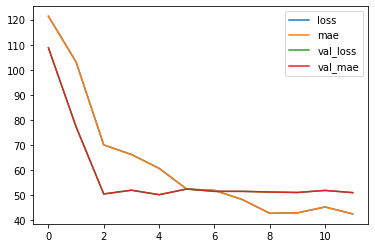

1/1 [==============================] - 0s 220ms/step - loss: 48.4177 - mae: 48.4177
[48.41773986816406, 48.41773986816406]
1/1 [==============================] - 0s 150ms/step
receta 0 kcal_true: 1138.0 kcal_pred: 1036.2635  precisión: 91.1 %
receta 0 carbohydrate_true: 161.0 carbohydrate_pred: 216.53111  precisión: 74.4 %
receta 0 protein_true: 55.94 protein_pred: 27.953468  precisión: 50.0 %
receta 0 total_fat_true: 32.78 total_fat_pred: 8.846642  precisión: 27.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1006.0 kcal_pred: 827.85754  precisión: 82.3 %
receta 1 carbohydrate_true: 132.0 carbohydrate_pred: 121.88417  precisión: 92.3 %
receta 1 protein_true: 36.62 protein_pred: 34.127987  precisión: 93.2 %
receta 1 total_fat_true: 10.82 total_fat_pred: 17.745415  precisión: 61.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 993.5 kcal_pred: 875.6946  precisión: 88.1 %
receta 2 carbo

100%|██████████| 100/100 [00:21<00:00,  4.65it/s]


Epoch 947/958
10/10 [==============================] - 2s 183ms/step - loss: 162.2065 - mae: 162.2065 - val_loss: 162.4237 - val_mae: 162.4237
Epoch 948/958
10/10 [==============================] - 2s 183ms/step - loss: 116.2147 - mae: 116.2147 - val_loss: 113.4415 - val_mae: 113.4415
Epoch 949/958
10/10 [==============================] - 2s 200ms/step - loss: 89.9357 - mae: 89.9357 - val_loss: 83.7196 - val_mae: 83.7196
Epoch 950/958
10/10 [==============================] - 2s 197ms/step - loss: 86.6383 - mae: 86.6383 - val_loss: 82.2644 - val_mae: 82.2644
Epoch 951/958
10/10 [==============================] - 2s 194ms/step - loss: 81.2697 - mae: 81.2697 - val_loss: 95.6539 - val_mae: 95.6539
Epoch 952/958
10/10 [==============================] - 2s 201ms/step - loss: 65.4962 - mae: 65.4962 - val_loss: 103.3033 - val_mae: 103.3033
Epoch 953/958
10/10 [==============================] - 2s 212ms/step - loss: 72.6080 - mae: 72.6080 - val_loss: 96.9986 - val_mae: 96.9986
Epoch 954/958
10/

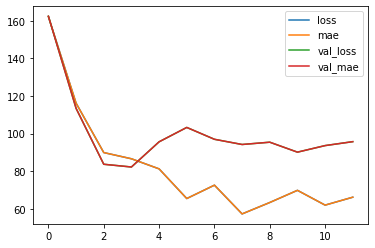

1/1 [==============================] - 0s 224ms/step - loss: 92.8833 - mae: 92.8833
[92.88330078125, 92.88330078125]
1/1 [==============================] - 0s 158ms/step
receta 0 kcal_true: 1514.0 kcal_pred: 1974.1921  precisión: 76.7 %
receta 0 carbohydrate_true: 268.5 carbohydrate_pred: 267.15506  precisión: 99.5 %
receta 0 protein_true: 54.97 protein_pred: 79.55981  precisión: 69.1 %
receta 0 total_fat_true: 11.69 total_fat_pred: 56.922146  precisión: 20.5 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1365.0 kcal_pred: 1029.774  precisión: 75.4 %
receta 1 carbohydrate_true: 10.72 carbohydrate_pred: 146.00502  precisión: 7.3 %
receta 1 protein_true: 123.6 protein_pred: 42.330578  precisión: 34.2 %
receta 1 total_fat_true: 89.3 total_fat_pred: 28.597975  precisión: 32.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1374.0 kcal_pred: 1239.4396  precisión: 90.2 %
receta 2 carbohydrate

100%|██████████| 100/100 [00:22<00:00,  4.47it/s]


Epoch 958/969
10/10 [==============================] - 3s 199ms/step - loss: 189.4730 - mae: 189.4730 - val_loss: 159.4221 - val_mae: 159.4221
Epoch 959/969
10/10 [==============================] - 2s 173ms/step - loss: 115.9096 - mae: 115.9096 - val_loss: 97.7633 - val_mae: 97.7633
Epoch 960/969
10/10 [==============================] - 2s 225ms/step - loss: 68.5270 - mae: 68.5270 - val_loss: 62.9257 - val_mae: 62.9257
Epoch 961/969
10/10 [==============================] - 2s 214ms/step - loss: 47.6284 - mae: 47.6284 - val_loss: 51.4203 - val_mae: 51.4203
Epoch 962/969
10/10 [==============================] - 2s 217ms/step - loss: 44.1896 - mae: 44.1896 - val_loss: 50.4874 - val_mae: 50.4874
Epoch 963/969
10/10 [==============================] - 2s 215ms/step - loss: 42.3910 - mae: 42.3910 - val_loss: 50.1479 - val_mae: 50.1479
Epoch 964/969
10/10 [==============================] - 2s 227ms/step - loss: 41.3509 - mae: 41.3509 - val_loss: 49.8583 - val_mae: 49.8583
Epoch 965/969
10/10 [

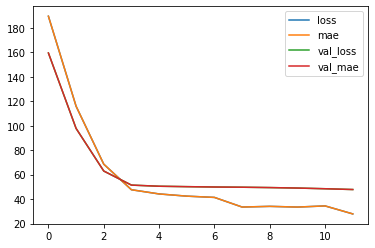

1/1 [==============================] - 0s 241ms/step - loss: 76.6938 - mae: 76.6938
[76.69383239746094, 76.69383239746094]
1/1 [==============================] - 0s 163ms/step
receta 0 kcal_true: 380.0 kcal_pred: 619.3322  precisión: 61.4 %
receta 0 carbohydrate_true: 72.2 carbohydrate_pred: 72.722565  precisión: 99.3 %
receta 0 protein_true: 15.12 protein_pred: 31.186342  precisión: 48.5 %
receta 0 total_fat_true: 4.54 total_fat_pred: 14.531048  precisión: 31.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 512.5 kcal_pred: 586.05084  precisión: 87.4 %
receta 1 carbohydrate_true: 117.4 carbohydrate_pred: 48.67891  precisión: 41.5 %
receta 1 protein_true: 13.74 protein_pred: 43.931812  precisión: 31.3 %
receta 1 total_fat_true: 0.8 total_fat_pred: 16.482912  precisión: 4.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 390.2 kcal_pred: 675.6891  precisión: 57.8 %
receta 2 carbohydrate_

100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


Epoch 969/980
10/10 [==============================] - 2s 191ms/step - loss: 112.7155 - mae: 112.7155 - val_loss: 103.9006 - val_mae: 103.9006
Epoch 970/980
10/10 [==============================] - 2s 172ms/step - loss: 89.4621 - mae: 89.4621 - val_loss: 73.8940 - val_mae: 73.8940
Epoch 971/980
10/10 [==============================] - 2s 168ms/step - loss: 65.2438 - mae: 65.2438 - val_loss: 47.8428 - val_mae: 47.8428
Epoch 972/980
10/10 [==============================] - 2s 199ms/step - loss: 50.0609 - mae: 50.0609 - val_loss: 42.0394 - val_mae: 42.0394
Epoch 973/980
10/10 [==============================] - 2s 202ms/step - loss: 49.8734 - mae: 49.8734 - val_loss: 44.0880 - val_mae: 44.0880
Epoch 974/980
10/10 [==============================] - 2s 204ms/step - loss: 49.7604 - mae: 49.7604 - val_loss: 47.6052 - val_mae: 47.6052
Epoch 975/980
10/10 [==============================] - 2s 216ms/step - loss: 46.3852 - mae: 46.3852 - val_loss: 50.1331 - val_mae: 50.1331
Epoch 976/980
10/10 [==

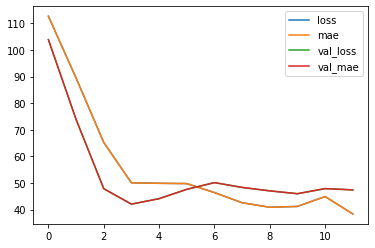

1/1 [==============================] - 0s 221ms/step - loss: 56.0064 - mae: 56.0064
[56.00638198852539, 56.00638198852539]
1/1 [==============================] - 0s 177ms/step
receta 0 kcal_true: 914.5 kcal_pred: 875.4791  precisión: 95.7 %
receta 0 carbohydrate_true: 15.74 carbohydrate_pred: 109.89997  precisión: 14.3 %
receta 0 protein_true: 71.9 protein_pred: 43.301292  precisión: 60.2 %
receta 0 total_fat_true: 60.1 total_fat_pred: 24.050314  precisión: 40.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1136.0 kcal_pred: 898.00354  precisión: 79.0 %
receta 1 carbohydrate_true: 77.5 carbohydrate_pred: 51.31289  precisión: 66.2 %
receta 1 protein_true: 80.06 protein_pred: 68.77976  precisión: 85.9 %
receta 1 total_fat_true: 48.53 total_fat_pred: 36.970886  precisión: 76.2 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1026.0 kcal_pred: 919.7643  precisión: 89.6 %
receta 2 carbohydra

100%|██████████| 100/100 [00:21<00:00,  4.69it/s]


Epoch 980/991
10/10 [==============================] - 2s 189ms/step - loss: 153.6944 - mae: 153.6944 - val_loss: 111.0353 - val_mae: 111.0353
Epoch 981/991
10/10 [==============================] - 2s 173ms/step - loss: 105.7318 - mae: 105.7318 - val_loss: 73.4219 - val_mae: 73.4219
Epoch 982/991
10/10 [==============================] - 2s 213ms/step - loss: 88.7848 - mae: 88.7848 - val_loss: 77.3148 - val_mae: 77.3148
Epoch 983/991
10/10 [==============================] - 2s 206ms/step - loss: 76.1829 - mae: 76.1829 - val_loss: 72.2423 - val_mae: 72.2423
Epoch 984/991
10/10 [==============================] - 2s 207ms/step - loss: 72.3807 - mae: 72.3807 - val_loss: 68.3500 - val_mae: 68.3500
Epoch 985/991
10/10 [==============================] - 2s 198ms/step - loss: 68.7566 - mae: 68.7566 - val_loss: 67.1927 - val_mae: 67.1927
Epoch 986/991
10/10 [==============================] - 2s 217ms/step - loss: 68.2757 - mae: 68.2757 - val_loss: 65.8069 - val_mae: 65.8069
Epoch 987/991
10/10 [

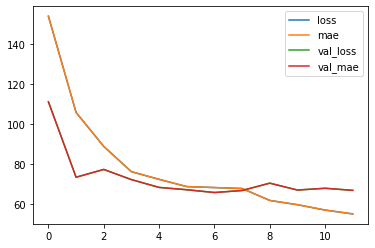

1/1 [==============================] - 0s 284ms/step - loss: 88.7635 - mae: 88.7635
[88.76348114013672, 88.76348114013672]
1/1 [==============================] - 0s 191ms/step
receta 0 kcal_true: 1478.0 kcal_pred: 1432.6207  precisión: 96.9 %
receta 0 carbohydrate_true: 281.0 carbohydrate_pred: 142.51543  precisión: 50.7 %
receta 0 protein_true: 71.0 protein_pred: 84.99333  precisión: 83.5 %
receta 0 total_fat_true: 14.64 total_fat_pred: 50.352528  precisión: 29.1 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1513.0 kcal_pred: 1667.8407  precisión: 90.7 %
receta 1 carbohydrate_true: 125.56 carbohydrate_pred: 162.4303  precisión: 77.3 %
receta 1 protein_true: 109.2 protein_pred: 104.039406  precisión: 95.3 %
receta 1 total_fat_true: 65.25 total_fat_pred: 58.57479  precisión: 89.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1604.0 kcal_pred: 1145.6771  precisión: 71.4 %
receta 2 carb

100%|██████████| 100/100 [00:21<00:00,  4.65it/s]


Epoch 991/1002
10/10 [==============================] - 2s 185ms/step - loss: 195.6281 - mae: 195.6281 - val_loss: 133.9144 - val_mae: 133.9144
Epoch 992/1002
10/10 [==============================] - 2s 168ms/step - loss: 128.3483 - mae: 128.3483 - val_loss: 78.9963 - val_mae: 78.9963
Epoch 993/1002
10/10 [==============================] - 2s 211ms/step - loss: 81.0408 - mae: 81.0408 - val_loss: 52.7503 - val_mae: 52.7503
Epoch 994/1002
10/10 [==============================] - 2s 200ms/step - loss: 53.2797 - mae: 53.2797 - val_loss: 53.2979 - val_mae: 53.2979
Epoch 995/1002
10/10 [==============================] - 2s 206ms/step - loss: 45.9472 - mae: 45.9472 - val_loss: 56.9332 - val_mae: 56.9332
Epoch 996/1002
10/10 [==============================] - 2s 204ms/step - loss: 43.4156 - mae: 43.4156 - val_loss: 58.8232 - val_mae: 58.8232
Epoch 997/1002
10/10 [==============================] - 2s 214ms/step - loss: 39.3376 - mae: 39.3376 - val_loss: 58.5598 - val_mae: 58.5598
Epoch 998/1002

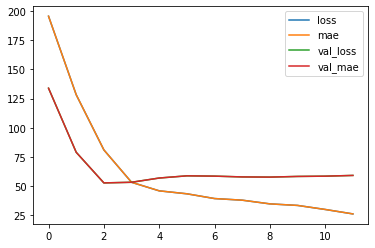

1/1 [==============================] - 0s 230ms/step - loss: 36.1755 - mae: 36.1755
[36.17546844482422, 36.17546844482422]
1/1 [==============================] - 0s 160ms/step
receta 0 kcal_true: 439.8 kcal_pred: 520.69446  precisión: 84.5 %
receta 0 carbohydrate_true: 10.32 carbohydrate_pred: 20.334846  precisión: 50.8 %
receta 0 protein_true: 24.84 protein_pred: 45.620857  precisión: 54.5 %
receta 0 total_fat_true: 33.78 total_fat_pred: 21.228918  precisión: 62.8 %
---------------------------------------------------------------------------
receta 1 kcal_true: 552.0 kcal_pred: 521.145  precisión: 94.4 %
receta 1 carbohydrate_true: 119.6 carbohydrate_pred: 62.032063  precisión: 51.9 %
receta 1 protein_true: 20.28 protein_pred: 21.752542  precisión: 93.2 %
receta 1 total_fat_true: 3.61 total_fat_pred: 12.908378  precisión: 28.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 466.0 kcal_pred: 545.3789  precisión: 85.4 %
receta 2 carbohydr

100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


Epoch 1002/1013
10/10 [==============================] - 2s 189ms/step - loss: 132.5865 - mae: 132.5865 - val_loss: 126.1074 - val_mae: 126.1074
Epoch 1003/1013
10/10 [==============================] - 2s 168ms/step - loss: 114.3086 - mae: 114.3086 - val_loss: 100.4953 - val_mae: 100.4953
Epoch 1004/1013
10/10 [==============================] - 2s 205ms/step - loss: 73.1067 - mae: 73.1067 - val_loss: 75.2011 - val_mae: 75.2011
Epoch 1005/1013
10/10 [==============================] - 2s 203ms/step - loss: 61.2138 - mae: 61.2138 - val_loss: 69.0039 - val_mae: 69.0039
Epoch 1006/1013
10/10 [==============================] - 2s 209ms/step - loss: 56.9693 - mae: 56.9693 - val_loss: 68.5714 - val_mae: 68.5714
Epoch 1007/1013
10/10 [==============================] - 2s 198ms/step - loss: 53.4318 - mae: 53.4318 - val_loss: 70.7697 - val_mae: 70.7697
Epoch 1008/1013
10/10 [==============================] - 2s 214ms/step - loss: 47.9781 - mae: 47.9781 - val_loss: 70.3951 - val_mae: 70.3951
Epoch

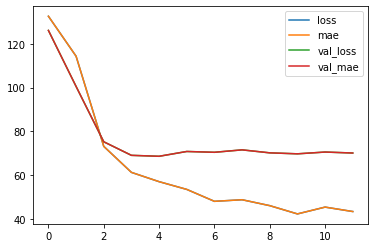

1/1 [==============================] - 0s 265ms/step - loss: 41.2381 - mae: 41.2381
[41.23809051513672, 41.23809051513672]
1/1 [==============================] - 0s 152ms/step
receta 0 kcal_true: 847.0 kcal_pred: 959.00635  precisión: 88.3 %
receta 0 carbohydrate_true: 122.0 carbohydrate_pred: 133.45343  precisión: 91.4 %
receta 0 protein_true: 66.25 protein_pred: 36.2782  precisión: 54.8 %
receta 0 total_fat_true: 13.77 total_fat_pred: 23.438725  precisión: 58.8 %
---------------------------------------------------------------------------
receta 1 kcal_true: 895.0 kcal_pred: 865.65686  precisión: 96.7 %
receta 1 carbohydrate_true: 94.3 carbohydrate_pred: 71.834885  precisión: 76.2 %
receta 1 protein_true: 34.12 protein_pred: 56.335964  precisión: 60.6 %
receta 1 total_fat_true: 42.72 total_fat_pred: 30.490097  precisión: 71.4 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1058.0 kcal_pred: 870.4006  precisión: 82.3 %
receta 2 carbohyd

100%|██████████| 100/100 [00:21<00:00,  4.68it/s]


Epoch 1013/1024
10/10 [==============================] - 2s 191ms/step - loss: 165.6335 - mae: 165.6335 - val_loss: 150.9397 - val_mae: 150.9397
Epoch 1014/1024
10/10 [==============================] - 2s 164ms/step - loss: 117.7129 - mae: 117.7129 - val_loss: 111.9153 - val_mae: 111.9153
Epoch 1015/1024
10/10 [==============================] - 2s 215ms/step - loss: 90.2294 - mae: 90.2294 - val_loss: 100.5881 - val_mae: 100.5881
Epoch 1016/1024
10/10 [==============================] - 2s 204ms/step - loss: 83.2895 - mae: 83.2895 - val_loss: 95.9119 - val_mae: 95.9119
Epoch 1017/1024
10/10 [==============================] - 2s 202ms/step - loss: 76.5829 - mae: 76.5829 - val_loss: 95.7953 - val_mae: 95.7953
Epoch 1018/1024
10/10 [==============================] - 2s 204ms/step - loss: 71.7583 - mae: 71.7583 - val_loss: 98.4822 - val_mae: 98.4822
Epoch 1019/1024
10/10 [==============================] - 2s 215ms/step - loss: 71.9477 - mae: 71.9477 - val_loss: 95.7802 - val_mae: 95.7802
Epo

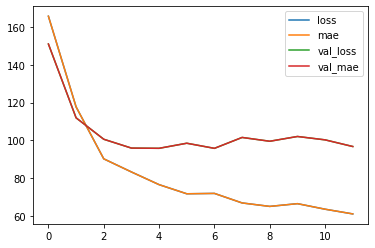

1/1 [==============================] - 0s 212ms/step - loss: 77.0986 - mae: 77.0986
[77.09864807128906, 77.09864807128906]
1/1 [==============================] - 0s 164ms/step
receta 0 kcal_true: 1382.0 kcal_pred: 1118.5442  precisión: 80.9 %
receta 0 carbohydrate_true: 64.6 carbohydrate_pred: 93.67899  precisión: 69.0 %
receta 0 protein_true: 138.4 protein_pred: 67.77733  precisión: 49.0 %
receta 0 total_fat_true: 62.34 total_fat_pred: 43.971695  precisión: 70.5 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1287.0 kcal_pred: 1353.3524  precisión: 95.1 %
receta 1 carbohydrate_true: 207.4 carbohydrate_pred: 196.24367  precisión: 94.6 %
receta 1 protein_true: 33.25 protein_pred: 47.184155  precisión: 70.5 %
receta 1 total_fat_true: 38.44 total_fat_pred: 34.04233  precisión: 88.6 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1347.0 kcal_pred: 1427.2898  precisión: 94.4 %
receta 2 carboh

100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


Epoch 1024/1035
10/10 [==============================] - 2s 190ms/step - loss: 200.3386 - mae: 200.3386 - val_loss: 159.3712 - val_mae: 159.3712
Epoch 1025/1035
10/10 [==============================] - 2s 176ms/step - loss: 132.9419 - mae: 132.9419 - val_loss: 92.5422 - val_mae: 92.5422
Epoch 1026/1035
10/10 [==============================] - 2s 215ms/step - loss: 74.2156 - mae: 74.2156 - val_loss: 55.1111 - val_mae: 55.1111
Epoch 1027/1035
10/10 [==============================] - 2s 205ms/step - loss: 51.9692 - mae: 51.9692 - val_loss: 41.4659 - val_mae: 41.4659
Epoch 1028/1035
10/10 [==============================] - 2s 206ms/step - loss: 36.2892 - mae: 36.2892 - val_loss: 39.2427 - val_mae: 39.2427
Epoch 1029/1035
10/10 [==============================] - 2s 206ms/step - loss: 40.4952 - mae: 40.4952 - val_loss: 39.3994 - val_mae: 39.3994
Epoch 1030/1035
10/10 [==============================] - 2s 204ms/step - loss: 35.7791 - mae: 35.7791 - val_loss: 39.5196 - val_mae: 39.5196
Epoch 1

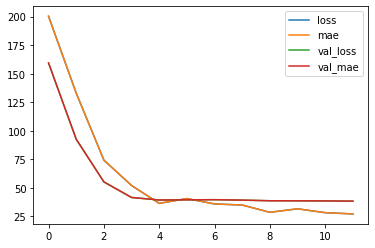

1/1 [==============================] - 0s 222ms/step - loss: 40.4301 - mae: 40.4301
[40.43009948730469, 40.43009948730469]
1/1 [==============================] - 0s 262ms/step
receta 0 kcal_true: 363.0 kcal_pred: 523.7263  precisión: 69.3 %
receta 0 carbohydrate_true: 58.1 carbohydrate_pred: 47.937733  precisión: 82.5 %
receta 0 protein_true: 15.2 protein_pred: 31.057234  precisión: 49.0 %
receta 0 total_fat_true: 10.55 total_fat_pred: 14.897511  precisión: 70.8 %
---------------------------------------------------------------------------
receta 1 kcal_true: 637.5 kcal_pred: 586.96313  precisión: 92.1 %
receta 1 carbohydrate_true: 9.24 carbohydrate_pred: 113.31835  precisión: 8.2 %
receta 1 protein_true: 73.9 protein_pred: 15.415569  precisión: 20.9 %
receta 1 total_fat_true: 30.64 total_fat_pred: 2.0603259  precisión: 6.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 575.5 kcal_pred: 473.35724  precisión: 82.3 %
receta 2 carbohydrate

100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


Epoch 1035/1046
10/10 [==============================] - 2s 189ms/step - loss: 120.2084 - mae: 120.2084 - val_loss: 108.9495 - val_mae: 108.9495
Epoch 1036/1046
10/10 [==============================] - 2s 163ms/step - loss: 98.2587 - mae: 98.2587 - val_loss: 79.4709 - val_mae: 79.4709
Epoch 1037/1046
10/10 [==============================] - 2s 206ms/step - loss: 70.5835 - mae: 70.5835 - val_loss: 50.9125 - val_mae: 50.9125
Epoch 1038/1046
10/10 [==============================] - 2s 209ms/step - loss: 60.8916 - mae: 60.8916 - val_loss: 47.7537 - val_mae: 47.7537
Epoch 1039/1046
10/10 [==============================] - 2s 205ms/step - loss: 56.1274 - mae: 56.1274 - val_loss: 48.0415 - val_mae: 48.0415
Epoch 1040/1046
10/10 [==============================] - 2s 204ms/step - loss: 51.5293 - mae: 51.5293 - val_loss: 48.1976 - val_mae: 48.1976
Epoch 1041/1046
10/10 [==============================] - 2s 210ms/step - loss: 50.4536 - mae: 50.4536 - val_loss: 46.8513 - val_mae: 46.8513
Epoch 104

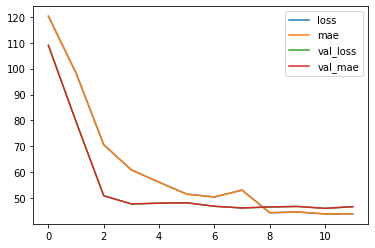

1/1 [==============================] - 0s 288ms/step - loss: 58.3400 - mae: 58.3400
[58.339962005615234, 58.339962005615234]
1/1 [==============================] - 0s 149ms/step
receta 0 kcal_true: 1122.0 kcal_pred: 1049.9441  precisión: 93.6 %
receta 0 carbohydrate_true: 3.98 carbohydrate_pred: 34.209694  precisión: 11.6 %
receta 0 protein_true: 71.5 protein_pred: 95.31132  precisión: 75.0 %
receta 0 total_fat_true: 91.2 total_fat_pred: 47.925224  precisión: 52.6 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1035.0 kcal_pred: 944.7223  precisión: 91.3 %
receta 1 carbohydrate_true: 6.88 carbohydrate_pred: 40.18155  precisión: 17.1 %
receta 1 protein_true: 151.0 protein_pred: 82.10532  precisión: 54.4 %
receta 1 total_fat_true: 40.03 total_fat_pred: 40.9723  precisión: 97.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 817.0 kcal_pred: 975.32623  precisión: 83.8 %
receta 2 carbohydrat

100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


Epoch 1046/1057
10/10 [==============================] - 2s 188ms/step - loss: 158.4382 - mae: 158.4382 - val_loss: 121.7376 - val_mae: 121.7376
Epoch 1047/1057
10/10 [==============================] - 2s 186ms/step - loss: 113.3076 - mae: 113.3076 - val_loss: 74.1574 - val_mae: 74.1574
Epoch 1048/1057
10/10 [==============================] - 2s 201ms/step - loss: 80.3326 - mae: 80.3326 - val_loss: 71.4779 - val_mae: 71.4779
Epoch 1049/1057
10/10 [==============================] - 2s 204ms/step - loss: 76.1739 - mae: 76.1739 - val_loss: 72.1620 - val_mae: 72.1620
Epoch 1050/1057
10/10 [==============================] - 2s 217ms/step - loss: 69.1538 - mae: 69.1538 - val_loss: 72.2453 - val_mae: 72.2453
Epoch 1051/1057
10/10 [==============================] - 2s 206ms/step - loss: 65.6896 - mae: 65.6896 - val_loss: 73.3864 - val_mae: 73.3864
Epoch 1052/1057
10/10 [==============================] - 2s 214ms/step - loss: 63.3732 - mae: 63.3732 - val_loss: 75.2007 - val_mae: 75.2007
Epoch 1

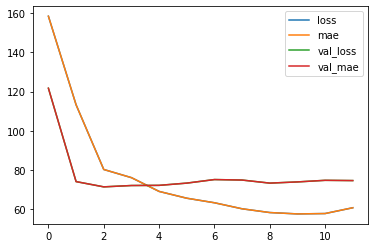

1/1 [==============================] - 0s 275ms/step - loss: 84.6100 - mae: 84.6100
[84.61003112792969, 84.61003112792969]
1/1 [==============================] - 0s 147ms/step
receta 0 kcal_true: 1584.0 kcal_pred: 1370.07  precisión: 86.5 %
receta 0 carbohydrate_true: 315.0 carbohydrate_pred: 182.10553  precisión: 57.8 %
receta 0 protein_true: 53.62 protein_pred: 63.74772  precisión: 84.1 %
receta 0 total_fat_true: 25.16 total_fat_pred: 39.51589  precisión: 63.7 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1303.0 kcal_pred: 1549.8993  precisión: 84.1 %
receta 1 carbohydrate_true: 257.0 carbohydrate_pred: 219.13286  precisión: 85.3 %
receta 1 protein_true: 42.62 protein_pred: 67.93079  precisión: 62.7 %
receta 1 total_fat_true: 18.4 total_fat_pred: 41.59274  precisión: 44.3 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1222.0 kcal_pred: 1064.5375  precisión: 87.1 %
receta 2 carbohydr

100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


Epoch 1057/1068
10/10 [==============================] - 2s 183ms/step - loss: 195.9542 - mae: 195.9542 - val_loss: 151.1787 - val_mae: 151.1787
Epoch 1058/1068
10/10 [==============================] - 2s 166ms/step - loss: 121.0556 - mae: 121.0556 - val_loss: 90.5738 - val_mae: 90.5738
Epoch 1059/1068
10/10 [==============================] - 2s 190ms/step - loss: 77.0371 - mae: 77.0371 - val_loss: 55.9461 - val_mae: 55.9461
Epoch 1060/1068
10/10 [==============================] - 2s 208ms/step - loss: 51.1254 - mae: 51.1254 - val_loss: 47.8531 - val_mae: 47.8531
Epoch 1061/1068
10/10 [==============================] - 2s 215ms/step - loss: 44.8710 - mae: 44.8710 - val_loss: 46.4678 - val_mae: 46.4678
Epoch 1062/1068
10/10 [==============================] - 2s 207ms/step - loss: 40.0530 - mae: 40.0530 - val_loss: 46.6883 - val_mae: 46.6883
Epoch 1063/1068
10/10 [==============================] - 2s 206ms/step - loss: 38.0707 - mae: 38.0707 - val_loss: 46.1143 - val_mae: 46.1143
Epoch 1

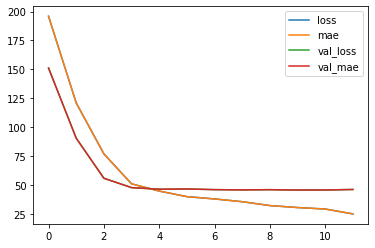

1/1 [==============================] - 0s 259ms/step - loss: 54.9500 - mae: 54.9500
[54.95000076293945, 54.95000076293945]
1/1 [==============================] - 0s 154ms/step
receta 0 kcal_true: 767.0 kcal_pred: 674.4293  precisión: 87.9 %
receta 0 carbohydrate_true: 165.1 carbohydrate_pred: 109.37462  precisión: 66.2 %
receta 0 protein_true: 31.52 protein_pred: 19.558773  precisión: 62.1 %
receta 0 total_fat_true: 6.11 total_fat_pred: 9.992201  precisión: 61.1 %
---------------------------------------------------------------------------
receta 1 kcal_true: 752.0 kcal_pred: 611.3163  precisión: 81.3 %
receta 1 carbohydrate_true: 4.37 carbohydrate_pred: 57.829823  precisión: 7.6 %
receta 1 protein_true: 45.12 protein_pred: 34.92985  precisión: 77.4 %
receta 1 total_fat_true: 62.4 total_fat_pred: 18.584793  precisión: 29.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 461.2 kcal_pred: 573.0522  precisión: 80.5 %
receta 2 carbohydrate_t

100%|██████████| 100/100 [00:21<00:00,  4.63it/s]


Epoch 1068/1079
10/10 [==============================] - 2s 188ms/step - loss: 124.1700 - mae: 124.1700 - val_loss: 105.8789 - val_mae: 105.8789
Epoch 1069/1079
10/10 [==============================] - 2s 164ms/step - loss: 99.2646 - mae: 99.2646 - val_loss: 81.2149 - val_mae: 81.2149
Epoch 1070/1079
10/10 [==============================] - 2s 221ms/step - loss: 68.9604 - mae: 68.9604 - val_loss: 57.1554 - val_mae: 57.1554
Epoch 1071/1079
10/10 [==============================] - 2s 213ms/step - loss: 58.9243 - mae: 58.9243 - val_loss: 52.5365 - val_mae: 52.5365
Epoch 1072/1079
10/10 [==============================] - 2s 210ms/step - loss: 54.1821 - mae: 54.1821 - val_loss: 52.6441 - val_mae: 52.6441
Epoch 1073/1079
10/10 [==============================] - 2s 205ms/step - loss: 54.7931 - mae: 54.7931 - val_loss: 55.2032 - val_mae: 55.2032
Epoch 1074/1079
10/10 [==============================] - 2s 220ms/step - loss: 49.9647 - mae: 49.9647 - val_loss: 53.9607 - val_mae: 53.9607
Epoch 107

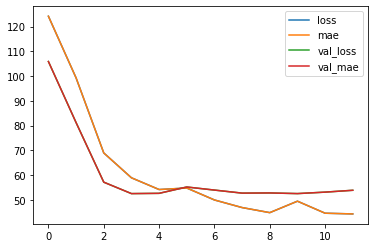

1/1 [==============================] - 0s 269ms/step - loss: 47.0256 - mae: 47.0256
[47.02561569213867, 47.02561569213867]
1/1 [==============================] - 0s 153ms/step
receta 0 kcal_true: 863.5 kcal_pred: 857.89105  precisión: 99.4 %
receta 0 carbohydrate_true: 214.5 carbohydrate_pred: 59.333557  precisión: 27.7 %
receta 0 protein_true: 6.67 protein_pred: 57.63732  precisión: 11.6 %
receta 0 total_fat_true: 3.37 total_fat_pred: 33.534813  precisión: 10.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 864.5 kcal_pred: 843.50494  precisión: 97.6 %
receta 1 carbohydrate_true: 36.4 carbohydrate_pred: 104.02243  precisión: 35.0 %
receta 1 protein_true: 46.12 protein_pred: 37.51298  precisión: 81.3 %
receta 1 total_fat_true: 14.33 total_fat_pred: 23.192108  precisión: 61.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 945.0 kcal_pred: 776.84045  precisión: 82.2 %
receta 2 carbohydra

100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


Epoch 1079/1090
10/10 [==============================] - 2s 189ms/step - loss: 153.9887 - mae: 153.9887 - val_loss: 160.4469 - val_mae: 160.4469
Epoch 1080/1090
10/10 [==============================] - 2s 174ms/step - loss: 109.5513 - mae: 109.5513 - val_loss: 109.9074 - val_mae: 109.9074
Epoch 1081/1090
10/10 [==============================] - 2s 196ms/step - loss: 84.5086 - mae: 84.5086 - val_loss: 80.8744 - val_mae: 80.8744
Epoch 1082/1090
10/10 [==============================] - 2s 203ms/step - loss: 77.5025 - mae: 77.5025 - val_loss: 86.5672 - val_mae: 86.5672
Epoch 1083/1090
10/10 [==============================] - 2s 202ms/step - loss: 70.5424 - mae: 70.5424 - val_loss: 95.4615 - val_mae: 95.4615
Epoch 1084/1090
10/10 [==============================] - 2s 216ms/step - loss: 59.8083 - mae: 59.8083 - val_loss: 96.9939 - val_mae: 96.9939
Epoch 1085/1090
10/10 [==============================] - 2s 203ms/step - loss: 65.1738 - mae: 65.1738 - val_loss: 92.5968 - val_mae: 92.5968
Epoch

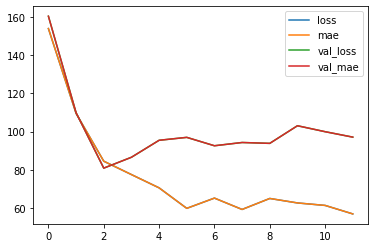

1/1 [==============================] - 0s 221ms/step - loss: 90.7953 - mae: 90.7953
[90.7952651977539, 90.7952651977539]
1/1 [==============================] - 0s 156ms/step
receta 0 kcal_true: 1538.0 kcal_pred: 1166.2394  precisión: 75.8 %
receta 0 carbohydrate_true: 59.28 carbohydrate_pred: 88.772736  precisión: 66.8 %
receta 0 protein_true: 112.75 protein_pred: 88.989204  precisión: 78.9 %
receta 0 total_fat_true: 93.6 total_fat_pred: 43.50522  precisión: 46.5 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1334.0 kcal_pred: 1389.9608  precisión: 96.0 %
receta 1 carbohydrate_true: 106.6 carbohydrate_pred: 157.41776  precisión: 67.7 %
receta 1 protein_true: 112.1 protein_pred: 82.31627  precisión: 73.4 %
receta 1 total_fat_true: 47.6 total_fat_pred: 41.269012  precisión: 86.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1440.0 kcal_pred: 1116.0505  precisión: 77.5 %
receta 2 carbohy

100%|██████████| 100/100 [00:22<00:00,  4.51it/s]


Epoch 1090/1101
10/10 [==============================] - 2s 185ms/step - loss: 193.9948 - mae: 193.9948 - val_loss: 166.3240 - val_mae: 166.3240
Epoch 1091/1101
10/10 [==============================] - 2s 178ms/step - loss: 131.7098 - mae: 131.7098 - val_loss: 102.8045 - val_mae: 102.8045
Epoch 1092/1101
10/10 [==============================] - 2s 220ms/step - loss: 74.8270 - mae: 74.8270 - val_loss: 65.9652 - val_mae: 65.9652
Epoch 1093/1101
10/10 [==============================] - 2s 218ms/step - loss: 53.0475 - mae: 53.0475 - val_loss: 50.5496 - val_mae: 50.5496
Epoch 1094/1101
10/10 [==============================] - 2s 230ms/step - loss: 43.3453 - mae: 43.3453 - val_loss: 47.1844 - val_mae: 47.1844
Epoch 1095/1101
10/10 [==============================] - 2s 210ms/step - loss: 40.9693 - mae: 40.9693 - val_loss: 46.1987 - val_mae: 46.1987
Epoch 1096/1101
10/10 [==============================] - 2s 212ms/step - loss: 35.9592 - mae: 35.9592 - val_loss: 46.4044 - val_mae: 46.4044
Epoch

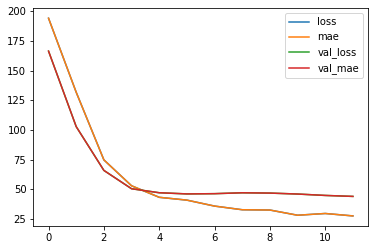

1/1 [==============================] - 0s 211ms/step - loss: 43.0842 - mae: 43.0842
[43.08417892456055, 43.08417892456055]
1/1 [==============================] - 0s 174ms/step
receta 0 kcal_true: 716.5 kcal_pred: 644.538  precisión: 90.0 %
receta 0 carbohydrate_true: 24.48 carbohydrate_pred: 25.595367  precisión: 95.7 %
receta 0 protein_true: 3.66 protein_pred: 55.26184  precisión: 6.6 %
receta 0 total_fat_true: 1.28 total_fat_pred: 23.738346  precisión: 5.4 %
---------------------------------------------------------------------------
receta 1 kcal_true: 620.0 kcal_pred: 524.82153  precisión: 84.6 %
receta 1 carbohydrate_true: 113.4 carbohydrate_pred: 48.8303  precisión: 43.1 %
receta 1 protein_true: 17.95 protein_pred: 29.135237  precisión: 61.6 %
receta 1 total_fat_true: 10.21 total_fat_pred: 14.783832  precisión: 69.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 362.5 kcal_pred: 630.45825  precisión: 57.5 %
receta 2 carbohydrate_t

100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


Epoch 1101/1112
10/10 [==============================] - 2s 185ms/step - loss: 124.9361 - mae: 124.9361 - val_loss: 109.8572 - val_mae: 109.8572
Epoch 1102/1112
10/10 [==============================] - 2s 166ms/step - loss: 102.6652 - mae: 102.6652 - val_loss: 81.9026 - val_mae: 81.9026
Epoch 1103/1112
10/10 [==============================] - 2s 203ms/step - loss: 68.1684 - mae: 68.1684 - val_loss: 66.8518 - val_mae: 66.8518
Epoch 1104/1112
10/10 [==============================] - 2s 201ms/step - loss: 56.3814 - mae: 56.3814 - val_loss: 68.0629 - val_mae: 68.0629
Epoch 1105/1112
10/10 [==============================] - 2s 221ms/step - loss: 48.7921 - mae: 48.7921 - val_loss: 66.2160 - val_mae: 66.2160
Epoch 1106/1112
10/10 [==============================] - 2s 208ms/step - loss: 48.9730 - mae: 48.9730 - val_loss: 64.7688 - val_mae: 64.7688
Epoch 1107/1112
10/10 [==============================] - 2s 203ms/step - loss: 43.3072 - mae: 43.3072 - val_loss: 65.1113 - val_mae: 65.1113
Epoch 1

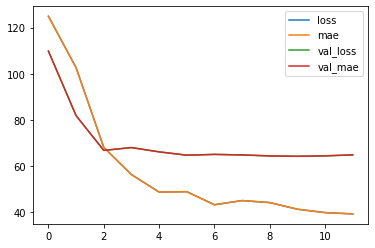

1/1 [==============================] - 0s 215ms/step - loss: 63.2300 - mae: 63.2300
[63.22996139526367, 63.22996139526367]
1/1 [==============================] - 0s 170ms/step
receta 0 kcal_true: 992.5 kcal_pred: 999.3271  precisión: 99.3 %
receta 0 carbohydrate_true: 80.7 carbohydrate_pred: 69.60902  precisión: 86.3 %
receta 0 protein_true: 90.44 protein_pred: 66.679634  precisión: 73.7 %
receta 0 total_fat_true: 40.06 total_fat_pred: 44.289284  precisión: 90.5 %
---------------------------------------------------------------------------
receta 1 kcal_true: 920.0 kcal_pred: 830.13007  precisión: 90.2 %
receta 1 carbohydrate_true: 134.4 carbohydrate_pred: 85.31686  precisión: 63.5 %
receta 1 protein_true: 35.28 protein_pred: 46.5496  precisión: 75.8 %
receta 1 total_fat_true: 27.23 total_fat_pred: 30.754066  precisión: 88.6 %
---------------------------------------------------------------------------
receta 2 kcal_true: 985.5 kcal_pred: 1161.6755  precisión: 84.8 %
receta 2 carbohydrat

100%|██████████| 100/100 [00:21<00:00,  4.68it/s]


Epoch 1112/1123
10/10 [==============================] - 2s 197ms/step - loss: 143.0921 - mae: 143.0921 - val_loss: 140.6089 - val_mae: 140.6089
Epoch 1113/1123
10/10 [==============================] - 2s 182ms/step - loss: 105.0296 - mae: 105.0296 - val_loss: 110.9860 - val_mae: 110.9860
Epoch 1114/1123
10/10 [==============================] - 2s 205ms/step - loss: 85.1729 - mae: 85.1729 - val_loss: 103.9394 - val_mae: 103.9394
Epoch 1115/1123
10/10 [==============================] - 2s 203ms/step - loss: 85.9261 - mae: 85.9261 - val_loss: 97.2159 - val_mae: 97.2159
Epoch 1116/1123
10/10 [==============================] - 2s 221ms/step - loss: 74.9109 - mae: 74.9109 - val_loss: 99.8601 - val_mae: 99.8601
Epoch 1117/1123
10/10 [==============================] - 2s 212ms/step - loss: 67.1920 - mae: 67.1920 - val_loss: 98.5474 - val_mae: 98.5474
Epoch 1118/1123
10/10 [==============================] - 2s 208ms/step - loss: 60.0772 - mae: 60.0772 - val_loss: 93.8622 - val_mae: 93.8622
Epo

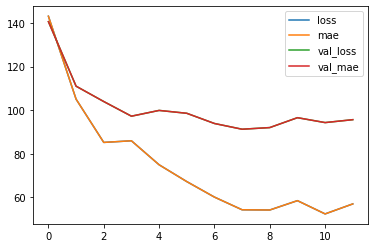

1/1 [==============================] - 0s 236ms/step - loss: 104.2234 - mae: 104.2234
[104.22343444824219, 104.22343444824219]
1/1 [==============================] - 0s 151ms/step
receta 0 kcal_true: 1675.0 kcal_pred: 1172.8762  precisión: 70.0 %
receta 0 carbohydrate_true: 153.1 carbohydrate_pred: 46.80264  precisión: 30.6 %
receta 0 protein_true: 115.8 protein_pred: 105.68653  precisión: 91.3 %
receta 0 total_fat_true: 66.0 total_fat_pred: 50.267895  precisión: 76.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1597.0 kcal_pred: 1355.627  precisión: 84.9 %
receta 1 carbohydrate_true: 127.44 carbohydrate_pred: 182.00552  precisión: 70.0 %
receta 1 protein_true: 51.38 protein_pred: 68.90811  precisión: 74.6 %
receta 1 total_fat_true: 102.5 total_fat_pred: 34.52267  precisión: 33.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1412.0 kcal_pred: 1327.4402  precisión: 94.0 %
receta 2 ca

100%|██████████| 100/100 [00:21<00:00,  4.65it/s]


Epoch 1123/1134
10/10 [==============================] - 2s 191ms/step - loss: 187.8520 - mae: 187.8520 - val_loss: 156.3093 - val_mae: 156.3093
Epoch 1124/1134
10/10 [==============================] - 2s 166ms/step - loss: 112.7745 - mae: 112.7745 - val_loss: 96.1970 - val_mae: 96.1970
Epoch 1125/1134
10/10 [==============================] - 2s 208ms/step - loss: 65.0041 - mae: 65.0041 - val_loss: 63.4893 - val_mae: 63.4893
Epoch 1126/1134
10/10 [==============================] - 2s 206ms/step - loss: 50.6385 - mae: 50.6385 - val_loss: 55.0268 - val_mae: 55.0268
Epoch 1127/1134
10/10 [==============================] - 2s 204ms/step - loss: 44.1505 - mae: 44.1505 - val_loss: 52.6125 - val_mae: 52.6125
Epoch 1128/1134
10/10 [==============================] - 2s 203ms/step - loss: 37.2054 - mae: 37.2054 - val_loss: 51.6564 - val_mae: 51.6564
Epoch 1129/1134
10/10 [==============================] - 2s 211ms/step - loss: 36.0200 - mae: 36.0200 - val_loss: 51.4160 - val_mae: 51.4160
Epoch 1

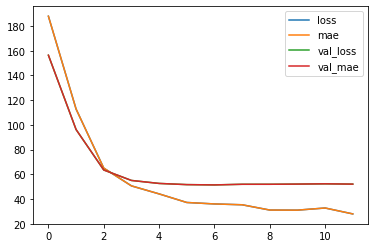

1/1 [==============================] - 0s 257ms/step - loss: 41.4104 - mae: 41.4104
[41.410438537597656, 41.410438537597656]
1/1 [==============================] - 0s 152ms/step
receta 0 kcal_true: 743.0 kcal_pred: 669.4747  precisión: 90.1 %
receta 0 carbohydrate_true: 178.2 carbohydrate_pred: 108.593  precisión: 60.9 %
receta 0 protein_true: 14.95 protein_pred: 21.582233  precisión: 69.3 %
receta 0 total_fat_true: 2.97 total_fat_pred: 11.823642  precisión: 25.1 %
---------------------------------------------------------------------------
receta 1 kcal_true: 513.0 kcal_pred: 634.62103  precisión: 80.8 %
receta 1 carbohydrate_true: 53.97 carbohydrate_pred: 91.920235  precisión: 58.7 %
receta 1 protein_true: 6.61 protein_pred: 24.460207  precisión: 27.0 %
receta 1 total_fat_true: 32.06 total_fat_pred: 12.882414  precisión: 40.2 %
---------------------------------------------------------------------------
receta 2 kcal_true: 518.5 kcal_pred: 639.1709  precisión: 81.1 %
receta 2 carbohydr

100%|██████████| 100/100 [00:21<00:00,  4.69it/s]


Epoch 1134/1145
10/10 [==============================] - 2s 189ms/step - loss: 124.9266 - mae: 124.9266 - val_loss: 90.0074 - val_mae: 90.0074
Epoch 1135/1145
10/10 [==============================] - 2s 197ms/step - loss: 99.6470 - mae: 99.6470 - val_loss: 64.4002 - val_mae: 64.4002
Epoch 1136/1145
10/10 [==============================] - 2s 208ms/step - loss: 75.5692 - mae: 75.5692 - val_loss: 48.6956 - val_mae: 48.6956
Epoch 1137/1145
10/10 [==============================] - 2s 208ms/step - loss: 66.2726 - mae: 66.2726 - val_loss: 47.1332 - val_mae: 47.1332
Epoch 1138/1145
10/10 [==============================] - 2s 201ms/step - loss: 59.1169 - mae: 59.1169 - val_loss: 47.1339 - val_mae: 47.1339
Epoch 1139/1145
10/10 [==============================] - 2s 219ms/step - loss: 58.3857 - mae: 58.3857 - val_loss: 48.9948 - val_mae: 48.9948
Epoch 1140/1145
10/10 [==============================] - 2s 208ms/step - loss: 54.3083 - mae: 54.3083 - val_loss: 49.9897 - val_mae: 49.9897
Epoch 1141/

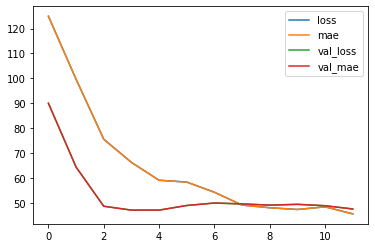

1/1 [==============================] - 0s 287ms/step - loss: 64.5600 - mae: 64.5600
[64.55995178222656, 64.55995178222656]
1/1 [==============================] - 0s 144ms/step
receta 0 kcal_true: 950.5 kcal_pred: 857.29004  precisión: 90.2 %
receta 0 carbohydrate_true: 100.5 carbohydrate_pred: 128.36508  precisión: 78.3 %
receta 0 protein_true: 63.28 protein_pred: 36.294403  precisión: 57.4 %
receta 0 total_fat_true: 35.22 total_fat_pred: 20.22914  precisión: 57.4 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1098.0 kcal_pred: 1195.0172  precisión: 91.9 %
receta 1 carbohydrate_true: 175.4 carbohydrate_pred: 142.30092  precisión: 81.1 %
receta 1 protein_true: 16.81 protein_pred: 57.956688  precisión: 29.0 %
receta 1 total_fat_true: 14.69 total_fat_pred: 34.880157  precisión: 42.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 841.5 kcal_pred: 1092.281  precisión: 77.0 %
receta 2 carboh

100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


Epoch 1145/1156
10/10 [==============================] - 2s 189ms/step - loss: 154.1160 - mae: 154.1160 - val_loss: 85.5697 - val_mae: 85.5697
Epoch 1146/1156
10/10 [==============================] - 2s 164ms/step - loss: 113.6143 - mae: 113.6143 - val_loss: 61.3042 - val_mae: 61.3042
Epoch 1147/1156
10/10 [==============================] - 2s 201ms/step - loss: 88.9830 - mae: 88.9830 - val_loss: 73.8146 - val_mae: 73.8146
Epoch 1148/1156
10/10 [==============================] - 2s 204ms/step - loss: 83.2032 - mae: 83.2032 - val_loss: 65.9701 - val_mae: 65.9701
Epoch 1149/1156
10/10 [==============================] - 2s 207ms/step - loss: 73.2431 - mae: 73.2431 - val_loss: 61.9163 - val_mae: 61.9163
Epoch 1150/1156
10/10 [==============================] - 2s 203ms/step - loss: 69.6101 - mae: 69.6101 - val_loss: 63.3654 - val_mae: 63.3654
Epoch 1151/1156
10/10 [==============================] - 2s 212ms/step - loss: 63.7131 - mae: 63.7131 - val_loss: 64.2582 - val_mae: 64.2582
Epoch 115

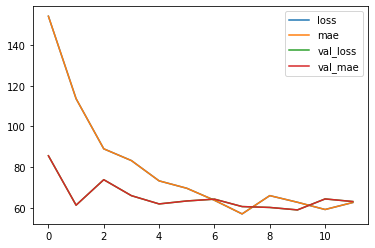

1/1 [==============================] - 0s 230ms/step - loss: 98.1605 - mae: 98.1605
[98.16049194335938, 98.16049194335938]
1/1 [==============================] - 0s 154ms/step
receta 0 kcal_true: 1605.0 kcal_pred: 1524.6624  precisión: 95.0 %
receta 0 carbohydrate_true: 298.5 carbohydrate_pred: 52.619564  precisión: 17.6 %
receta 0 protein_true: 49.25 protein_pred: 116.36394  precisión: 42.3 %
receta 0 total_fat_true: 21.64 total_fat_pred: 73.78639  precisión: 29.3 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1300.0 kcal_pred: 1317.5055  precisión: 98.7 %
receta 1 carbohydrate_true: 146.6 carbohydrate_pred: 84.85029  precisión: 57.9 %
receta 1 protein_true: 65.7 protein_pred: 89.62016  precisión: 73.3 %
receta 1 total_fat_true: 63.06 total_fat_pred: 53.72478  precisión: 85.2 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1568.0 kcal_pred: 1212.295  precisión: 77.3 %
receta 2 carbohyd

100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


Epoch 1156/1167
10/10 [==============================] - 2s 191ms/step - loss: 211.9512 - mae: 211.9512 - val_loss: 160.1022 - val_mae: 160.1022
Epoch 1157/1167
10/10 [==============================] - 2s 166ms/step - loss: 133.8189 - mae: 133.8189 - val_loss: 93.0704 - val_mae: 93.0704
Epoch 1158/1167
10/10 [==============================] - 2s 205ms/step - loss: 73.8338 - mae: 73.8338 - val_loss: 61.0207 - val_mae: 61.0207
Epoch 1159/1167
10/10 [==============================] - 2s 207ms/step - loss: 46.4157 - mae: 46.4157 - val_loss: 55.5005 - val_mae: 55.5005
Epoch 1160/1167
10/10 [==============================] - 2s 211ms/step - loss: 42.1028 - mae: 42.1028 - val_loss: 55.7329 - val_mae: 55.7329
Epoch 1161/1167
10/10 [==============================] - 2s 211ms/step - loss: 38.6104 - mae: 38.6104 - val_loss: 56.3446 - val_mae: 56.3446
Epoch 1162/1167
10/10 [==============================] - 2s 203ms/step - loss: 38.8605 - mae: 38.8605 - val_loss: 56.5804 - val_mae: 56.5804
Epoch 1

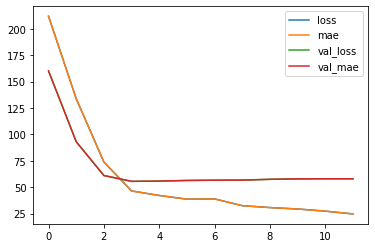

1/1 [==============================] - 0s 359ms/step - loss: 79.8422 - mae: 79.8422
[79.84220886230469, 79.84220886230469]
1/1 [==============================] - 0s 168ms/step
receta 0 kcal_true: 673.0 kcal_pred: 447.6069  precisión: 66.5 %
receta 0 carbohydrate_true: 65.6 carbohydrate_pred: 50.90172  precisión: 77.6 %
receta 0 protein_true: 27.69 protein_pred: 22.481646  precisión: 81.2 %
receta 0 total_fat_true: 34.03 total_fat_pred: 9.741362  precisión: 28.6 %
---------------------------------------------------------------------------
receta 1 kcal_true: 302.0 kcal_pred: 715.1983  precisión: 42.2 %
receta 1 carbohydrate_true: 49.7 carbohydrate_pred: 59.43795  precisión: 83.6 %
receta 1 protein_true: 11.92 protein_pred: 34.793285  precisión: 34.3 %
receta 1 total_fat_true: 8.54 total_fat_pred: 20.659075  precisión: 41.3 %
---------------------------------------------------------------------------
receta 2 kcal_true: 381.2 kcal_pred: 504.33676  precisión: 75.6 %
receta 2 carbohydrate_

100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


Epoch 1167/1178
10/10 [==============================] - 2s 191ms/step - loss: 122.1465 - mae: 122.1465 - val_loss: 121.1479 - val_mae: 121.1479
Epoch 1168/1178
10/10 [==============================] - 2s 189ms/step - loss: 99.5419 - mae: 99.5419 - val_loss: 92.9645 - val_mae: 92.9645
Epoch 1169/1178
10/10 [==============================] - 2s 203ms/step - loss: 73.1984 - mae: 73.1984 - val_loss: 72.3555 - val_mae: 72.3555
Epoch 1170/1178
10/10 [==============================] - 2s 208ms/step - loss: 59.9765 - mae: 59.9765 - val_loss: 66.5487 - val_mae: 66.5487
Epoch 1171/1178
10/10 [==============================] - 2s 206ms/step - loss: 52.3320 - mae: 52.3320 - val_loss: 64.5187 - val_mae: 64.5187
Epoch 1172/1178
10/10 [==============================] - 2s 226ms/step - loss: 48.7413 - mae: 48.7413 - val_loss: 66.9803 - val_mae: 66.9803
Epoch 1173/1178
10/10 [==============================] - 2s 207ms/step - loss: 45.0979 - mae: 45.0979 - val_loss: 66.0587 - val_mae: 66.0587
Epoch 117

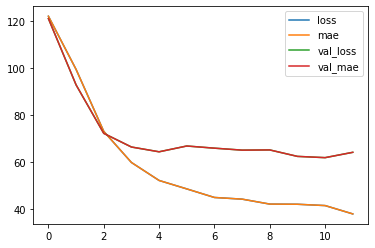

1/1 [==============================] - 0s 333ms/step - loss: 49.3712 - mae: 49.3712
[49.37120056152344, 49.37120056152344]
1/1 [==============================] - 0s 189ms/step
receta 0 kcal_true: 1150.0 kcal_pred: 951.06256  precisión: 82.7 %
receta 0 carbohydrate_true: 165.6 carbohydrate_pred: 135.98601  precisión: 82.1 %
receta 0 protein_true: 75.1 protein_pred: 37.367912  precisión: 49.7 %
receta 0 total_fat_true: 22.98 total_fat_pred: 25.28827  precisión: 90.9 %
---------------------------------------------------------------------------
receta 1 kcal_true: 999.0 kcal_pred: 807.7013  precisión: 80.9 %
receta 1 carbohydrate_true: 86.06 carbohydrate_pred: 79.66935  precisión: 92.6 %
receta 1 protein_true: 80.0 protein_pred: 47.62936  precisión: 59.5 %
receta 1 total_fat_true: 38.0 total_fat_pred: 28.625654  precisión: 75.3 %
---------------------------------------------------------------------------
receta 2 kcal_true: 851.5 kcal_pred: 738.2461  precisión: 86.7 %
receta 2 carbohydrate

100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


Epoch 1178/1189
10/10 [==============================] - 2s 187ms/step - loss: 161.7039 - mae: 161.7039 - val_loss: 104.7399 - val_mae: 104.7399
Epoch 1179/1189
10/10 [==============================] - 2s 168ms/step - loss: 109.5764 - mae: 109.5764 - val_loss: 73.1168 - val_mae: 73.1168
Epoch 1180/1189
10/10 [==============================] - 2s 197ms/step - loss: 83.8985 - mae: 83.8985 - val_loss: 67.8257 - val_mae: 67.8257
Epoch 1181/1189
10/10 [==============================] - 2s 219ms/step - loss: 75.2964 - mae: 75.2964 - val_loss: 62.2669 - val_mae: 62.2669
Epoch 1182/1189
10/10 [==============================] - 2s 204ms/step - loss: 72.4966 - mae: 72.4966 - val_loss: 61.4793 - val_mae: 61.4793
Epoch 1183/1189
10/10 [==============================] - 2s 208ms/step - loss: 70.1364 - mae: 70.1364 - val_loss: 61.1570 - val_mae: 61.1570
Epoch 1184/1189
10/10 [==============================] - 2s 204ms/step - loss: 62.3703 - mae: 62.3703 - val_loss: 62.5261 - val_mae: 62.5261
Epoch 1

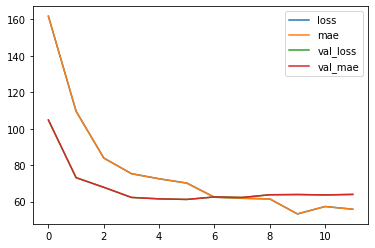

1/1 [==============================] - 0s 392ms/step - loss: 71.6950 - mae: 71.6950
[71.69500732421875, 71.69500732421875]
1/1 [==============================] - 0s 152ms/step
receta 0 kcal_true: 1240.0 kcal_pred: 1112.6105  precisión: 89.7 %
receta 0 carbohydrate_true: 66.5 carbohydrate_pred: 177.00055  precisión: 37.6 %
receta 0 protein_true: 114.1 protein_pred: 45.916306  precisión: 40.2 %
receta 0 total_fat_true: 63.56 total_fat_pred: 29.110811  precisión: 45.8 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1366.0 kcal_pred: 1485.9869  precisión: 91.9 %
receta 1 carbohydrate_true: 211.0 carbohydrate_pred: 176.24088  precisión: 83.5 %
receta 1 protein_true: 62.16 protein_pred: 77.39368  precisión: 80.3 %
receta 1 total_fat_true: 39.75 total_fat_pred: 49.938965  precisión: 79.6 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1483.0 kcal_pred: 1180.9196  precisión: 79.6 %
receta 2 carb

100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


Epoch 1189/1200
10/10 [==============================] - 2s 185ms/step - loss: 193.9222 - mae: 193.9222 - val_loss: 169.4704 - val_mae: 169.4704
Epoch 1190/1200
10/10 [==============================] - 2s 183ms/step - loss: 120.7311 - mae: 120.7311 - val_loss: 103.1169 - val_mae: 103.1169
Epoch 1191/1200
10/10 [==============================] - 2s 208ms/step - loss: 64.3682 - mae: 64.3682 - val_loss: 63.0611 - val_mae: 63.0611
Epoch 1192/1200
10/10 [==============================] - 2s 210ms/step - loss: 48.8699 - mae: 48.8699 - val_loss: 49.3381 - val_mae: 49.3381
Epoch 1193/1200
10/10 [==============================] - 2s 212ms/step - loss: 43.6461 - mae: 43.6461 - val_loss: 47.1484 - val_mae: 47.1484
Epoch 1194/1200
10/10 [==============================] - 2s 214ms/step - loss: 38.6591 - mae: 38.6591 - val_loss: 47.4354 - val_mae: 47.4354
Epoch 1195/1200
10/10 [==============================] - 2s 219ms/step - loss: 39.3707 - mae: 39.3707 - val_loss: 49.1040 - val_mae: 49.1040
Epoch

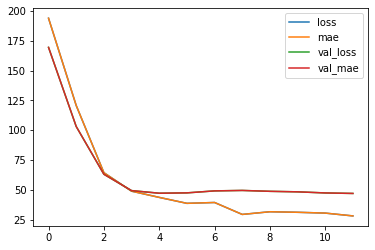

1/1 [==============================] - 0s 471ms/step - loss: 76.3939 - mae: 76.3939
[76.39393615722656, 76.39393615722656]
1/1 [==============================] - 0s 191ms/step
receta 0 kcal_true: 355.5 kcal_pred: 596.9312  precisión: 59.6 %
receta 0 carbohydrate_true: 5.46 carbohydrate_pred: 86.682014  precisión: 6.3 %
receta 0 protein_true: 67.56 protein_pred: 24.82053  precisión: 36.7 %
receta 0 total_fat_true: 5.01 total_fat_pred: 11.036496  precisión: 45.4 %
---------------------------------------------------------------------------
receta 1 kcal_true: 668.0 kcal_pred: 706.0096  precisión: 94.6 %
receta 1 carbohydrate_true: 34.34 carbohydrate_pred: 5.2036695  precisión: 15.2 %
receta 1 protein_true: 73.9 protein_pred: 60.503014  precisión: 81.9 %
receta 1 total_fat_true: 25.48 total_fat_pred: 32.048378  precisión: 79.5 %
---------------------------------------------------------------------------
receta 2 kcal_true: 337.0 kcal_pred: 716.4885  precisión: 47.0 %
receta 2 carbohydrate_

100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


Epoch 1200/1211
10/10 [==============================] - 2s 188ms/step - loss: 123.8850 - mae: 123.8850 - val_loss: 112.9966 - val_mae: 112.9966
Epoch 1201/1211
10/10 [==============================] - 2s 185ms/step - loss: 94.6796 - mae: 94.6796 - val_loss: 82.3124 - val_mae: 82.3124
Epoch 1202/1211
10/10 [==============================] - 2s 207ms/step - loss: 68.9449 - mae: 68.9449 - val_loss: 64.6462 - val_mae: 64.6462
Epoch 1203/1211
10/10 [==============================] - 2s 209ms/step - loss: 58.3002 - mae: 58.3002 - val_loss: 60.2217 - val_mae: 60.2217
Epoch 1204/1211
10/10 [==============================] - 2s 204ms/step - loss: 55.8420 - mae: 55.8420 - val_loss: 57.0723 - val_mae: 57.0723
Epoch 1205/1211
10/10 [==============================] - 2s 205ms/step - loss: 49.8110 - mae: 49.8110 - val_loss: 56.2600 - val_mae: 56.2600
Epoch 1206/1211
10/10 [==============================] - 2s 206ms/step - loss: 45.3784 - mae: 45.3784 - val_loss: 55.8950 - val_mae: 55.8950
Epoch 120

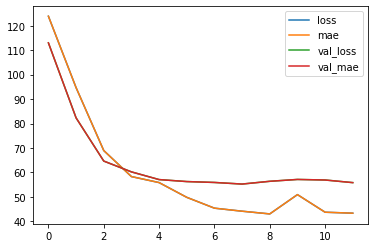

1/1 [==============================] - 0s 244ms/step - loss: 47.9298 - mae: 47.9298
[47.92982482910156, 47.92982482910156]
1/1 [==============================] - 0s 165ms/step
receta 0 kcal_true: 1107.0 kcal_pred: 1015.8427  precisión: 91.8 %
receta 0 carbohydrate_true: 152.2 carbohydrate_pred: 157.09775  precisión: 96.9 %
receta 0 protein_true: 49.12 protein_pred: 34.74587  precisión: 70.7 %
receta 0 total_fat_true: 52.47 total_fat_pred: 25.816504  precisión: 49.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 912.0 kcal_pred: 938.44696  precisión: 97.2 %
receta 1 carbohydrate_true: 175.4 carbohydrate_pred: 127.425095  precisión: 72.7 %
receta 1 protein_true: 7.21 protein_pred: 37.876316  precisión: 19.0 %
receta 1 total_fat_true: 25.3 total_fat_pred: 27.49804  precisión: 92.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 983.5 kcal_pred: 871.6673  precisión: 88.6 %
receta 2 carbohyd

100%|██████████| 100/100 [00:25<00:00,  3.90it/s]


Epoch 1211/1222
10/10 [==============================] - 3s 203ms/step - loss: 142.2578 - mae: 142.2578 - val_loss: 133.7520 - val_mae: 133.7520
Epoch 1212/1222
10/10 [==============================] - 2s 197ms/step - loss: 96.6924 - mae: 96.6924 - val_loss: 90.4357 - val_mae: 90.4357
Epoch 1213/1222
10/10 [==============================] - 2s 221ms/step - loss: 79.9713 - mae: 79.9713 - val_loss: 80.9263 - val_mae: 80.9263
Epoch 1214/1222
10/10 [==============================] - 2s 223ms/step - loss: 70.6379 - mae: 70.6379 - val_loss: 81.4873 - val_mae: 81.4873
Epoch 1215/1222
10/10 [==============================] - 2s 216ms/step - loss: 71.7970 - mae: 71.7970 - val_loss: 81.5904 - val_mae: 81.5904
Epoch 1216/1222
10/10 [==============================] - 2s 215ms/step - loss: 58.3526 - mae: 58.3526 - val_loss: 80.8145 - val_mae: 80.8145
Epoch 1217/1222
10/10 [==============================] - 2s 214ms/step - loss: 63.2198 - mae: 63.2198 - val_loss: 78.0737 - val_mae: 78.0737
Epoch 121

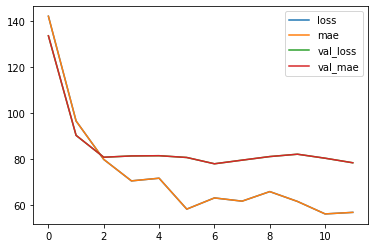

1/1 [==============================] - 0s 397ms/step - loss: 100.4276 - mae: 100.4276
[100.42755126953125, 100.42755126953125]
1/1 [==============================] - 0s 189ms/step
receta 0 kcal_true: 1543.0 kcal_pred: 1330.817  precisión: 86.2 %
receta 0 carbohydrate_true: 78.8 carbohydrate_pred: 66.96247  precisión: 85.0 %
receta 0 protein_true: 60.75 protein_pred: 104.04868  precisión: 58.4 %
receta 0 total_fat_true: 120.3 total_fat_pred: 62.16568  precisión: 51.7 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1654.0 kcal_pred: 1668.6876  precisión: 99.1 %
receta 1 carbohydrate_true: 161.9 carbohydrate_pred: 29.176773  precisión: 18.0 %
receta 1 protein_true: 201.0 protein_pred: 167.87805  precisión: 83.5 %
receta 1 total_fat_true: 23.45 total_fat_pred: 83.19294  precisión: 28.2 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1625.0 kcal_pred: 1318.202  precisión: 81.1 %
receta 2 carb

100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


Epoch 1222/1233
10/10 [==============================] - 2s 190ms/step - loss: 202.2517 - mae: 202.2517 - val_loss: 165.3785 - val_mae: 165.3785
Epoch 1223/1233
10/10 [==============================] - 2s 169ms/step - loss: 134.4127 - mae: 134.4127 - val_loss: 96.4139 - val_mae: 96.4139
Epoch 1224/1233
10/10 [==============================] - 2s 198ms/step - loss: 77.7363 - mae: 77.7363 - val_loss: 56.3155 - val_mae: 56.3155
Epoch 1225/1233
10/10 [==============================] - 2s 214ms/step - loss: 48.8355 - mae: 48.8355 - val_loss: 40.8560 - val_mae: 40.8560
Epoch 1226/1233
10/10 [==============================] - 2s 203ms/step - loss: 41.7832 - mae: 41.7832 - val_loss: 39.1674 - val_mae: 39.1674
Epoch 1227/1233
10/10 [==============================] - 2s 205ms/step - loss: 38.4831 - mae: 38.4831 - val_loss: 39.9647 - val_mae: 39.9647
Epoch 1228/1233
10/10 [==============================] - 2s 203ms/step - loss: 36.5961 - mae: 36.5961 - val_loss: 41.1662 - val_mae: 41.1662
Epoch 1

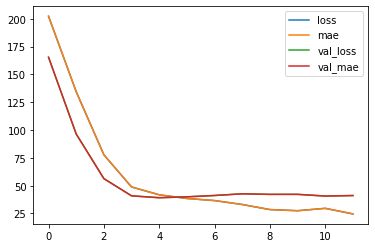

1/1 [==============================] - 0s 333ms/step - loss: 83.3221 - mae: 83.3221
[83.32210540771484, 83.32210540771484]
1/1 [==============================] - 0s 152ms/step
receta 0 kcal_true: 521.0 kcal_pred: 567.13605  precisión: 91.9 %
receta 0 carbohydrate_true: 17.31 carbohydrate_pred: 86.97241  precisión: 19.9 %
receta 0 protein_true: 2.56 protein_pred: 19.598948  precisión: 13.1 %
receta 0 total_fat_true: 51.28 total_fat_pred: 10.994342  precisión: 21.4 %
---------------------------------------------------------------------------
receta 1 kcal_true: 610.0 kcal_pred: 609.5843  precisión: 99.9 %
receta 1 carbohydrate_true: 106.56 carbohydrate_pred: 65.77996  precisión: 61.7 %
receta 1 protein_true: 46.47 protein_pred: 29.296734  precisión: 63.0 %
receta 1 total_fat_true: 2.12 total_fat_pred: 17.143137  precisión: 12.4 %
---------------------------------------------------------------------------
receta 2 kcal_true: 780.0 kcal_pred: 265.95517  precisión: 34.1 %
receta 2 carbohydr

100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


Epoch 1233/1244
10/10 [==============================] - 2s 197ms/step - loss: 117.3543 - mae: 117.3543 - val_loss: 115.3624 - val_mae: 115.3624
Epoch 1234/1244
10/10 [==============================] - 2s 177ms/step - loss: 93.8429 - mae: 93.8429 - val_loss: 86.4263 - val_mae: 86.4263
Epoch 1235/1244
10/10 [==============================] - 2s 213ms/step - loss: 60.5228 - mae: 60.5228 - val_loss: 59.3254 - val_mae: 59.3254
Epoch 1236/1244
10/10 [==============================] - 2s 203ms/step - loss: 59.1703 - mae: 59.1703 - val_loss: 50.5219 - val_mae: 50.5219
Epoch 1237/1244
10/10 [==============================] - 2s 212ms/step - loss: 51.0975 - mae: 51.0975 - val_loss: 52.2726 - val_mae: 52.2726
Epoch 1238/1244
10/10 [==============================] - 2s 205ms/step - loss: 54.0610 - mae: 54.0610 - val_loss: 54.7814 - val_mae: 54.7814
Epoch 1239/1244
10/10 [==============================] - 2s 205ms/step - loss: 48.1264 - mae: 48.1264 - val_loss: 60.5403 - val_mae: 60.5403
Epoch 124

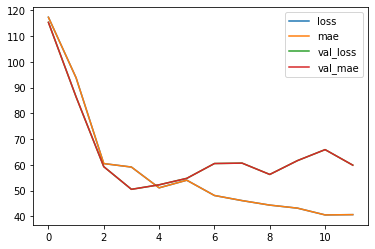

1/1 [==============================] - 0s 306ms/step - loss: 66.6979 - mae: 66.6979
[66.69792175292969, 66.69792175292969]
1/1 [==============================] - 0s 211ms/step
receta 0 kcal_true: 814.0 kcal_pred: 825.8029  precisión: 98.6 %
receta 0 carbohydrate_true: 21.9 carbohydrate_pred: 96.77974  precisión: 22.6 %
receta 0 protein_true: 65.9 protein_pred: 41.715755  precisión: 63.3 %
receta 0 total_fat_true: 51.6 total_fat_pred: 24.444036  precisión: 47.4 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1195.0 kcal_pred: 771.04535  precisión: 64.5 %
receta 1 carbohydrate_true: 176.9 carbohydrate_pred: 42.058807  precisión: 23.8 %
receta 1 protein_true: 77.25 protein_pred: 63.8969  precisión: 82.7 %
receta 1 total_fat_true: 28.34 total_fat_pred: 29.673363  precisión: 95.5 %
---------------------------------------------------------------------------
receta 2 kcal_true: 959.0 kcal_pred: 1068.6078  precisión: 89.7 %
receta 2 carbohydrat

100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


Epoch 1244/1255
10/10 [==============================] - 2s 190ms/step - loss: 156.0049 - mae: 156.0049 - val_loss: 165.7812 - val_mae: 165.7812
Epoch 1245/1255
10/10 [==============================] - 2s 169ms/step - loss: 122.8649 - mae: 122.8649 - val_loss: 116.9359 - val_mae: 116.9359
Epoch 1246/1255
10/10 [==============================] - 2s 215ms/step - loss: 76.3486 - mae: 76.3486 - val_loss: 86.2910 - val_mae: 86.2910
Epoch 1247/1255
10/10 [==============================] - 2s 201ms/step - loss: 83.6927 - mae: 83.6927 - val_loss: 87.9511 - val_mae: 87.9511
Epoch 1248/1255
10/10 [==============================] - 2s 213ms/step - loss: 71.3536 - mae: 71.3536 - val_loss: 98.3476 - val_mae: 98.3476
Epoch 1249/1255
10/10 [==============================] - 2s 209ms/step - loss: 65.3932 - mae: 65.3932 - val_loss: 87.2293 - val_mae: 87.2293
Epoch 1250/1255
10/10 [==============================] - 2s 206ms/step - loss: 63.9947 - mae: 63.9947 - val_loss: 81.0850 - val_mae: 81.0850
Epoch

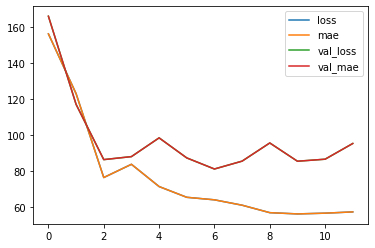

1/1 [==============================] - 0s 303ms/step - loss: 71.7026 - mae: 71.7026
[71.70259857177734, 71.70259857177734]
1/1 [==============================] - 0s 185ms/step
receta 0 kcal_true: 1226.0 kcal_pred: 1135.7408  precisión: 92.6 %
receta 0 carbohydrate_true: 6.35 carbohydrate_pred: 100.73419  precisión: 6.3 %
receta 0 protein_true: 189.1 protein_pred: 72.68515  precisión: 38.4 %
receta 0 total_fat_true: 43.5 total_fat_pred: 43.113827  precisión: 99.1 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1487.0 kcal_pred: 1298.302  precisión: 87.3 %
receta 1 carbohydrate_true: 156.5 carbohydrate_pred: 180.88858  precisión: 86.5 %
receta 1 protein_true: 49.9 protein_pred: 49.06172  precisión: 98.3 %
receta 1 total_fat_true: 74.5 total_fat_pred: 39.27874  precisión: 52.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1246.0 kcal_pred: 1306.2769  precisión: 95.4 %
receta 2 carbohydrat

100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


Epoch 1255/1266
10/10 [==============================] - 2s 190ms/step - loss: 176.7185 - mae: 176.7185 - val_loss: 159.4096 - val_mae: 159.4096
Epoch 1256/1266
10/10 [==============================] - 2s 180ms/step - loss: 109.2458 - mae: 109.2458 - val_loss: 97.4420 - val_mae: 97.4420
Epoch 1257/1266
10/10 [==============================] - 2s 202ms/step - loss: 65.4693 - mae: 65.4693 - val_loss: 65.6247 - val_mae: 65.6247
Epoch 1258/1266
10/10 [==============================] - 2s 212ms/step - loss: 47.9855 - mae: 47.9855 - val_loss: 56.1932 - val_mae: 56.1932
Epoch 1259/1266
10/10 [==============================] - 2s 206ms/step - loss: 43.2320 - mae: 43.2320 - val_loss: 54.1459 - val_mae: 54.1459
Epoch 1260/1266
10/10 [==============================] - 2s 216ms/step - loss: 37.6872 - mae: 37.6872 - val_loss: 54.5672 - val_mae: 54.5672
Epoch 1261/1266
10/10 [==============================] - 2s 204ms/step - loss: 36.7497 - mae: 36.7497 - val_loss: 55.2738 - val_mae: 55.2738
Epoch 1

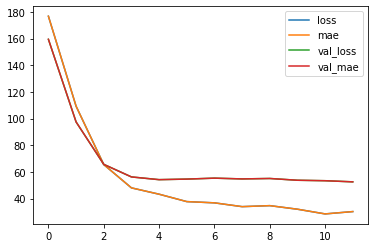

1/1 [==============================] - 0s 258ms/step - loss: 51.5340 - mae: 51.5340
[51.534019470214844, 51.534019470214844]
1/1 [==============================] - 0s 208ms/step
receta 0 kcal_true: 676.0 kcal_pred: 725.9144  precisión: 93.1 %
receta 0 carbohydrate_true: 134.0 carbohydrate_pred: 41.105404  precisión: 30.7 %
receta 0 protein_true: 27.52 protein_pred: 55.460346  precisión: 49.6 %
receta 0 total_fat_true: 6.05 total_fat_pred: 23.559195  precisión: 25.7 %
---------------------------------------------------------------------------
receta 1 kcal_true: 421.0 kcal_pred: 564.6591  precisión: 74.6 %
receta 1 carbohydrate_true: 97.06 carbohydrate_pred: 78.55162  precisión: 80.9 %
receta 1 protein_true: 9.27 protein_pred: 24.525715  precisión: 37.8 %
receta 1 total_fat_true: 0.34 total_fat_pred: 9.994893  precisión: 3.4 %
---------------------------------------------------------------------------
receta 2 kcal_true: 366.8 kcal_pred: 614.31866  precisión: 59.7 %
receta 2 carbohydrat

100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


Epoch 1266/1277
10/10 [==============================] - 2s 185ms/step - loss: 113.3412 - mae: 113.3412 - val_loss: 124.6740 - val_mae: 124.6740
Epoch 1267/1277
10/10 [==============================] - 2s 185ms/step - loss: 86.8984 - mae: 86.8984 - val_loss: 96.3022 - val_mae: 96.3022
Epoch 1268/1277
10/10 [==============================] - 2s 207ms/step - loss: 60.2424 - mae: 60.2424 - val_loss: 76.0476 - val_mae: 76.0476
Epoch 1269/1277
10/10 [==============================] - 2s 201ms/step - loss: 54.4978 - mae: 54.4978 - val_loss: 73.4909 - val_mae: 73.4909
Epoch 1270/1277
10/10 [==============================] - 2s 202ms/step - loss: 53.9584 - mae: 53.9584 - val_loss: 74.8951 - val_mae: 74.8951
Epoch 1271/1277
10/10 [==============================] - 2s 220ms/step - loss: 48.0669 - mae: 48.0669 - val_loss: 76.4774 - val_mae: 76.4774
Epoch 1272/1277
10/10 [==============================] - 2s 209ms/step - loss: 45.3474 - mae: 45.3474 - val_loss: 78.3927 - val_mae: 78.3927
Epoch 127

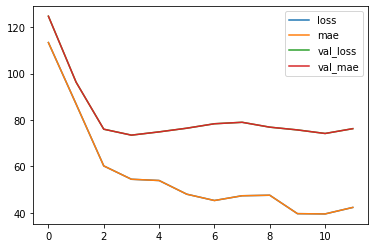

1/1 [==============================] - 0s 292ms/step - loss: 55.6262 - mae: 55.6262
[55.626220703125, 55.626220703125]
1/1 [==============================] - 0s 192ms/step
receta 0 kcal_true: 851.0 kcal_pred: 941.123  precisión: 90.4 %
receta 0 carbohydrate_true: 74.3 carbohydrate_pred: 150.98436  precisión: 49.2 %
receta 0 protein_true: 51.28 protein_pred: 30.944946  precisión: 60.3 %
receta 0 total_fat_true: 38.88 total_fat_pred: 20.467346  precisión: 52.6 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1101.0 kcal_pred: 968.0651  precisión: 87.9 %
receta 1 carbohydrate_true: 2.99 carbohydrate_pred: 16.91297  precisión: 17.7 %
receta 1 protein_true: 113.9 protein_pred: 93.639084  precisión: 82.2 %
receta 1 total_fat_true: 69.5 total_fat_pred: 45.717476  precisión: 65.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1074.0 kcal_pred: 948.6281  precisión: 88.3 %
receta 2 carbohydrate_tr

100%|██████████| 100/100 [00:21<00:00,  4.69it/s]


Epoch 1277/1288
10/10 [==============================] - 2s 192ms/step - loss: 154.4882 - mae: 154.4882 - val_loss: 155.5524 - val_mae: 155.5524
Epoch 1278/1288
10/10 [==============================] - 2s 166ms/step - loss: 104.5913 - mae: 104.5913 - val_loss: 103.3808 - val_mae: 103.3808
Epoch 1279/1288
10/10 [==============================] - 2s 173ms/step - loss: 85.0372 - mae: 85.0372 - val_loss: 91.0709 - val_mae: 91.0709
Epoch 1280/1288
10/10 [==============================] - 2s 200ms/step - loss: 82.6316 - mae: 82.6316 - val_loss: 93.5833 - val_mae: 93.5833
Epoch 1281/1288
10/10 [==============================] - 2s 223ms/step - loss: 66.5993 - mae: 66.5993 - val_loss: 104.5463 - val_mae: 104.5463
Epoch 1282/1288
10/10 [==============================] - 2s 209ms/step - loss: 68.9017 - mae: 68.9017 - val_loss: 100.9231 - val_mae: 100.9231
Epoch 1283/1288
10/10 [==============================] - 2s 208ms/step - loss: 65.0535 - mae: 65.0535 - val_loss: 96.5949 - val_mae: 96.5949
E

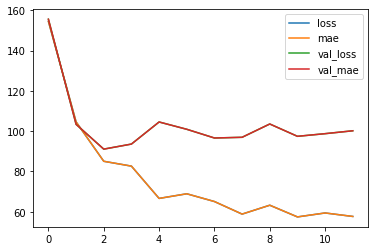

1/1 [==============================] - 0s 286ms/step - loss: 81.5182 - mae: 81.5182
[81.51819610595703, 81.51819610595703]
1/1 [==============================] - 0s 221ms/step
receta 0 kcal_true: 1545.0 kcal_pred: 1277.3259  precisión: 82.7 %
receta 0 carbohydrate_true: 198.1 carbohydrate_pred: 137.17816  precisión: 69.2 %
receta 0 protein_true: 86.4 protein_pred: 71.35557  precisión: 82.6 %
receta 0 total_fat_true: 51.25 total_fat_pred: 46.21916  precisión: 90.2 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1291.0 kcal_pred: 1234.3318  precisión: 95.6 %
receta 1 carbohydrate_true: 131.8 carbohydrate_pred: 120.96468  precisión: 91.8 %
receta 1 protein_true: 44.16 protein_pred: 69.29235  precisión: 63.7 %
receta 1 total_fat_true: 66.3 total_fat_pred: 48.285656  precisión: 72.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1625.0 kcal_pred: 1109.5283  precisión: 68.3 %
receta 2 carbohy

100%|██████████| 100/100 [00:21<00:00,  4.64it/s]


Epoch 1288/1299
10/10 [==============================] - 2s 189ms/step - loss: 179.7149 - mae: 179.7149 - val_loss: 152.1458 - val_mae: 152.1458
Epoch 1289/1299
10/10 [==============================] - 2s 179ms/step - loss: 112.6415 - mae: 112.6415 - val_loss: 95.4272 - val_mae: 95.4272
Epoch 1290/1299
10/10 [==============================] - 2s 210ms/step - loss: 69.5439 - mae: 69.5439 - val_loss: 62.2842 - val_mae: 62.2842
Epoch 1291/1299
10/10 [==============================] - 2s 203ms/step - loss: 50.9871 - mae: 50.9871 - val_loss: 56.2188 - val_mae: 56.2188
Epoch 1292/1299
10/10 [==============================] - 2s 221ms/step - loss: 46.4425 - mae: 46.4425 - val_loss: 54.6079 - val_mae: 54.6079
Epoch 1293/1299
10/10 [==============================] - 2s 207ms/step - loss: 42.4449 - mae: 42.4449 - val_loss: 54.1057 - val_mae: 54.1057
Epoch 1294/1299
10/10 [==============================] - 2s 209ms/step - loss: 38.4864 - mae: 38.4864 - val_loss: 53.8449 - val_mae: 53.8449
Epoch 1

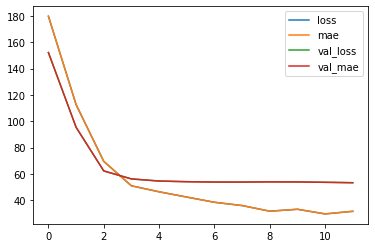

1/1 [==============================] - 0s 262ms/step - loss: 58.9843 - mae: 58.9843
[58.984291076660156, 58.984291076660156]
1/1 [==============================] - 0s 158ms/step
receta 0 kcal_true: 629.0 kcal_pred: 507.5522  precisión: 80.7 %
receta 0 carbohydrate_true: 138.8 carbohydrate_pred: 81.379684  precisión: 58.7 %
receta 0 protein_true: 5.46 protein_pred: 15.309608  precisión: 35.7 %
receta 0 total_fat_true: 6.79 total_fat_pred: 9.17968  precisión: 74.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 532.5 kcal_pred: 484.40912  precisión: 91.0 %
receta 1 carbohydrate_true: 33.1 carbohydrate_pred: 57.41953  precisión: 57.6 %
receta 1 protein_true: 22.16 protein_pred: 21.99192  precisión: 99.3 %
receta 1 total_fat_true: 34.88 total_fat_pred: 12.952589  precisión: 37.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 403.2 kcal_pred: 602.7099  precisión: 66.9 %
receta 2 carbohydrate

100%|██████████| 100/100 [00:21<00:00,  4.55it/s]


Epoch 1299/1310
10/10 [==============================] - 2s 192ms/step - loss: 111.8292 - mae: 111.8292 - val_loss: 93.0861 - val_mae: 93.0861
Epoch 1300/1310
10/10 [==============================] - 2s 184ms/step - loss: 89.3402 - mae: 89.3402 - val_loss: 68.8984 - val_mae: 68.8984
Epoch 1301/1310
10/10 [==============================] - 2s 220ms/step - loss: 64.8256 - mae: 64.8256 - val_loss: 59.9598 - val_mae: 59.9598
Epoch 1302/1310
10/10 [==============================] - 2s 212ms/step - loss: 54.8179 - mae: 54.8179 - val_loss: 62.6423 - val_mae: 62.6423
Epoch 1303/1310
10/10 [==============================] - 2s 205ms/step - loss: 50.5552 - mae: 50.5552 - val_loss: 59.7527 - val_mae: 59.7527
Epoch 1304/1310
10/10 [==============================] - 2s 206ms/step - loss: 50.8144 - mae: 50.8144 - val_loss: 58.0054 - val_mae: 58.0054
Epoch 1305/1310
10/10 [==============================] - 2s 217ms/step - loss: 47.4318 - mae: 47.4318 - val_loss: 57.4064 - val_mae: 57.4064
Epoch 1306/

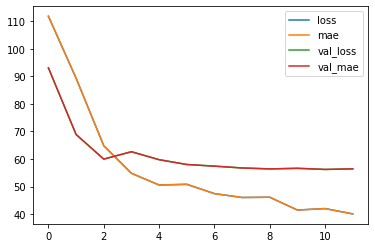

1/1 [==============================] - 0s 304ms/step - loss: 82.7571 - mae: 82.7571
[82.7571029663086, 82.7571029663086]
1/1 [==============================] - 0s 187ms/step
receta 0 kcal_true: 1040.0 kcal_pred: 834.8812  precisión: 80.3 %
receta 0 carbohydrate_true: 183.2 carbohydrate_pred: 105.34257  precisión: 57.5 %
receta 0 protein_true: 54.75 protein_pred: 34.545837  precisión: 63.1 %
receta 0 total_fat_true: 9.35 total_fat_pred: 25.54075  precisión: 36.6 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1018.5 kcal_pred: 792.3668  precisión: 77.8 %
receta 1 carbohydrate_true: 265.8 carbohydrate_pred: 96.10146  precisión: 36.2 %
receta 1 protein_true: 0.83 protein_pred: 34.121613  precisión: 2.4 %
receta 1 total_fat_true: 0.42 total_fat_pred: 25.59165  precisión: 1.6 %
---------------------------------------------------------------------------
receta 2 kcal_true: 821.5 kcal_pred: 730.16675  precisión: 88.9 %
receta 2 carbohydrate_tr

100%|██████████| 100/100 [00:21<00:00,  4.62it/s]


Epoch 1310/1321
10/10 [==============================] - 2s 188ms/step - loss: 172.0238 - mae: 172.0238 - val_loss: 151.5338 - val_mae: 151.5338
Epoch 1311/1321
10/10 [==============================] - 2s 193ms/step - loss: 129.8222 - mae: 129.8222 - val_loss: 99.7547 - val_mae: 99.7547
Epoch 1312/1321
10/10 [==============================] - 2s 220ms/step - loss: 85.3674 - mae: 85.3674 - val_loss: 73.3697 - val_mae: 73.3697
Epoch 1313/1321
10/10 [==============================] - 2s 210ms/step - loss: 80.2587 - mae: 80.2587 - val_loss: 73.2269 - val_mae: 73.2269
Epoch 1314/1321
10/10 [==============================] - 2s 206ms/step - loss: 79.2544 - mae: 79.2544 - val_loss: 78.0104 - val_mae: 78.0104
Epoch 1315/1321
10/10 [==============================] - 2s 225ms/step - loss: 68.4846 - mae: 68.4846 - val_loss: 78.9297 - val_mae: 78.9297
Epoch 1316/1321
10/10 [==============================] - 2s 206ms/step - loss: 67.8681 - mae: 67.8681 - val_loss: 75.7606 - val_mae: 75.7606
Epoch 1

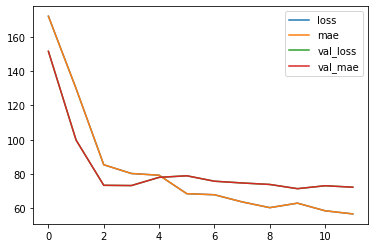

1/1 [==============================] - 0s 304ms/step - loss: 107.7320 - mae: 107.7320
[107.73202514648438, 107.73202514648438]
1/1 [==============================] - 0s 257ms/step
receta 0 kcal_true: 1621.0 kcal_pred: 1394.8145  precisión: 86.0 %
receta 0 carbohydrate_true: 286.2 carbohydrate_pred: 190.58154  precisión: 66.6 %
receta 0 protein_true: 67.2 protein_pred: 59.375134  precisión: 88.4 %
receta 0 total_fat_true: 31.06 total_fat_pred: 38.057285  precisión: 81.6 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1583.0 kcal_pred: 1248.3748  precisión: 78.9 %
receta 1 carbohydrate_true: 365.2 carbohydrate_pred: 189.77145  precisión: 52.0 %
receta 1 protein_true: 16.56 protein_pred: 46.77559  precisión: 35.4 %
receta 1 total_fat_true: 9.92 total_fat_pred: 29.576118  precisión: 33.5 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1494.0 kcal_pred: 1290.239  precisión: 86.4 %
receta 2 ca

100%|██████████| 100/100 [00:21<00:00,  4.61it/s]


Epoch 1321/1332
10/10 [==============================] - 2s 192ms/step - loss: 188.6674 - mae: 188.6674 - val_loss: 160.5947 - val_mae: 160.5947
Epoch 1322/1332
10/10 [==============================] - 2s 175ms/step - loss: 122.2531 - mae: 122.2531 - val_loss: 95.9255 - val_mae: 95.9255
Epoch 1323/1332
10/10 [==============================] - 2s 207ms/step - loss: 70.9365 - mae: 70.9365 - val_loss: 58.5297 - val_mae: 58.5297
Epoch 1324/1332
10/10 [==============================] - 2s 209ms/step - loss: 47.8896 - mae: 47.8896 - val_loss: 47.5352 - val_mae: 47.5352
Epoch 1325/1332
10/10 [==============================] - 2s 207ms/step - loss: 44.3557 - mae: 44.3557 - val_loss: 46.8918 - val_mae: 46.8918
Epoch 1326/1332
10/10 [==============================] - 2s 216ms/step - loss: 38.1599 - mae: 38.1599 - val_loss: 47.4419 - val_mae: 47.4419
Epoch 1327/1332
10/10 [==============================] - 2s 205ms/step - loss: 33.5656 - mae: 33.5656 - val_loss: 48.0687 - val_mae: 48.0687
Epoch 1

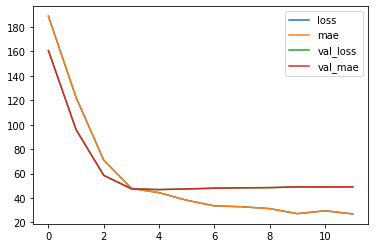

1/1 [==============================] - 0s 277ms/step - loss: 70.1580 - mae: 70.1580
[70.1579818725586, 70.1579818725586]
1/1 [==============================] - 0s 225ms/step
receta 0 kcal_true: 742.0 kcal_pred: 546.4118  precisión: 73.6 %
receta 0 carbohydrate_true: 30.5 carbohydrate_pred: 29.707376  precisión: 97.4 %
receta 0 protein_true: 35.3 protein_pred: 44.055637  precisión: 80.2 %
receta 0 total_fat_true: 58.94 total_fat_pred: 19.687796  precisión: 33.4 %
---------------------------------------------------------------------------
receta 1 kcal_true: 322.8 kcal_pred: 696.3551  precisión: 46.3 %
receta 1 carbohydrate_true: 8.42 carbohydrate_pred: 37.21637  precisión: 22.6 %
receta 1 protein_true: 49.47 protein_pred: 50.97609  precisión: 97.0 %
receta 1 total_fat_true: 10.44 total_fat_pred: 26.138609  precisión: 39.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 451.5 kcal_pred: 592.2557  precisión: 76.2 %
receta 2 carbohydrate_tr

100%|██████████| 100/100 [00:21<00:00,  4.62it/s]


Epoch 1332/1343
10/10 [==============================] - 2s 185ms/step - loss: 118.6748 - mae: 118.6748 - val_loss: 102.1892 - val_mae: 102.1892
Epoch 1333/1343
10/10 [==============================] - 2s 181ms/step - loss: 98.3029 - mae: 98.3029 - val_loss: 74.0621 - val_mae: 74.0621
Epoch 1334/1343
10/10 [==============================] - 2s 205ms/step - loss: 73.7005 - mae: 73.7005 - val_loss: 54.8959 - val_mae: 54.8959
Epoch 1335/1343
10/10 [==============================] - 2s 212ms/step - loss: 65.1750 - mae: 65.1750 - val_loss: 50.6226 - val_mae: 50.6226
Epoch 1336/1343
10/10 [==============================] - 2s 203ms/step - loss: 54.1483 - mae: 54.1483 - val_loss: 51.0049 - val_mae: 51.0049
Epoch 1337/1343
10/10 [==============================] - 2s 223ms/step - loss: 47.9984 - mae: 47.9984 - val_loss: 49.6708 - val_mae: 49.6708
Epoch 1338/1343
10/10 [==============================] - 2s 231ms/step - loss: 53.9381 - mae: 53.9381 - val_loss: 49.2738 - val_mae: 49.2738
Epoch 133

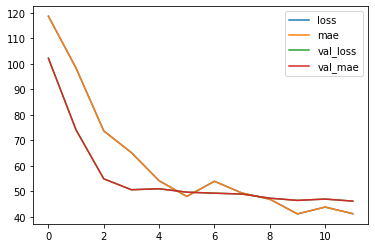

1/1 [==============================] - 0s 344ms/step - loss: 92.5301 - mae: 92.5301
[92.53011322021484, 92.53011322021484]
1/1 [==============================] - 0s 147ms/step
receta 0 kcal_true: 958.5 kcal_pred: 878.4662  precisión: 91.7 %
receta 0 carbohydrate_true: 44.22 carbohydrate_pred: 138.06885  precisión: 32.0 %
receta 0 protein_true: 38.62 protein_pred: 25.939032  precisión: 67.2 %
receta 0 total_fat_true: 69.5 total_fat_pred: 19.101048  precisión: 27.5 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1134.0 kcal_pred: 1180.8116  precisión: 96.0 %
receta 1 carbohydrate_true: 307.2 carbohydrate_pred: 124.16125  precisión: 40.4 %
receta 1 protein_true: 0.36 protein_pred: 55.718685  precisión: 0.6 %
receta 1 total_fat_true: 0.85 total_fat_pred: 37.886665  precisión: 2.2 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1105.0 kcal_pred: 970.56805  precisión: 87.8 %
receta 2 carbohydr

100%|██████████| 100/100 [00:21<00:00,  4.61it/s]


Epoch 1343/1354
10/10 [==============================] - 2s 187ms/step - loss: 141.3999 - mae: 141.3999 - val_loss: 126.0490 - val_mae: 126.0490
Epoch 1344/1354
10/10 [==============================] - 2s 181ms/step - loss: 93.8919 - mae: 93.8919 - val_loss: 88.3130 - val_mae: 88.3130
Epoch 1345/1354
10/10 [==============================] - 2s 203ms/step - loss: 86.9638 - mae: 86.9638 - val_loss: 83.3959 - val_mae: 83.3959
Epoch 1346/1354
10/10 [==============================] - 2s 206ms/step - loss: 71.2131 - mae: 71.2131 - val_loss: 87.5408 - val_mae: 87.5408
Epoch 1347/1354
10/10 [==============================] - 2s 212ms/step - loss: 67.7673 - mae: 67.7673 - val_loss: 86.4357 - val_mae: 86.4357
Epoch 1348/1354
10/10 [==============================] - 2s 224ms/step - loss: 62.2870 - mae: 62.2870 - val_loss: 87.3735 - val_mae: 87.3735
Epoch 1349/1354
10/10 [==============================] - 2s 207ms/step - loss: 66.4318 - mae: 66.4318 - val_loss: 85.4505 - val_mae: 85.4505
Epoch 135

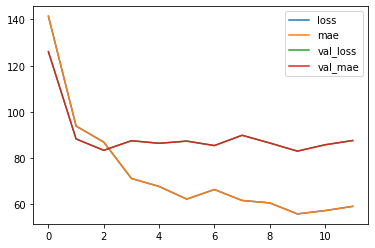

1/1 [==============================] - 0s 285ms/step - loss: 58.6102 - mae: 58.6102
[58.6102409362793, 58.6102409362793]
1/1 [==============================] - 0s 255ms/step
receta 0 kcal_true: 1646.0 kcal_pred: 1575.5475  precisión: 95.7 %
receta 0 carbohydrate_true: 83.7 carbohydrate_pred: 33.87012  precisión: 40.5 %
receta 0 protein_true: 36.78 protein_pred: 141.25957  precisión: 26.0 %
receta 0 total_fat_true: 134.6 total_fat_pred: 89.474625  precisión: 66.5 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1327.0 kcal_pred: 1147.1909  precisión: 86.4 %
receta 1 carbohydrate_true: 84.75 carbohydrate_pred: 140.42856  precisión: 60.4 %
receta 1 protein_true: 23.12 protein_pred: 47.023193  precisión: 49.2 %
receta 1 total_fat_true: 101.94 total_fat_pred: 45.851246  precisión: 45.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1258.0 kcal_pred: 1171.0531  precisión: 93.1 %
receta 2 carbo

100%|██████████| 100/100 [00:21<00:00,  4.65it/s]


Epoch 1354/1365
10/10 [==============================] - 2s 201ms/step - loss: 202.1415 - mae: 202.1415 - val_loss: 163.0748 - val_mae: 163.0748
Epoch 1355/1365
10/10 [==============================] - 2s 185ms/step - loss: 131.7126 - mae: 131.7126 - val_loss: 99.7795 - val_mae: 99.7795
Epoch 1356/1365
10/10 [==============================] - 2s 204ms/step - loss: 75.3493 - mae: 75.3493 - val_loss: 59.6685 - val_mae: 59.6685
Epoch 1357/1365
10/10 [==============================] - 2s 200ms/step - loss: 49.4104 - mae: 49.4104 - val_loss: 42.5587 - val_mae: 42.5587
Epoch 1358/1365
10/10 [==============================] - 2s 241ms/step - loss: 40.5971 - mae: 40.5971 - val_loss: 37.6409 - val_mae: 37.6409
Epoch 1359/1365
10/10 [==============================] - 2s 227ms/step - loss: 40.3462 - mae: 40.3462 - val_loss: 37.2531 - val_mae: 37.2531
Epoch 1360/1365
10/10 [==============================] - 2s 211ms/step - loss: 34.5592 - mae: 34.5592 - val_loss: 38.1552 - val_mae: 38.1552
Epoch 1

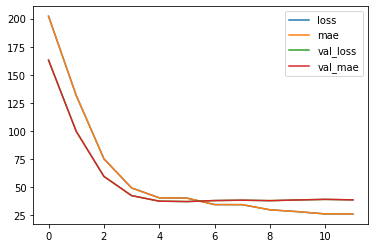

1/1 [==============================] - 0s 314ms/step - loss: 68.1251 - mae: 68.1251
[68.12513732910156, 68.12513732910156]
1/1 [==============================] - 0s 155ms/step
receta 0 kcal_true: 529.0 kcal_pred: 555.0977  precisión: 95.3 %
receta 0 carbohydrate_true: 21.02 carbohydrate_pred: 34.02969  precisión: 61.8 %
receta 0 protein_true: 30.56 protein_pred: 37.824707  precisión: 80.8 %
receta 0 total_fat_true: 36.84 total_fat_pred: 19.89854  precisión: 54.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 708.0 kcal_pred: 471.2409  precisión: 66.6 %
receta 1 carbohydrate_true: 107.06 carbohydrate_pred: 73.16293  precisión: 68.3 %
receta 1 protein_true: 69.94 protein_pred: 14.24419  precisión: 20.4 %
receta 1 total_fat_true: 6.52 total_fat_pred: 8.235689  precisión: 79.2 %
---------------------------------------------------------------------------
receta 2 kcal_true: 752.0 kcal_pred: 567.17993  precisión: 75.4 %
receta 2 carbohydrate

100%|██████████| 100/100 [00:21<00:00,  4.59it/s]


Epoch 1365/1376
10/10 [==============================] - 2s 187ms/step - loss: 118.5620 - mae: 118.5620 - val_loss: 123.5829 - val_mae: 123.5829
Epoch 1366/1376
10/10 [==============================] - 2s 186ms/step - loss: 95.5363 - mae: 95.5363 - val_loss: 97.2153 - val_mae: 97.2153
Epoch 1367/1376
10/10 [==============================] - 2s 202ms/step - loss: 65.4041 - mae: 65.4041 - val_loss: 74.9092 - val_mae: 74.9092
Epoch 1368/1376
10/10 [==============================] - 2s 218ms/step - loss: 57.1483 - mae: 57.1483 - val_loss: 62.7555 - val_mae: 62.7555
Epoch 1369/1376
10/10 [==============================] - 2s 209ms/step - loss: 50.1902 - mae: 50.1902 - val_loss: 64.5464 - val_mae: 64.5464
Epoch 1370/1376
10/10 [==============================] - 2s 213ms/step - loss: 49.8855 - mae: 49.8855 - val_loss: 64.3684 - val_mae: 64.3684
Epoch 1371/1376
10/10 [==============================] - 2s 211ms/step - loss: 46.0286 - mae: 46.0286 - val_loss: 67.6927 - val_mae: 67.6927
Epoch 137

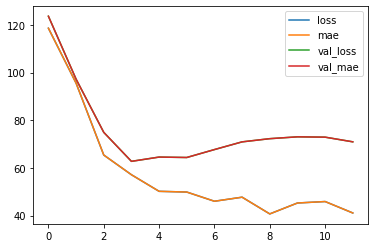

1/1 [==============================] - 0s 226ms/step - loss: 54.3490 - mae: 54.3490
[54.34901428222656, 54.34901428222656]
1/1 [==============================] - 0s 147ms/step
receta 0 kcal_true: 934.0 kcal_pred: 879.5926  precisión: 94.2 %
receta 0 carbohydrate_true: 75.44 carbohydrate_pred: 77.428955  precisión: 97.4 %
receta 0 protein_true: 114.9 protein_pred: 50.210365  precisión: 43.7 %
receta 0 total_fat_true: 23.9 total_fat_pred: 28.530416  precisión: 83.8 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1043.0 kcal_pred: 967.3432  precisión: 92.7 %
receta 1 carbohydrate_true: 54.56 carbohydrate_pred: 156.0061  precisión: 35.0 %
receta 1 protein_true: 42.8 protein_pred: 30.016232  precisión: 70.1 %
receta 1 total_fat_true: 80.7 total_fat_pred: 16.141153  precisión: 20.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1047.0 kcal_pred: 930.18274  precisión: 88.8 %
receta 2 carbohydr

100%|██████████| 100/100 [00:21<00:00,  4.58it/s]


Epoch 1376/1387
10/10 [==============================] - 2s 179ms/step - loss: 172.2760 - mae: 172.2760 - val_loss: 147.5060 - val_mae: 147.5060
Epoch 1377/1387
10/10 [==============================] - 2s 156ms/step - loss: 116.8693 - mae: 116.8693 - val_loss: 95.3745 - val_mae: 95.3745
Epoch 1378/1387
10/10 [==============================] - 2s 207ms/step - loss: 87.8947 - mae: 87.8947 - val_loss: 78.7984 - val_mae: 78.7984
Epoch 1379/1387
10/10 [==============================] - 3s 269ms/step - loss: 81.6151 - mae: 81.6151 - val_loss: 79.6423 - val_mae: 79.6423
Epoch 1380/1387
10/10 [==============================] - 3s 324ms/step - loss: 81.1470 - mae: 81.1470 - val_loss: 87.0998 - val_mae: 87.0998
Epoch 1381/1387
10/10 [==============================] - 3s 303ms/step - loss: 75.3260 - mae: 75.3260 - val_loss: 84.6868 - val_mae: 84.6868
Epoch 1382/1387
10/10 [==============================] - 2s 226ms/step - loss: 69.3080 - mae: 69.3080 - val_loss: 86.7631 - val_mae: 86.7631
Epoch 1

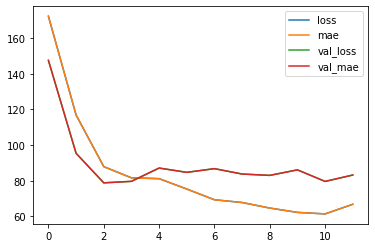

1/1 [==============================] - 0s 257ms/step - loss: 58.6470 - mae: 58.6470
[58.64697265625, 58.64697265625]
1/1 [==============================] - 0s 189ms/step
receta 0 kcal_true: 1625.0 kcal_pred: 1348.3115  precisión: 83.0 %
receta 0 carbohydrate_true: 208.9 carbohydrate_pred: 201.01111  precisión: 96.2 %
receta 0 protein_true: 15.29 protein_pred: 46.36032  precisión: 33.0 %
receta 0 total_fat_true: 85.9 total_fat_pred: 35.822086  precisión: 41.7 %
---------------------------------------------------------------------------
receta 1 kcal_true: 1310.0 kcal_pred: 1362.3445  precisión: 96.2 %
receta 1 carbohydrate_true: 116.1 carbohydrate_pred: 116.26002  precisión: 99.9 %
receta 1 protein_true: 22.28 protein_pred: 86.178276  precisión: 25.9 %
receta 1 total_fat_true: 28.64 total_fat_pred: 52.99468  precisión: 54.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 1222.0 kcal_pred: 1235.7327  precisión: 98.9 %
receta 2 carbohydrat

 73%|███████▎  | 73/100 [00:24<00:09,  2.98it/s]


Falló al entrenar en interación 126

ITERACIÓN: 127
min unidades: 1  max unidades: 10
min kcal: 801  max kcal: 1200
Entrenando desde epoch 1386
------------------------------------------

Error al cargar archivos NumPy.
datasets/numpy/100_recetas_random_EMBED-128_DATA_X.npy no existe o está corrupto.
datasets/numpy/100_recetas_random_EMBED-128_DATA_Y.npy no existe o está corrupto.
Generando 100 recetas aleatorias, esto puede tardar varios minutos...
Calculando vector de características de 100 recetas...


 98%|█████████▊| 98/100 [00:26<00:00,  3.67it/s]


Falló al entrenar en interación 126

ITERACIÓN: 127
min unidades: 1  max unidades: 10
min kcal: 1201  max kcal: 1700
Entrenando desde epoch 1386
------------------------------------------

Error al cargar archivos NumPy.
datasets/numpy/100_recetas_random_EMBED-128_DATA_X.npy no existe o está corrupto.
datasets/numpy/100_recetas_random_EMBED-128_DATA_Y.npy no existe o está corrupto.
Generando 100 recetas aleatorias, esto puede tardar varios minutos...
Calculando vector de características de 100 recetas...


 19%|█▉        | 19/100 [00:04<00:17,  4.67it/s]

In [7]:
recomendador128.NUM_RECETAS = 100
recomendador128.EMB_SIZE = 128
BATCHSIZE = 8
ITER = 4
INITIAL_EPOCH = 0
EPOCHS = recomendador128.NUM_RECETAS // BATCHSIZE
#EPOCHS = 15
LR = 1e-5

Rangos_kcal = [
                (300, 800),
                (801, 1200),
                (1201, 1700)           
                #(500, 1500)              
              ]

Its = []
Valmaes = []

Histories = []
val_mae = 1000
MAX_VAL_MAE = 35

iteracion = 0
#for iteracion in range(ITER):
while val_mae > MAX_VAL_MAE or iteracion<=100:
  MINU = 1 
  MAXU = 10  
  #INITIAL_EPOCH = 0
  

  for ik in range(len(Rangos_kcal)):
    MINK, MAXK = Rangos_kcal[ik]
    print('\nITERACIÓN:', iteracion+1)
    print('min unidades:',MINU, ' max unidades:', MAXU)
    print('min kcal:', MINK, ' max kcal:', MAXK)
    print('Entrenando desde epoch', INITIAL_EPOCH)
    print('------------------------------------------\n')
    try:
      modelo128, history = recomendador128.EntrenarModelo(df_nutricionales='nutricion_mejorado.csv',
                                    #df_training='recipes_con_info_nutricional.csv',
                                    #df_test='recetas_test.csv', 
                                    #df_val='recetas_val.csv',
                                    learning_rate=LR,
                                    version=version, 
                                    initial_epoch = INITIAL_EPOCH,                             
                                    epochs=INITIAL_EPOCH + EPOCHS, 
                                    batch_size=BATCHSIZE,
                                    kernels=128,                                             
                                    min_ingredientes=5, max_ingredientes=11,                                  
                                    min_unidades=MINU, max_unidades=MAXU,  
                                    min_kcal=MINK, max_kcal= MAXK,                             
                                    save=True, verbose=True)
      INITIAL_EPOCH = history.epoch[-1]

      iteracion += 1
      val_mae = float(history.history['val_mae'][-1])
      Its.append(iteracion)
      Valmaes.append(val_mae)
      if val_mae <= MAX_VAL_MAE: break

      Histories.append(history)
    except:
      print('Falló al entrenar en interación', iteracion)
      pass
    
dfVM = pd.DataFrame({'iteracion':Its, 'val_mae':Valmaes}, columns=['iteracion', 'val_mae'])
dfVM.plot(kind='bar', x='iteracion', y='val_mae')

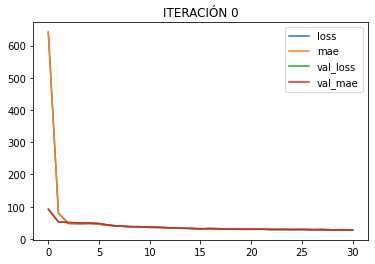

LOSS: 28.197813034057617  -- MAE: 28.197813034057617  -- VAL_LOSS: 28.014734268188477  -- VAL_MAE: 28.014734268188477
----------------------------------------------------------


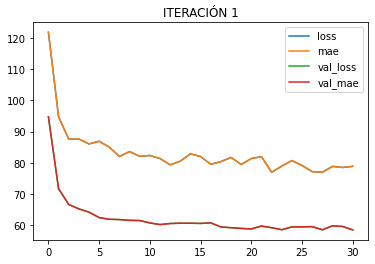

LOSS: 78.85263061523438  -- MAE: 78.85263061523438  -- VAL_LOSS: 58.481346130371094  -- VAL_MAE: 58.481346130371094
----------------------------------------------------------


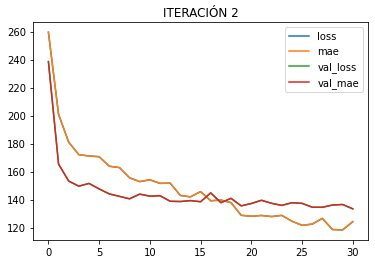

LOSS: 124.19448852539062  -- MAE: 124.19448852539062  -- VAL_LOSS: 133.3741455078125  -- VAL_MAE: 133.3741455078125
----------------------------------------------------------


In [15]:
for i in range(len(Histories)):
    history = Histories[i]    
    pd.DataFrame(history.history).plot()
    plt.title('ITERACIÓN ' + str(i))
    plt.show()
    print('LOSS:',history.history['loss'][-1], ' -- MAE:', history.history['mae'][-1], 
          ' -- VAL_LOSS:', history.history['val_loss'][-1], ' -- VAL_MAE:', history.history['val_mae'][-1])
    print('----------------------------------------------------------')

* Entrenar precios


ITERACIÓN: 1
Entrenando desde epoch 0
------------------------------------------

Generando 100  recetas aleatorias...



100%|██████████| 100/100 [00:00<00:00, 396.31it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:21<00:00,  4.68it/s]


Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_9 (Batc  (None, 128, 768)         3072      
 hNormalization)                                                 
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                  

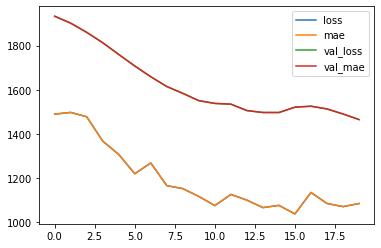

1/1 [==============================] - 0s 357ms/step - loss: 168.5878 - mae: 168.5878
[168.5878448486328, 168.5878448486328]
1/1 [==============================] - 0s 360ms/step
receta 0 precio_prom_por_gramo_true: 17.34 precio_prom_por_gramo_pred: 28.393808  precisión: 61.1 %
---------------------------------------------------------------------------
receta 1 precio_prom_por_gramo_true: 176.2 precio_prom_por_gramo_pred: 134.73662  precisión: 76.4 %
---------------------------------------------------------------------------
receta 2 precio_prom_por_gramo_true: 12104.0 precio_prom_por_gramo_pred: 11187.484  precisión: 92.4 %
---------------------------------------------------------------------------
receta 3 precio_prom_por_gramo_true: 28.03 precio_prom_por_gramo_pred: 0.0  precisión: 0.0 %
---------------------------------------------------------------------------
receta 4 precio_prom_por_gramo_true: 499.8 precio_prom_por_gramo_pred: 537.23615  precisión: 93.0 %
-----------------------

100%|██████████| 100/100 [00:00<00:00, 334.23it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:24<00:00,  4.02it/s]


Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_10 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                  

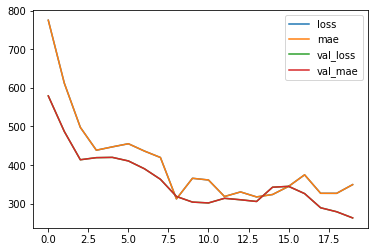

1/1 [==============================] - 0s 308ms/step - loss: 2222.9263 - mae: 2222.9263
[2222.92626953125, 2222.92626953125]
1/1 [==============================] - 0s 275ms/step
receta 0 precio_prom_por_gramo_true: 229.6 precio_prom_por_gramo_pred: 151.47485  precisión: 66.0 %
---------------------------------------------------------------------------
receta 1 precio_prom_por_gramo_true: 212.5 precio_prom_por_gramo_pred: 347.7243  precisión: 61.1 %
---------------------------------------------------------------------------
receta 2 precio_prom_por_gramo_true: 600.5 precio_prom_por_gramo_pred: 532.62994  precisión: 88.7 %
---------------------------------------------------------------------------
receta 3 precio_prom_por_gramo_true: 9950.0 precio_prom_por_gramo_pred: 130.0047  precisión: 1.3 %
---------------------------------------------------------------------------
receta 4 precio_prom_por_gramo_true: 634.0 precio_prom_por_gramo_pred: 655.0654  precisión: 96.8 %
---------------------

In [ ]:
recomendador128.NUM_RECETAS = 5000
recomendador128.EMB_SIZE = 128
BATCHSIZE = 32
ITER = 1
INITIAL_EPOCH = 0
EPOCHS = recomendador128.NUM_RECETAS // BATCHSIZE


Histories_precios = []
for iteracion in range(ITER):
    print('\nITERACIÓN:', iteracion+1)
    print('Entrenando desde epoch', INITIAL_EPOCH)
    print('------------------------------------------\n')
    modelo128_precios, history_precios = recomendador128.EntrenarModeloPrecios(
                                    df_precios='lista_precios_profeco_2022.csv',                                   
                                    learning_rate=1e-4,
                                    version=version, 
                                    initial_epoch = INITIAL_EPOCH,                             
                                    epochs=INITIAL_EPOCH + EPOCHS, 
                                    min_ingredientes=5, max_ingredientes=11,                                  
                                    min_unidades=MINU, max_unidades=MAXU,
                                    batch_size=BATCHSIZE,
                                    kernels=128,                                                                         
                                    save=True, verbose=True)
    INITIAL_EPOCH = history_precios.epoch[-1]

    Histories_precios.append(history_precios)

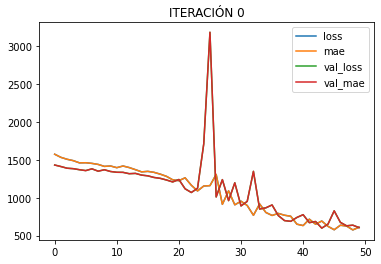

LOSS: 610.884521484375  -- MAE: 610.884521484375  -- VAL_LOSS: 605.876708984375  -- VAL_MAE: 605.876708984375
----------------------------------------------------------


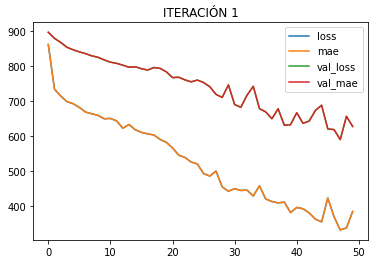

LOSS: 384.781494140625  -- MAE: 384.781494140625  -- VAL_LOSS: 627.9765014648438  -- VAL_MAE: 627.9765014648438
----------------------------------------------------------


In [10]:
for i in range(len(Histories_precios)):
    history = Histories_precios[i]    
    pd.DataFrame(history.history).plot()
    plt.title('ITERACIÓN ' + str(i))
    plt.show()
    print('LOSS:',history.history['loss'][-1], ' -- MAE:', history.history['mae'][-1], 
          ' -- VAL_LOSS:', history.history['val_loss'][-1], ' -- VAL_MAE:', history.history['val_mae'][-1])
    print('----------------------------------------------------------')